### RFM 분석 실습
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수 

In [1]:
import pandas as pd
import numpy as np

In [2]:
cs_df = pd.read_csv("./datasets/customer_shopping_data.csv")
cs_df

invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2               Cash    9/11/2021         Metrocity  
3        Credit Card   16/05/2021      Metropol AVM  
4               Cash   24/10/2021            Kanyon  
...              ...          ...               ...  
99452    Credit Card   21/09/2022            Kanyon  
99453           Cash   22/09/2021    Forum Istanbul  
99454     Debit Card   28/03/2021         Metrocity  
99455           Cash   16/03/2021      Istinye Park  
99456    Credit Card   15/10/2022  Mall of Istanbul  

[99457 rows x 10 columns]

In [3]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


먼저 결측치는 없는것으로 확인되었다.  
음수 값 있는지 확인

In [4]:
cs_df[cs_df['invoice_no'] == 0]

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

In [5]:
cs_df[cs_df['customer_id'] == 0]

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

In [6]:
cs_df[cs_df['customer_id'].isna()]

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

성별 이상 확인

In [7]:
cs_df[(cs_df['gender'] != 'Female') & (cs_df['gender'] != 'Male')]

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

나이 이상확인

In [8]:
cs_df[cs_df['age']<=0]

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

카테고리 확인

In [9]:
cs_df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

quantity 확인

In [10]:
cs_df[cs_df['quantity']<=0]

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

quantity 도 0이나 0보다 작은 값이 없다는 것을 확인했다.

price 확인

In [11]:
cs_df[cs_df['price'] <= 0]

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []

price 또한 0 이하의 값이 없다는 것을 확인했다.

payment_method 확인

In [12]:
cs_df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

invoice_date 확인

In [13]:
cs_df['invoice_date']= pd.to_datetime(cs_df['invoice_date'], dayfirst=True)

In [14]:
cs_df

invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card   2022-08-05            Kanyon  
1         Debit Card   2021-12-12    Forum Istanbul  
2               Cash   2021-11-09         Metrocity  
3        Credit Card   2021-05-16      Metropol AVM  
4               Cash   2021-10-24            Kanyon  
...              ...          ...               ...  
99452    Credit Card   2022-09-21            Kanyon  
99453           Cash   2021-09-22    Forum Istanbul  
99454     Debit Card   2021-03-28         Metrocity  
99455           Cash   2021-03-16      Istinye Park  
99456    Credit Card   2022-10-15  Mall of Istanbul  

[99457 rows x 10 columns]

In [15]:
cs_df['invoice_date'].sort_values(ascending=True)

36199   2021-01-01
78539   2021-01-01
27812   2021-01-01
27856   2021-01-01
5323    2021-01-01
           ...    
20863   2023-03-08
20879   2023-03-08
61644   2023-03-08
27871   2023-03-08
60463   2023-03-08
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

최근날짜가 2023-03-08 확인

In [16]:
cs_df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

전체적으로 확인 결과, 결측치 없는 것을 확인했다.

In [17]:
cs_df['invoice_no'].duplicated().sum()

0

invoice_no에서 중복된 값이 있는지 확인했지만 중복 없음.

In [18]:
cs_df['customer_id'].duplicated().sum()

0

customer_id에서도 중복된 값이 있는지 확인했지만 중복이 없는것을 확인했다.

In [19]:
cs_df.describe().T

count                        mean                  min  \
age           99457.0                   43.427089                 18.0   
quantity      99457.0                    3.003429                  1.0   
price         99457.0                  689.256321                 5.23   
invoice_date    99457  2022-02-04 02:46:59.783424  2021-01-01 00:00:00   

                              25%                  50%                  75%  \
age                          30.0                 43.0                 56.0   
quantity                      2.0                  3.0                  4.0   
price                       45.45                203.3              1200.32   
invoice_date  2021-07-19 00:00:00  2022-02-05 00:00:00  2022-08-22 00:00:00   

                              max         std  
age                          69.0   14.990054  
quantity                      5.0    1.413025  
price                      5250.0  941.184567  
invoice_date  2023-03-08 00:00:00         NaN

어떻게 분석할지 고민.  
회원번호도 겹치지 않고, invoice_no도 겹치지않고, gender, quantity, price, payment_method, invoice_date, shopping_mall 다 이상치도 없기에 쇼핑몰 별 회원을 구분 후, 분석 진행.

먼저 회원수별 어떤 쇼핑몰에서 많이 구매했는지 시각화

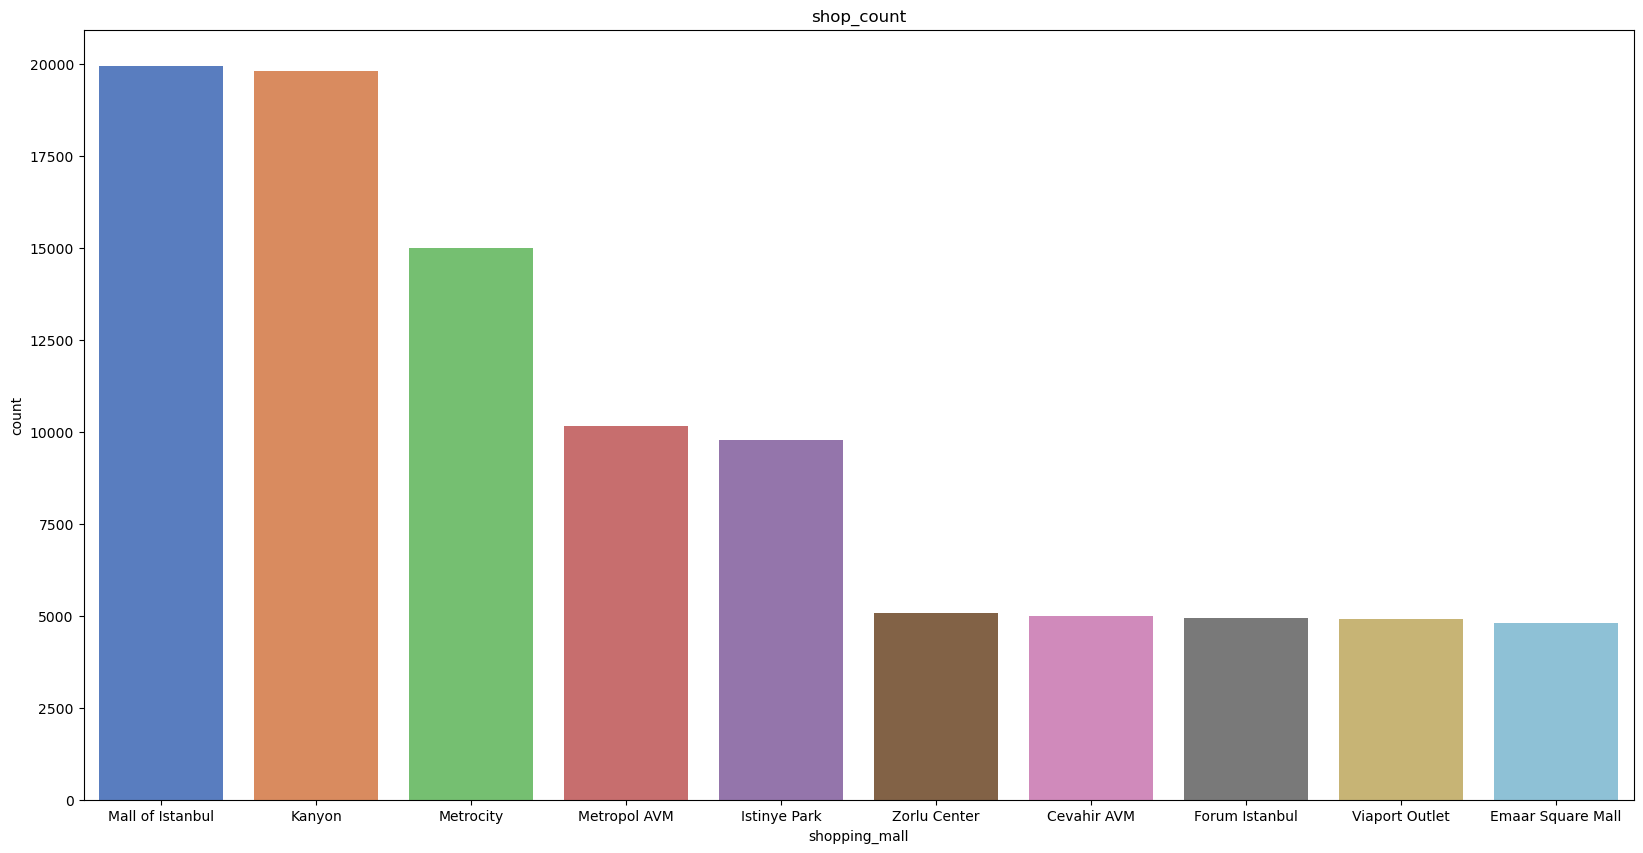

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

shop_order = ['Mall of Istanbul','Kanyon','Metrocity','Metropol AVM','Istinye Park','Zorlu Center','Cevahir AVM',\
              'Forum Istanbul','Viaport Outlet','Emaar Square Mall']
plt.figure(figsize=(20,10))
sns.countplot(x='shopping_mall' , data=cs_df, palette='muted', order=shop_order)
plt.title('shop_count')
plt.show()

각 쇼핑몰별 회원 확인

가장 회원이 많은 쇼핑몰과 회원이 적은 쇼핑몰을 비교

In [21]:
cs_df_MI = cs_df[cs_df['shopping_mall'] == 'Mall of Istanbul'].reset_index(drop=True)
cs_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card   2021-01-13  Mall of Istanbul  
1        Credit Card   2022-04-20  Mall of Istanbul  
2         Debit Card   2022-07-04  Mall of Istanbul  
3        Credit Card   2023-01-12  Mall of Istanbul  
4        Credit Card   2022-06-09  Mall of Istanbul  
...              ...          ...               ...  
19938    Credit Card   2021-12-28  Mall of Istanbul  
19939     Debit Card   2022-02-23  Mall of Istanbul  
19940     Debit Card   2021-07-26  Mall of Istanbul  
19941           Cash   2021-11-26  Mall of Istanbul  
19942    Credit Card   2022-10-15  Mall of Istanbul  

[19943 rows x 10 columns]

shopping_mall feature는 필요없어졌기에 drop

In [22]:
cs_df_MI = cs_df_MI.drop(['shopping_mall'], axis=1)
cs_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method invoice_date  
0        Credit Card   2021-01-13  
1        Credit Card   2022-04-20  
2         Debit Card   2022-07-04  
3        Credit Card   2023-01-12  
4        Credit Card   2022-06-09  
...              ...          ...  
19938    Credit Card   2021-12-28  
19939     Debit Card   2022-02-23  
19940     Debit Card   2021-07-26  
19941           Cash   2021-11-26  
19942    Credit Card   2022-10-15  

[19943 rows x 9 columns]

rfm 모델 진행

최신날짜 확인

In [23]:
cs_df_MI['invoice_date'].sort_values(ascending=True)

19083   2021-01-01
16888   2021-01-01
1789    2021-01-01
4191    2021-01-01
18837   2021-01-01
           ...    
19294   2023-03-08
3853    2023-03-08
4251    2023-03-08
1063    2023-03-08
8453    2023-03-08
Name: invoice_date, Length: 19943, dtype: datetime64[ns]

In [24]:
cs_df_MI.loc[:,'Recency'] = pd.to_datetime(cs_df_MI['invoice_date'])\
.apply(lambda x: (pd.to_datetime('2023-03-08') - x).days)
cs_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method invoice_date  Recency  
0        Credit Card   2021-01-13      784  
1        Credit Card   2022-04-20      322  
2         Debit Card   2022-07-04      247  
3        Credit Card   2023-01-12       55  
4        Credit Card   2022-06-09      272  
...              ...          ...      ...  
19938    Credit Card   2021-12-28      435  
19939     Debit Card   2022-02-23      378  
19940     Debit Card   2021-07-26      590  
19941           Cash   2021-11-26      467  
19942    Credit Card   2022-10-15      144  

[19943 rows x 10 columns]

In [25]:
cs_df_MI = cs_df_MI.drop(['invoice_date'], axis=1)
cs_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method  Recency  
0        Credit Card      784  
1        Credit Card      322  
2         Debit Card      247  
3        Credit Card       55  
4        Credit Card      272  
...              ...      ...  
19938    Credit Card      435  
19939     Debit Card      378  
19940     Debit Card      590  
19941           Cash      467  
19942    Credit Card      144  

[19943 rows x 9 columns]

In [26]:
rf_df_MI = cs_df_MI.groupby('customer_id').agg(Recency=('Recency', 'min'), Frequency=('customer_id', 'count'))
rf_df_MI

Recency  Frequency
customer_id                    
C100030          146          1
C100066          218          1
C100090          366          1
C100096          521          1
C100102          189          1
...              ...        ...
C999024          309          1
C999240          720          1
C999363          652          1
C999574           39          1
C999910          123          1

[19943 rows x 2 columns]

In [27]:
m_df_MI = cs_df.copy()
m_df_MI.loc[:,'Monetary'] = m_df_MI['price'] * m_df_MI['quantity']
m_df_MI

invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  Monetary  
0        Credit Card   2022-08-05            Kanyon   7502.00  
1         Debit Card   2021-12-12    Forum Istanbul   5401.53  
2               Cash   2021-11-09         Metrocity    300.08  
3        Credit Card   2021-05-16      Metropol AVM  15004.25  
4               Cash   2021-10-24            Kanyon    242.40  
...              ...          ...               ...       ...  
99452    Credit Card   2022-09-21            Kanyon    293.25  
99453           Cash   2021-09-22    Forum Istanbul     20.92  
99454     Debit Card   2021-03-28         Metrocity     20.92  
99455           Cash   2021-03-16      Istinye Park  16800.00  
99456    Credit Card   2022-10-15  Mall of Istanbul    105.57  

[99457 rows x 11 columns]

In [28]:
m_df_MI = m_df_MI.groupby('customer_id')[['Monetary']].sum()
m_df_MI

Monetary
customer_id          
C100004       7502.00
C100005       2400.68
C100006        322.56
C100012        130.75
C100019         35.84
...               ...
C999886         47.07
C999910        136.35
C999974       7502.00
C999976        322.56
C999995       1200.32

[99457 rows x 1 columns]

In [29]:
rf_df_MI = rf_df_MI.reset_index()
rf_df_MI

customer_id  Recency  Frequency
0         C100030      146          1
1         C100066      218          1
2         C100090      366          1
3         C100096      521          1
4         C100102      189          1
...           ...      ...        ...
19938     C999024      309          1
19939     C999240      720          1
19940     C999363      652          1
19941     C999574       39          1
19942     C999910      123          1

[19943 rows x 3 columns]

In [30]:
m_df_MI = m_df_MI.reset_index()
m_df_MI

customer_id  Monetary
0         C100004   7502.00
1         C100005   2400.68
2         C100006    322.56
3         C100012    130.75
4         C100019     35.84
...           ...       ...
99452     C999886     47.07
99453     C999910    136.35
99454     C999974   7502.00
99455     C999976    322.56
99456     C999995   1200.32

[99457 rows x 2 columns]

In [31]:
rfm_df_MI = rf_df_MI.merge(m_df_MI, on='customer_id')
rfm_df_MI

customer_id  Recency  Frequency  Monetary
0         C100030      146          1   4801.28
1         C100066      218          1    322.56
2         C100090      366          1    162.64
3         C100096      521          1   2700.72
4         C100102      189          1   2700.72
...           ...      ...        ...       ...
19938     C999024      309          1   5401.53
19939     C999240      720          1   1200.32
19940     C999363      652          1     20.92
19941     C999574       39          1   4801.28
19942     C999910      123          1    136.35

[19943 rows x 4 columns]

In [32]:
rfm_df_MI.iloc[rfm_df_MI[rfm_df_MI['Monetary']<0].index] = 0
rfm_df_MI[rfm_df_MI['Monetary']<0]

Empty DataFrame
Columns: [customer_id, Recency, Frequency, Monetary]
Index: []

In [33]:
rfm_df_MI

customer_id  Recency  Frequency  Monetary
0         C100030      146          1   4801.28
1         C100066      218          1    322.56
2         C100090      366          1    162.64
3         C100096      521          1   2700.72
4         C100102      189          1   2700.72
...           ...      ...        ...       ...
19938     C999024      309          1   5401.53
19939     C999240      720          1   1200.32
19940     C999363      652          1     20.92
19941     C999574       39          1   4801.28
19942     C999910      123          1    136.35

[19943 rows x 4 columns]

In [34]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df_MI[['Recency','Frequency','Monetary']])

In [35]:
rfm_df_MI[['Recency','Frequency','Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'])
rfm_df_MI

customer_id   Recency  Frequency  Monetary
0         C100030  0.183417        0.0  0.182743
1         C100066  0.273869        0.0  0.012091
2         C100090  0.459799        0.0  0.005998
3         C100096  0.654523        0.0  0.102706
4         C100102  0.237437        0.0  0.102706
...           ...       ...        ...       ...
19938     C999024  0.388191        0.0  0.205614
19939     C999240  0.904523        0.0  0.045536
19940     C999363  0.819095        0.0  0.000598
19941     C999574  0.048995        0.0  0.182743
19942     C999910  0.154523        0.0  0.004996

[19943 rows x 4 columns]

In [36]:
rfm_df_MI['Recency'] = 1 - rfm_df_MI['Recency']

In [37]:
rfm_df_MI

customer_id   Recency  Frequency  Monetary
0         C100030  0.816583        0.0  0.182743
1         C100066  0.726131        0.0  0.012091
2         C100090  0.540201        0.0  0.005998
3         C100096  0.345477        0.0  0.102706
4         C100102  0.762563        0.0  0.102706
...           ...       ...        ...       ...
19938     C999024  0.611809        0.0  0.205614
19939     C999240  0.095477        0.0  0.045536
19940     C999363  0.180905        0.0  0.000598
19941     C999574  0.951005        0.0  0.182743
19942     C999910  0.845477        0.0  0.004996

[19943 rows x 4 columns]

In [38]:
rfm_df_MI.loc[:,'TotalScore'] = rfm_df_MI['Recency'] + rfm_df_MI['Frequency'] + rfm_df_MI['Monetary']
rfm_df_MI

customer_id   Recency  Frequency  Monetary  TotalScore
0         C100030  0.816583        0.0  0.182743    0.999326
1         C100066  0.726131        0.0  0.012091    0.738222
2         C100090  0.540201        0.0  0.005998    0.546199
3         C100096  0.345477        0.0  0.102706    0.448183
4         C100102  0.762563        0.0  0.102706    0.865269
...           ...       ...        ...       ...         ...
19938     C999024  0.611809        0.0  0.205614    0.817423
19939     C999240  0.095477        0.0  0.045536    0.141014
19940     C999363  0.180905        0.0  0.000598    0.181502
19941     C999574  0.951005        0.0  0.182743    1.133748
19942     C999910  0.845477        0.0  0.004996    0.850473

[19943 rows x 5 columns]

In [39]:
cs_rfm_df_MI = cs_df_MI.merge(rfm_df_MI[['customer_id','TotalScore']], on='customer_id')
cs_rfm_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method  Recency  TotalScore  
0        Credit Card      784    0.060612  
1        Credit Card      322    0.634010  
2         Debit Card      247    0.701790  
3        Credit Card       55    0.944649  
4        Credit Card      272    0.943940  
...              ...      ...         ...  
19938    Credit Card      435    0.478106  
19939     Debit Card      378    0.527235  
19940     Debit Card      590    0.283383  
19941           Cash      467    0.414483  
19942    Credit Card      144    0.822919  

[19943 rows x 10 columns]

In [40]:
cs_rfm_df_MI.describe().T

count        mean         std        min        25%         50%  \
age         19943.0   43.440455   15.038037  18.000000   30.00000   43.000000   
quantity    19943.0    3.014291    1.409826   1.000000    2.00000    3.000000   
price       19943.0  694.566395  946.272210   5.230000   45.45000  203.300000   
Recency     19943.0  395.740912  230.154510   0.000000  198.00000  393.000000   
TotalScore  19943.0    0.599835    0.329625   0.001256    0.33483    0.595194   

                    75%          max  
age           56.500000    69.000000  
quantity       4.000000     5.000000  
price       1200.320000  5250.000000  
Recency      596.000000   796.000000  
TotalScore     0.848742     1.996231

In [41]:
l1, l2, l3, l4 = np.percentile(cs_rfm_df_MI['TotalScore'], [24, 44, 70, 93])
print(l1,l2,l3,l4)

0.3244437502793929 0.535758151425941 0.797471525712336 1.05122363351444


In [42]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [43]:
cs_rfm_df_MI['Level'] = cs_rfm_df_MI['TotalScore'].apply(get_level)
cs_rfm_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method  Recency  TotalScore  Level  
0        Credit Card      784    0.060612      5  
1        Credit Card      322    0.634010      3  
2         Debit Card      247    0.701790      3  
3        Credit Card       55    0.944649      2  
4        Credit Card      272    0.943940      2  
...              ...      ...         ...    ...  
19938    Credit Card      435    0.478106      4  
19939     Debit Card      378    0.527235      4  
19940     Debit Card      590    0.283383      5  
19941           Cash      467    0.414483      4  
19942    Credit Card      144    0.822919      2  

[19943 rows x 11 columns]

In [44]:
cs_rfm_df_MI['Level'] = cs_rfm_df_MI['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

In [45]:
cs_rfm_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method  Recency  TotalScore    Level  
0        Credit Card      784    0.060612   Bronze  
1        Credit Card      322    0.634010     Gold  
2         Debit Card      247    0.701790     Gold  
3        Credit Card       55    0.944649  Diamond  
4        Credit Card      272    0.943940  Diamond  
...              ...      ...         ...      ...  
19938    Credit Card      435    0.478106   Silver  
19939     Debit Card      378    0.527235   Silver  
19940     Debit Card      590    0.283383   Bronze  
19941           Cash      467    0.414483   Silver  
19942    Credit Card      144    0.822919  Diamond  

[19943 rows x 11 columns]

level

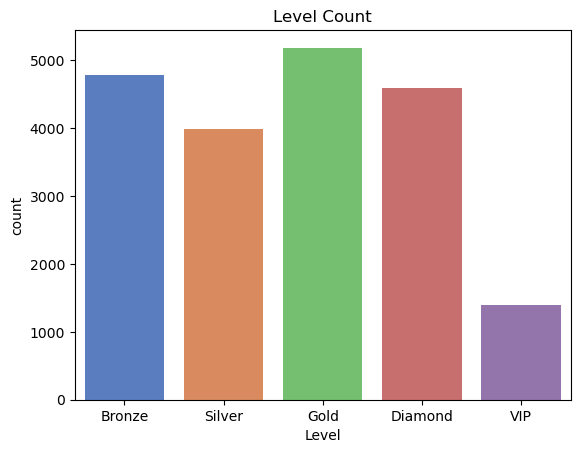

In [46]:
order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x = 'Level', data=cs_rfm_df_MI, palette='muted', order=order)
plt.title('Level Count')
plt.show()

Mall of Istanbul의 회원 분포는 위와 같다.  
Bronze부터 Diamond등급까지는 고루 분포해있지만, VIP 회원은 수가 적은것을 알 수 있었다.

성별 그래프

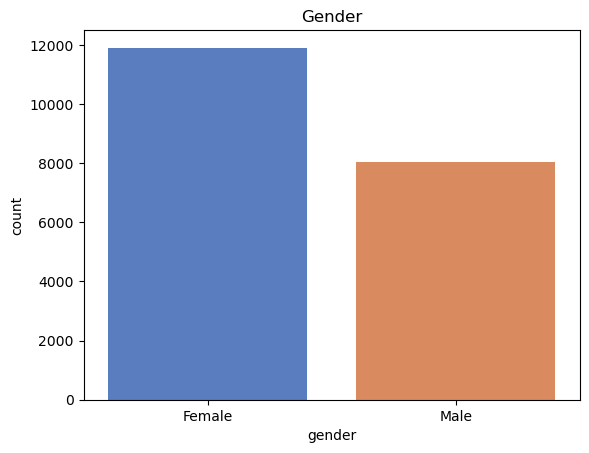

In [47]:
sns.countplot(x = 'gender', data=cs_rfm_df_MI, palette='muted')
plt.title('Gender')
plt.show()

남녀 성별로 확인

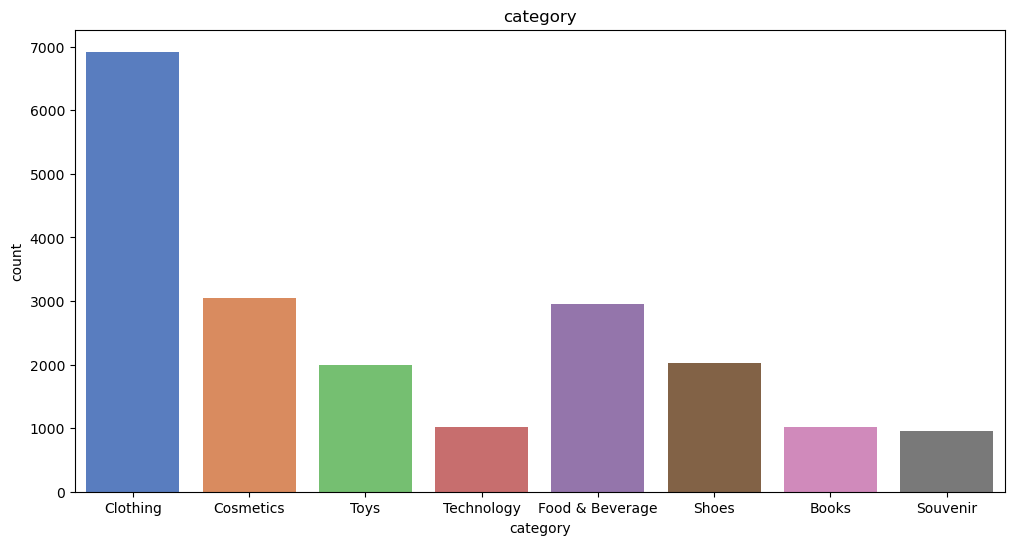

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'category', data=cs_rfm_df_MI, palette='muted')

plt.title('category')
plt.show()

payment_method

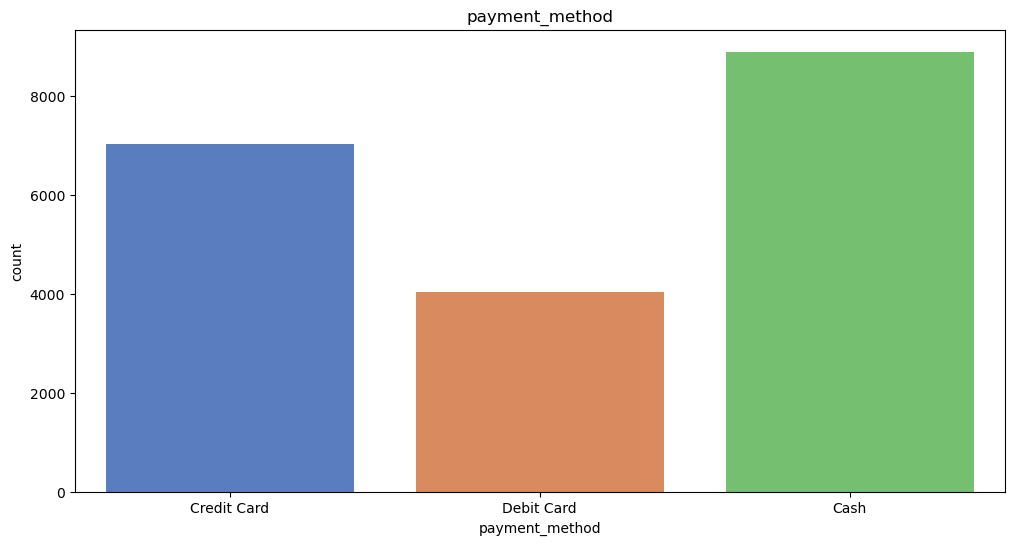

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'payment_method', data=cs_rfm_df_MI, palette='muted')

plt.title('payment_method')
plt.show()

각 gender,age_section,category,payment_method 같이 확인

연령별 그룹화

In [50]:
cs_rfm_df_MI.loc[cs_rfm_df_MI['age'] < 20, 'age_section'] = 'teenager'
cs_rfm_df_MI.loc[ (20<=cs_rfm_df_MI['age']) & (cs_rfm_df_MI['age'] < 30), 'age_section'] = 'Young adults'
cs_rfm_df_MI.loc[ (30<=cs_rfm_df_MI['age']) & (cs_rfm_df_MI['age'] < 45), 'age_section'] = 'Young middle-aged adults'
cs_rfm_df_MI.loc[ (45<=cs_rfm_df_MI['age']) & (cs_rfm_df_MI['age'] < 60), 'age_section'] = 'Old middle-aged adults'
cs_rfm_df_MI.loc[ (60<=cs_rfm_df_MI['age']) & (cs_rfm_df_MI['age'] < 70), 'age_section'] = 'Senior citizens'
cs_rfm_df_MI.loc[ (70<=cs_rfm_df_MI['age']) , 'age_section'] = 'The elderly'

cs_rfm_df_MI

invoice_no customer_id  gender  age   category  quantity    price  \
0        I293112     C176086  Female   32   Clothing         2   600.16   
1        I196704     C289625  Female   25  Cosmetics         5   203.30   
2        I161949     C159164  Female   66       Toys         3   107.52   
3        I267193     C317818  Female   19  Cosmetics         3   121.98   
4        I133061     C336576    Male   64   Clothing         5  1500.40   
...          ...         ...     ...  ...        ...       ...      ...   
19938    I191779     C131280    Male   26  Cosmetics         4   162.64   
19939    I133264     C289915  Female   41      Books         2    30.30   
19940    I152790     C223470    Male   41  Cosmetics         4   162.64   
19941    I131678     C119287    Male   24       Toys         1    35.84   
19942    I232867     C273973  Female   36   Souvenir         3    35.19   

      payment_method  Recency  TotalScore    Level               age_section  
0        Credit Card      784    0.060612   Bronze  Young middle-aged adults  
1        Credit Card      322    0.634010     Gold              Young adults  
2         Debit Card      247    0.701790     Gold           Senior citizens  
3        Credit Card       55    0.944649  Diamond                  teenager  
4        Credit Card      272    0.943940  Diamond           Senior citizens  
...              ...      ...         ...      ...                       ...  
19938    Credit Card      435    0.478106   Silver              Young adults  
19939     Debit Card      378    0.527235   Silver  Young middle-aged adults  
19940     Debit Card      590    0.283383   Bronze  Young middle-aged adults  
19941           Cash      467    0.414483   Silver              Young adults  
19942    Credit Card      144    0.822919  Diamond  Young middle-aged adults  

[19943 rows x 12 columns]

회원별 그래프 시각화

In [51]:
age_order = ['teenager','Young adults','Young middle-aged adults', 'Old middle-aged adults', 'Senior citizens','The elderly' ]

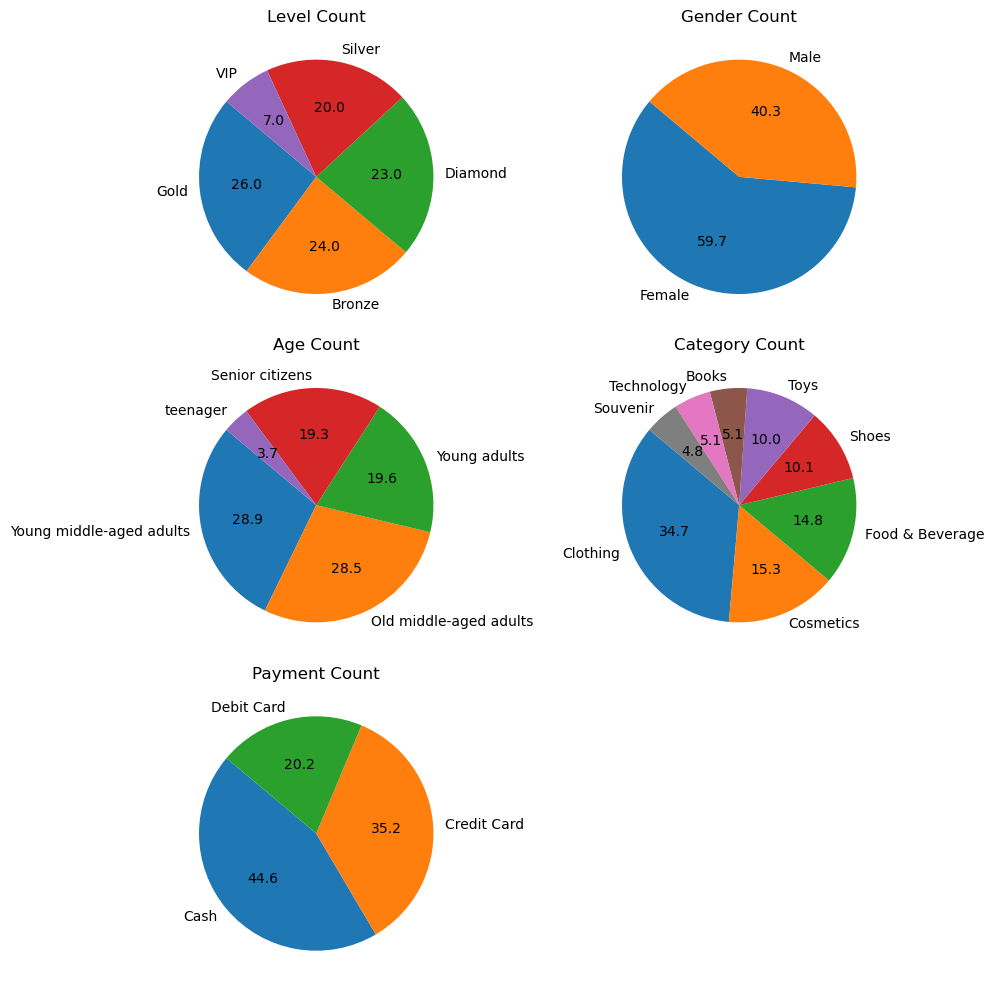

In [52]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

level_counts = cs_rfm_df_MI['Level'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 0].set_title('Level Count')

gender_counts = cs_rfm_df_MI['gender'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values

axes[0, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 1].set_title('Gender Count')

age_counts = cs_rfm_df_MI['age_section'].value_counts()
labels = age_counts.index.tolist()
sizes = age_counts.values

axes[1, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 0].set_title('Age Count')

category_counts = cs_rfm_df_MI['category'].value_counts()
labels = category_counts.index.tolist()
sizes = category_counts.values

axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 1].set_title('Category Count')

payment_counts = cs_rfm_df_MI['payment_method'].value_counts()
labels = payment_counts.index.tolist()
sizes = payment_counts.values

axes[2, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[2, 0].set_title('Payment Count')

axes[2,1].axis('off')

plt.tight_layout()
plt.show()

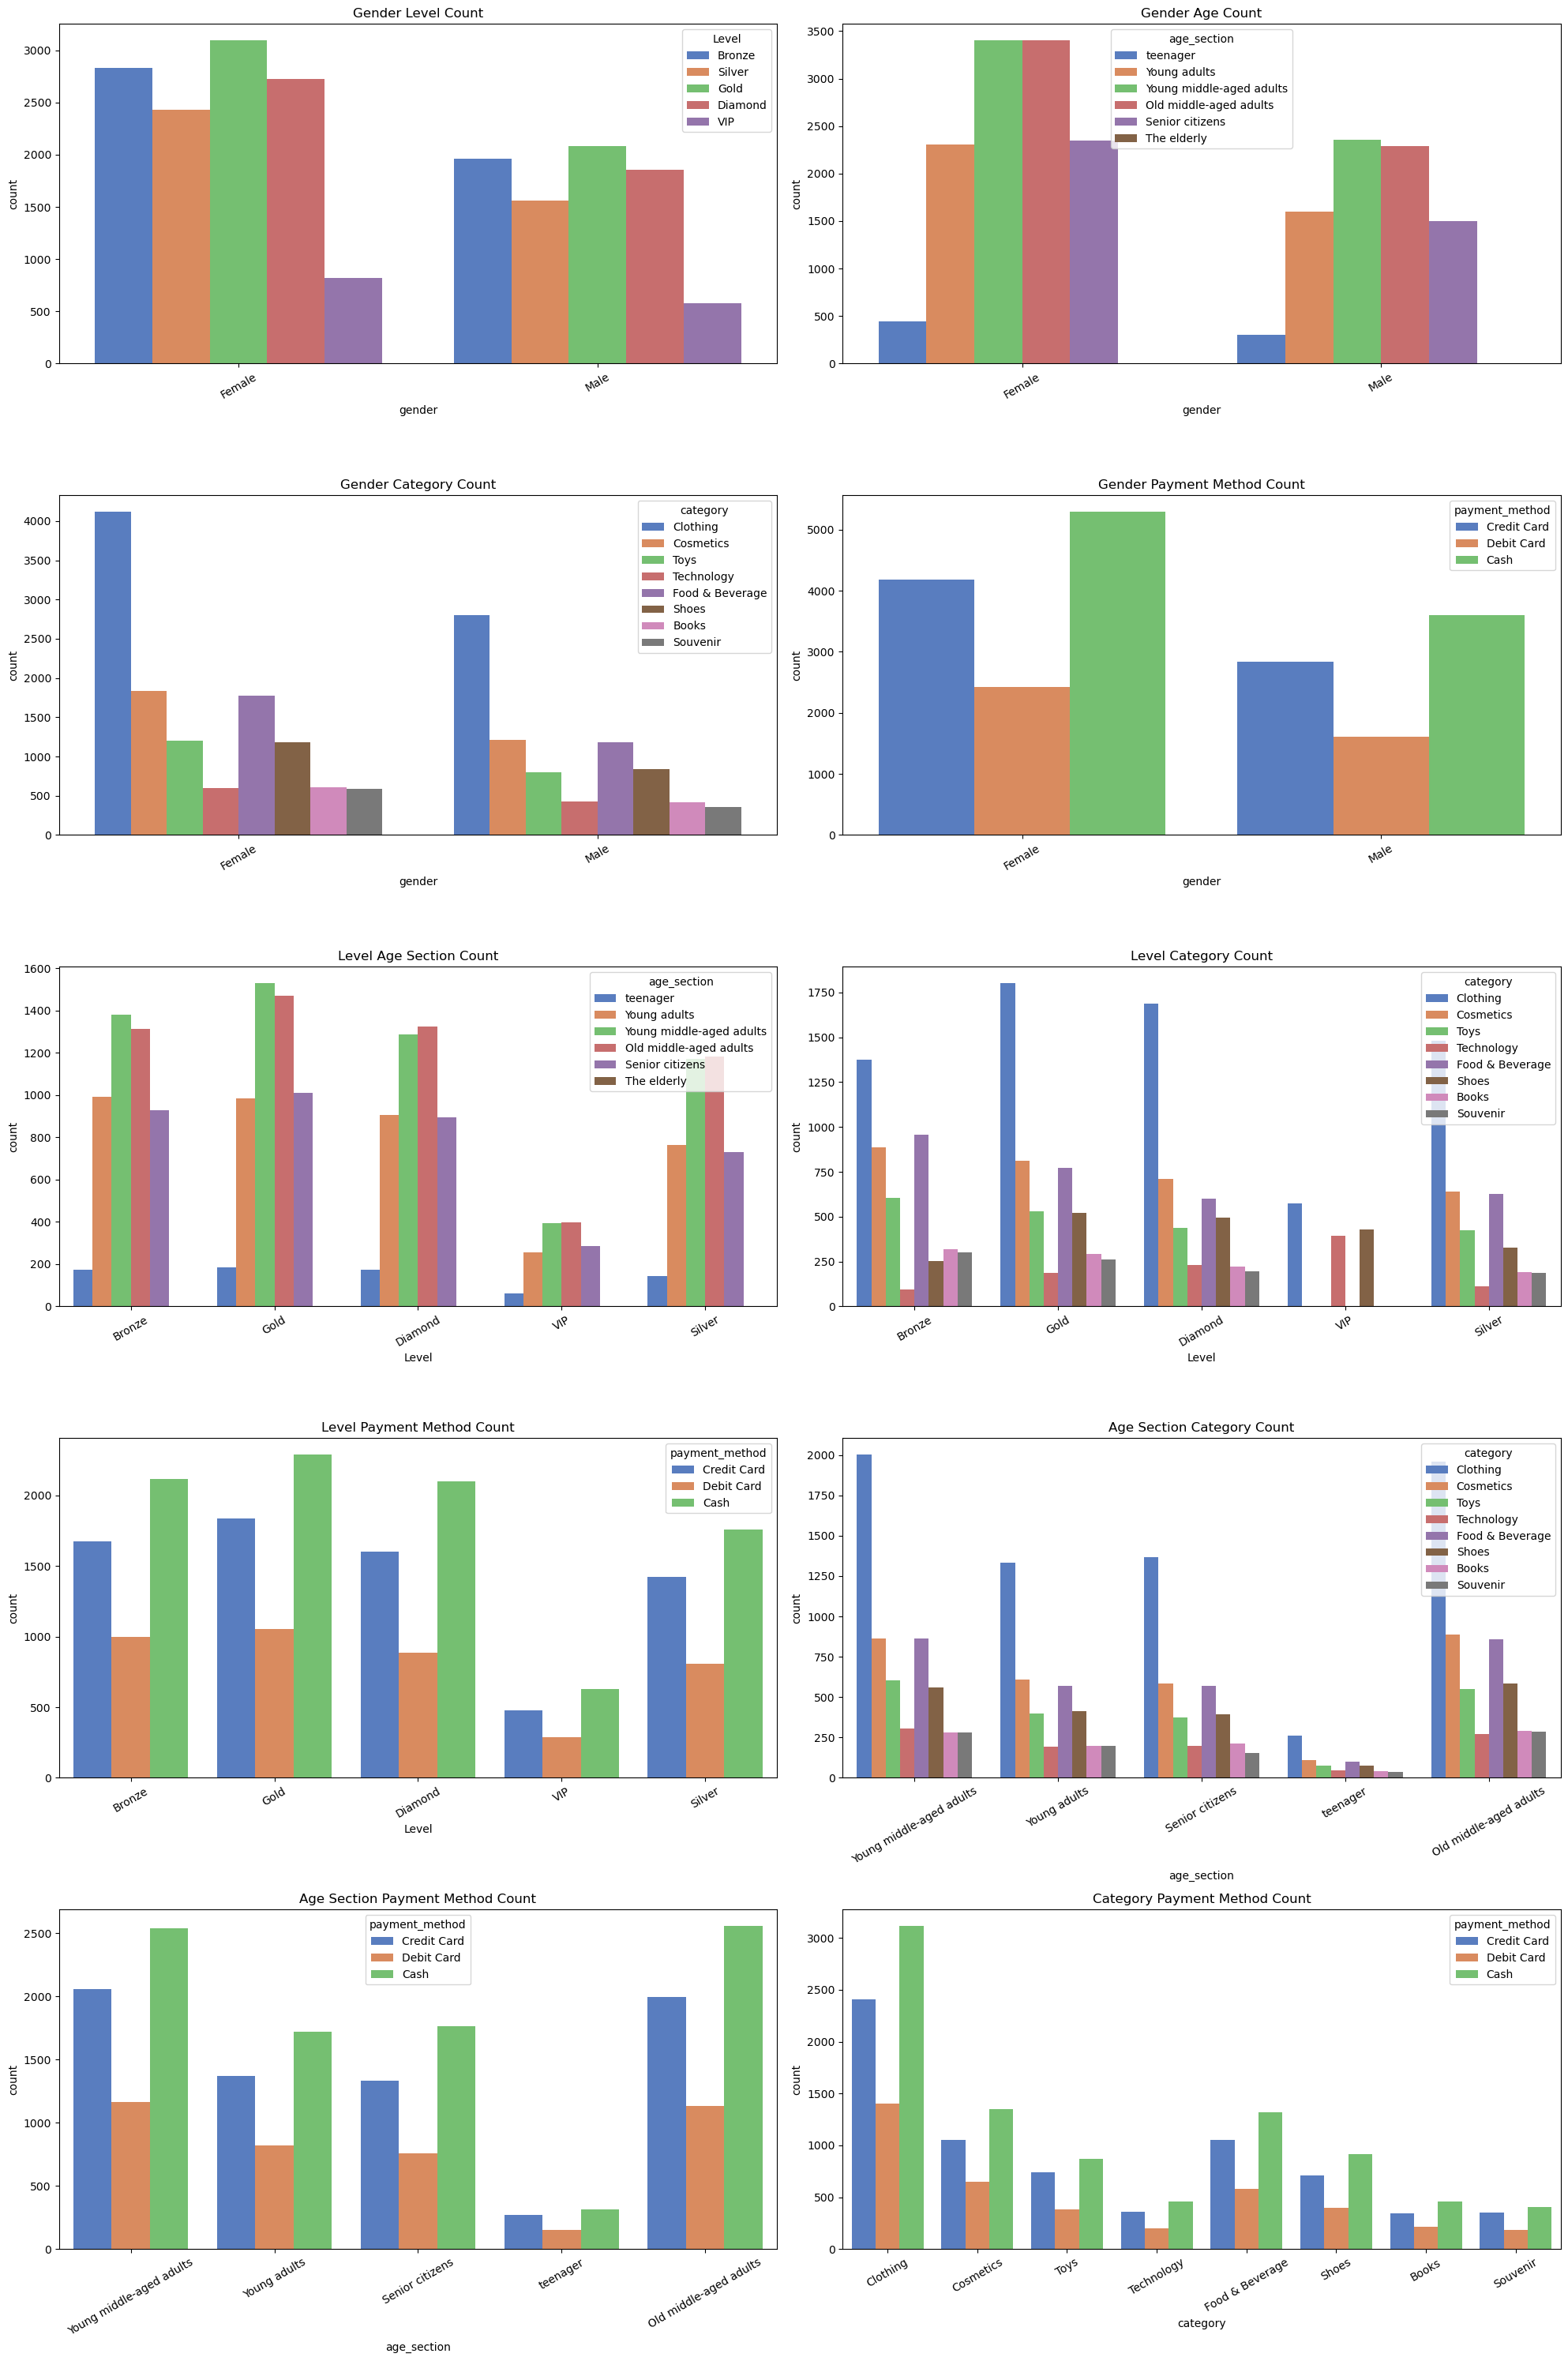

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# subplot 그리드 생성
fig, axes = plt.subplots(5, 2, figsize=(20,30))

# 각 subplot에 countplot 그리기
sns.countplot(x='gender', data=cs_rfm_df_MI, hue='Level', hue_order=order, palette='muted', ax=axes[0, 0])
axes[0, 0].set_title('Gender Level Count')
axes[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_MI, hue='age_section', hue_order=age_order, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title('Gender Age Count')
axes[0, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_MI, hue='category',  palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Gender Category Count')
axes[1, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_MI, hue='payment_method', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Gender Payment Method Count')
axes[1, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_MI, hue='age_section', hue_order=age_order, palette='muted', ax=axes[2, 0])
axes[2, 0].set_title('Level Age Section Count')
axes[2, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_MI, hue='category', palette='muted', ax=axes[2, 1])
axes[2, 1].set_title('Level Category Count')
axes[2, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_MI, hue='payment_method', palette='muted', ax=axes[3, 0])
axes[3, 0].set_title('Level Payment Method Count')
axes[3, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_MI, hue='category', palette='muted', ax=axes[3, 1])
axes[3, 1].set_title('Age Section Category Count')
axes[3, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_MI, hue='payment_method', palette='muted', ax=axes[4, 0])
axes[4, 0].set_title('Age Section Payment Method Count')
axes[4, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='category', data=cs_rfm_df_MI, hue='payment_method', palette='muted', ax=axes[4, 1])
axes[4, 1].set_title('Category Payment Method Count')
axes[4, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


분석은 추후에 서술

제일 고객이 많은 쇼핑몰과 제일 고객이 적은 쇼핑몰을 비교

In [54]:
cs_df_ES = cs_df[cs_df['shopping_mall'] == 'Emaar Square Mall'].reset_index(drop=True)
cs_df_ES

invoice_no customer_id  gender  age         category  quantity    price  \
0       I139207     C191708  Female   29            Books         1    15.15   
1       I183746     C220180    Male   23         Clothing         1   300.08   
2       I217053     C192344    Male   50            Shoes         4  2400.68   
3       I331891     C501658    Male   23         Clothing         1   300.08   
4       I339732     C276887    Male   68  Food & Beverage         1     5.23   
...         ...         ...     ...  ...              ...       ...      ...   
4806    I484380     C293542  Female   41         Clothing         4  1200.32   
4807    I848119     C272576  Female   56  Food & Beverage         4    20.92   
4808    I209237     C129330    Male   63        Cosmetics         4   162.64   
4809    I419578     C279804    Male   58            Books         3    45.45   
4810    I141871     C298790  Female   62         Clothing         3   900.24   

     payment_method invoice_date      shopping_mall  
0       Credit Card   2022-10-28  Emaar Square Mall  
1       Credit Card   2023-02-15  Emaar Square Mall  
2              Cash   2022-10-10  Emaar Square Mall  
3       Credit Card   2021-11-21  Emaar Square Mall  
4       Credit Card   2023-01-04  Emaar Square Mall  
...             ...          ...                ...  
4806     Debit Card   2022-11-23  Emaar Square Mall  
4807     Debit Card   2023-01-20  Emaar Square Mall  
4808           Cash   2021-02-24  Emaar Square Mall  
4809           Cash   2022-11-19  Emaar Square Mall  
4810           Cash   2022-02-02  Emaar Square Mall  

[4811 rows x 10 columns]

In [55]:
cs_df_ES = cs_df_ES.drop(['shopping_mall'], axis=1)
cs_df_ES

invoice_no customer_id  gender  age         category  quantity    price  \
0       I139207     C191708  Female   29            Books         1    15.15   
1       I183746     C220180    Male   23         Clothing         1   300.08   
2       I217053     C192344    Male   50            Shoes         4  2400.68   
3       I331891     C501658    Male   23         Clothing         1   300.08   
4       I339732     C276887    Male   68  Food & Beverage         1     5.23   
...         ...         ...     ...  ...              ...       ...      ...   
4806    I484380     C293542  Female   41         Clothing         4  1200.32   
4807    I848119     C272576  Female   56  Food & Beverage         4    20.92   
4808    I209237     C129330    Male   63        Cosmetics         4   162.64   
4809    I419578     C279804    Male   58            Books         3    45.45   
4810    I141871     C298790  Female   62         Clothing         3   900.24   

     payment_method invoice_date  
0       Credit Card   2022-10-28  
1       Credit Card   2023-02-15  
2              Cash   2022-10-10  
3       Credit Card   2021-11-21  
4       Credit Card   2023-01-04  
...             ...          ...  
4806     Debit Card   2022-11-23  
4807     Debit Card   2023-01-20  
4808           Cash   2021-02-24  
4809           Cash   2022-11-19  
4810           Cash   2022-02-02  

[4811 rows x 9 columns]

In [56]:
cs_df_ES['invoice_date'].sort_values(ascending=True)

2369   2021-01-01
3156   2021-01-01
2018   2021-01-01
3088   2021-01-01
1267   2021-01-01
          ...    
981    2023-03-08
494    2023-03-08
490    2023-03-08
583    2023-03-08
714    2023-03-08
Name: invoice_date, Length: 4811, dtype: datetime64[ns]

In [57]:
cs_df_ES.loc[:,'Recency'] = pd.to_datetime(cs_df_ES['invoice_date'])\
.apply(lambda x: (pd.to_datetime('2023-03-08') - x).days)
cs_df_ES

invoice_no customer_id  gender  age         category  quantity    price  \
0       I139207     C191708  Female   29            Books         1    15.15   
1       I183746     C220180    Male   23         Clothing         1   300.08   
2       I217053     C192344    Male   50            Shoes         4  2400.68   
3       I331891     C501658    Male   23         Clothing         1   300.08   
4       I339732     C276887    Male   68  Food & Beverage         1     5.23   
...         ...         ...     ...  ...              ...       ...      ...   
4806    I484380     C293542  Female   41         Clothing         4  1200.32   
4807    I848119     C272576  Female   56  Food & Beverage         4    20.92   
4808    I209237     C129330    Male   63        Cosmetics         4   162.64   
4809    I419578     C279804    Male   58            Books         3    45.45   
4810    I141871     C298790  Female   62         Clothing         3   900.24   

     payment_method invoice_date  Recency  
0       Credit Card   2022-10-28      131  
1       Credit Card   2023-02-15       21  
2              Cash   2022-10-10      149  
3       Credit Card   2021-11-21      472  
4       Credit Card   2023-01-04       63  
...             ...          ...      ...  
4806     Debit Card   2022-11-23      105  
4807     Debit Card   2023-01-20       47  
4808           Cash   2021-02-24      742  
4809           Cash   2022-11-19      109  
4810           Cash   2022-02-02      399  

[4811 rows x 10 columns]

In [58]:
cs_df_ES = cs_df_ES.drop(['invoice_date'], axis=1)
cs_df_ES

invoice_no customer_id  gender  age         category  quantity    price  \
0       I139207     C191708  Female   29            Books         1    15.15   
1       I183746     C220180    Male   23         Clothing         1   300.08   
2       I217053     C192344    Male   50            Shoes         4  2400.68   
3       I331891     C501658    Male   23         Clothing         1   300.08   
4       I339732     C276887    Male   68  Food & Beverage         1     5.23   
...         ...         ...     ...  ...              ...       ...      ...   
4806    I484380     C293542  Female   41         Clothing         4  1200.32   
4807    I848119     C272576  Female   56  Food & Beverage         4    20.92   
4808    I209237     C129330    Male   63        Cosmetics         4   162.64   
4809    I419578     C279804    Male   58            Books         3    45.45   
4810    I141871     C298790  Female   62         Clothing         3   900.24   

     payment_method  Recency  
0       Credit Card      131  
1       Credit Card       21  
2              Cash      149  
3       Credit Card      472  
4       Credit Card       63  
...             ...      ...  
4806     Debit Card      105  
4807     Debit Card       47  
4808           Cash      742  
4809           Cash      109  
4810           Cash      399  

[4811 rows x 9 columns]

In [59]:
rf_df_ES = cs_df_ES.groupby('customer_id').agg(Recency=('Recency', 'min'), Frequency=('customer_id', 'count'))
rf_df_ES

Recency  Frequency
customer_id                    
C100124          631          1
C100184          318          1
C100261          116          1
C100291          643          1
C100307          791          1
...              ...        ...
C997699          633          1
C997987          422          1
C998282          111          1
C998765          345          1
C999032          162          1

[4811 rows x 2 columns]

In [60]:
m_df_ES = cs_df.copy()
m_df_ES.loc[:,'Monetary'] = m_df_ES['price'] * m_df_ES['quantity']
m_df_ES


invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  Monetary  
0        Credit Card   2022-08-05            Kanyon   7502.00  
1         Debit Card   2021-12-12    Forum Istanbul   5401.53  
2               Cash   2021-11-09         Metrocity    300.08  
3        Credit Card   2021-05-16      Metropol AVM  15004.25  
4               Cash   2021-10-24            Kanyon    242.40  
...              ...          ...               ...       ...  
99452    Credit Card   2022-09-21            Kanyon    293.25  
99453           Cash   2021-09-22    Forum Istanbul     20.92  
99454     Debit Card   2021-03-28         Metrocity     20.92  
99455           Cash   2021-03-16      Istinye Park  16800.00  
99456    Credit Card   2022-10-15  Mall of Istanbul    105.57  

[99457 rows x 11 columns]

In [61]:
m_df_ES = m_df_ES.groupby('customer_id')[['Monetary']].sum()
m_df_ES

Monetary
customer_id          
C100004       7502.00
C100005       2400.68
C100006        322.56
C100012        130.75
C100019         35.84
...               ...
C999886         47.07
C999910        136.35
C999974       7502.00
C999976        322.56
C999995       1200.32

[99457 rows x 1 columns]

In [62]:
rf_df_ES = rf_df_ES.reset_index()
rf_df_ES

customer_id  Recency  Frequency
0        C100124      631          1
1        C100184      318          1
2        C100261      116          1
3        C100291      643          1
4        C100307      791          1
...          ...      ...        ...
4806     C997699      633          1
4807     C997987      422          1
4808     C998282      111          1
4809     C998765      345          1
4810     C999032      162          1

[4811 rows x 3 columns]

In [63]:
m_df_ES = m_df_ES.reset_index()
m_df_ES

customer_id  Monetary
0         C100004   7502.00
1         C100005   2400.68
2         C100006    322.56
3         C100012    130.75
4         C100019     35.84
...           ...       ...
99452     C999886     47.07
99453     C999910    136.35
99454     C999974   7502.00
99455     C999976    322.56
99456     C999995   1200.32

[99457 rows x 2 columns]

In [64]:
rfm_df_ES = rf_df_ES.merge(m_df_ES, on='customer_id')
rfm_df_ES


customer_id  Recency  Frequency  Monetary
0        C100124      631          1     47.07
1        C100184      318          1   4200.00
2        C100261      116          1   4801.28
3        C100291      643          1    105.57
4        C100307      791          1    300.08
...          ...      ...        ...       ...
4806     C997699      633          1     83.68
4807     C997987      422          1   4801.28
4808     C998282      111          1    322.56
4809     C998765      345          1   1016.50
4810     C999032      162          1    162.64

[4811 rows x 4 columns]

In [65]:
rfm_df_ES.iloc[rfm_df_ES[rfm_df_ES['Monetary']<0].index] = 0
rfm_df_ES[rfm_df_ES['Monetary']<0]

rfm_df_ES

customer_id  Recency  Frequency  Monetary
0        C100124      631          1     47.07
1        C100184      318          1   4200.00
2        C100261      116          1   4801.28
3        C100291      643          1    105.57
4        C100307      791          1    300.08
...          ...      ...        ...       ...
4806     C997699      633          1     83.68
4807     C997987      422          1   4801.28
4808     C998282      111          1    322.56
4809     C998765      345          1   1016.50
4810     C999032      162          1    162.64

[4811 rows x 4 columns]

In [66]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df_ES[['Recency','Frequency','Monetary']])


In [67]:
rfm_df_ES[['Recency','Frequency','Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'])
rfm_df_ES

customer_id   Recency  Frequency  Monetary
0        C100124  0.792714        0.0  0.001594
1        C100184  0.399497        0.0  0.159833
2        C100261  0.145729        0.0  0.182743
3        C100291  0.807789        0.0  0.003823
4        C100307  0.993719        0.0  0.011235
...          ...       ...        ...       ...
4806     C997699  0.795226        0.0  0.002989
4807     C997987  0.530151        0.0  0.182743
4808     C998282  0.139447        0.0  0.012091
4809     C998765  0.433417        0.0  0.038532
4810     C999032  0.203518        0.0  0.005998

[4811 rows x 4 columns]

In [68]:
rfm_df_ES['Recency'] = 1 - rfm_df_ES['Recency']

rfm_df_ES

customer_id   Recency  Frequency  Monetary
0        C100124  0.207286        0.0  0.001594
1        C100184  0.600503        0.0  0.159833
2        C100261  0.854271        0.0  0.182743
3        C100291  0.192211        0.0  0.003823
4        C100307  0.006281        0.0  0.011235
...          ...       ...        ...       ...
4806     C997699  0.204774        0.0  0.002989
4807     C997987  0.469849        0.0  0.182743
4808     C998282  0.860553        0.0  0.012091
4809     C998765  0.566583        0.0  0.038532
4810     C999032  0.796482        0.0  0.005998

[4811 rows x 4 columns]

In [69]:
rfm_df_ES.loc[:,'TotalScore'] = rfm_df_ES['Recency'] + rfm_df_ES['Frequency'] + rfm_df_ES['Monetary']
rfm_df_ES

customer_id   Recency  Frequency  Monetary  TotalScore
0        C100124  0.207286        0.0  0.001594    0.208881
1        C100184  0.600503        0.0  0.159833    0.760335
2        C100261  0.854271        0.0  0.182743    1.037014
3        C100291  0.192211        0.0  0.003823    0.196034
4        C100307  0.006281        0.0  0.011235    0.017516
...          ...       ...        ...       ...         ...
4806     C997699  0.204774        0.0  0.002989    0.207763
4807     C997987  0.469849        0.0  0.182743    0.652592
4808     C998282  0.860553        0.0  0.012091    0.872644
4809     C998765  0.566583        0.0  0.038532    0.605115
4810     C999032  0.796482        0.0  0.005998    0.802480

[4811 rows x 5 columns]

In [70]:
cs_rfm_df_ES = cs_df_ES.merge(rfm_df_ES[['customer_id','TotalScore']], on='customer_id')
cs_rfm_df_ES

invoice_no customer_id  gender  age         category  quantity    price  \
0       I139207     C191708  Female   29            Books         1    15.15   
1       I183746     C220180    Male   23         Clothing         1   300.08   
2       I217053     C192344    Male   50            Shoes         4  2400.68   
3       I331891     C501658    Male   23         Clothing         1   300.08   
4       I339732     C276887    Male   68  Food & Beverage         1     5.23   
...         ...         ...     ...  ...              ...       ...      ...   
4806    I484380     C293542  Female   41         Clothing         4  1200.32   
4807    I848119     C272576  Female   56  Food & Beverage         4    20.92   
4808    I209237     C129330    Male   63        Cosmetics         4   162.64   
4809    I419578     C279804    Male   58            Books         3    45.45   
4810    I141871     C298790  Female   62         Clothing         3   900.24   

     payment_method  Recency  TotalScore  
0       Credit Card      131    0.835805  
1       Credit Card       21    0.984853  
2              Cash      149    1.178506  
3       Credit Card      472    0.418270  
4       Credit Card       63    0.920854  
...             ...      ...         ...  
4806     Debit Card      105    1.050834  
4807     Debit Card       47    0.943944  
4808           Cash      742    0.092428  
4809           Cash      109    0.868061  
4810           Cash      399    0.601450  

[4811 rows x 10 columns]

In [71]:
cs_rfm_df_ES.describe().T

count        mean         std       min        25%         50%  \
age         4811.0   43.561630   14.889450  18.00000   31.00000   43.000000   
quantity    4811.0    3.014134    1.407216   1.00000    2.00000    3.000000   
price       4811.0  704.720081  957.855695   5.23000   45.45000  300.080000   
Recency     4811.0  395.769071  230.656471   0.00000  195.50000  398.000000   
TotalScore  4811.0    0.600859    0.328913   0.00135    0.33244    0.603309   

                    75%          max  
age           57.000000    69.000000  
quantity       4.000000     5.000000  
price       1200.320000  5250.000000  
Recency      598.000000   796.000000  
TotalScore     0.852934     1.972362

In [72]:
l1, l2, l3, l4 = np.percentile(cs_rfm_df_ES['TotalScore'], [24, 46, 70, 93])
print(l1,l2,l3,l4)


0.32247953826830217 0.5617524007745688 0.801198258552104 1.0431053754547237


In [73]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [74]:
cs_rfm_df_ES['Level'] = cs_rfm_df_ES['TotalScore'].apply(get_level)
cs_rfm_df_ES


invoice_no customer_id  gender  age         category  quantity    price  \
0       I139207     C191708  Female   29            Books         1    15.15   
1       I183746     C220180    Male   23         Clothing         1   300.08   
2       I217053     C192344    Male   50            Shoes         4  2400.68   
3       I331891     C501658    Male   23         Clothing         1   300.08   
4       I339732     C276887    Male   68  Food & Beverage         1     5.23   
...         ...         ...     ...  ...              ...       ...      ...   
4806    I484380     C293542  Female   41         Clothing         4  1200.32   
4807    I848119     C272576  Female   56  Food & Beverage         4    20.92   
4808    I209237     C129330    Male   63        Cosmetics         4   162.64   
4809    I419578     C279804    Male   58            Books         3    45.45   
4810    I141871     C298790  Female   62         Clothing         3   900.24   

     payment_method  Recency  TotalScore  Level  
0       Credit Card      131    0.835805      2  
1       Credit Card       21    0.984853      2  
2              Cash      149    1.178506      1  
3       Credit Card      472    0.418270      4  
4       Credit Card       63    0.920854      2  
...             ...      ...         ...    ...  
4806     Debit Card      105    1.050834      1  
4807     Debit Card       47    0.943944      2  
4808           Cash      742    0.092428      5  
4809           Cash      109    0.868061      2  
4810           Cash      399    0.601450      3  

[4811 rows x 11 columns]

In [75]:
cs_rfm_df_ES['Level'] = cs_rfm_df_ES['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])


In [76]:
cs_rfm_df_ES.loc[cs_rfm_df_ES['age'] < 20, 'age_section'] = 'teenager'
cs_rfm_df_ES.loc[ (20<=cs_rfm_df_ES['age']) & (cs_rfm_df_ES['age'] < 30), 'age_section'] = 'Young adults'
cs_rfm_df_ES.loc[ (30<=cs_rfm_df_ES['age']) & (cs_rfm_df_ES['age'] < 45), 'age_section'] = 'Young middle-aged adults'
cs_rfm_df_ES.loc[ (45<=cs_rfm_df_ES['age']) & (cs_rfm_df_ES['age'] < 60), 'age_section'] = 'Old middle-aged adults'
cs_rfm_df_ES.loc[ (60<=cs_rfm_df_ES['age']) & (cs_rfm_df_ES['age'] < 70), 'age_section'] = 'Senior citizens'
cs_rfm_df_ES.loc[ (70<=cs_rfm_df_ES['age']) , 'age_section'] = 'The elderly'

cs_rfm_df_ES

invoice_no customer_id  gender  age         category  quantity    price  \
0       I139207     C191708  Female   29            Books         1    15.15   
1       I183746     C220180    Male   23         Clothing         1   300.08   
2       I217053     C192344    Male   50            Shoes         4  2400.68   
3       I331891     C501658    Male   23         Clothing         1   300.08   
4       I339732     C276887    Male   68  Food & Beverage         1     5.23   
...         ...         ...     ...  ...              ...       ...      ...   
4806    I484380     C293542  Female   41         Clothing         4  1200.32   
4807    I848119     C272576  Female   56  Food & Beverage         4    20.92   
4808    I209237     C129330    Male   63        Cosmetics         4   162.64   
4809    I419578     C279804    Male   58            Books         3    45.45   
4810    I141871     C298790  Female   62         Clothing         3   900.24   

     payment_method  Recency  TotalScore    Level               age_section  
0       Credit Card      131    0.835805  Diamond              Young adults  
1       Credit Card       21    0.984853  Diamond              Young adults  
2              Cash      149    1.178506      VIP    Old middle-aged adults  
3       Credit Card      472    0.418270   Silver              Young adults  
4       Credit Card       63    0.920854  Diamond           Senior citizens  
...             ...      ...         ...      ...                       ...  
4806     Debit Card      105    1.050834      VIP  Young middle-aged adults  
4807     Debit Card       47    0.943944  Diamond    Old middle-aged adults  
4808           Cash      742    0.092428   Bronze           Senior citizens  
4809           Cash      109    0.868061  Diamond    Old middle-aged adults  
4810           Cash      399    0.601450     Gold           Senior citizens  

[4811 rows x 12 columns]

In [77]:
age_order = ['teenager','Young adults','Young middle-aged adults', 'Old middle-aged adults', 'Senior citizens','The elderly' ]

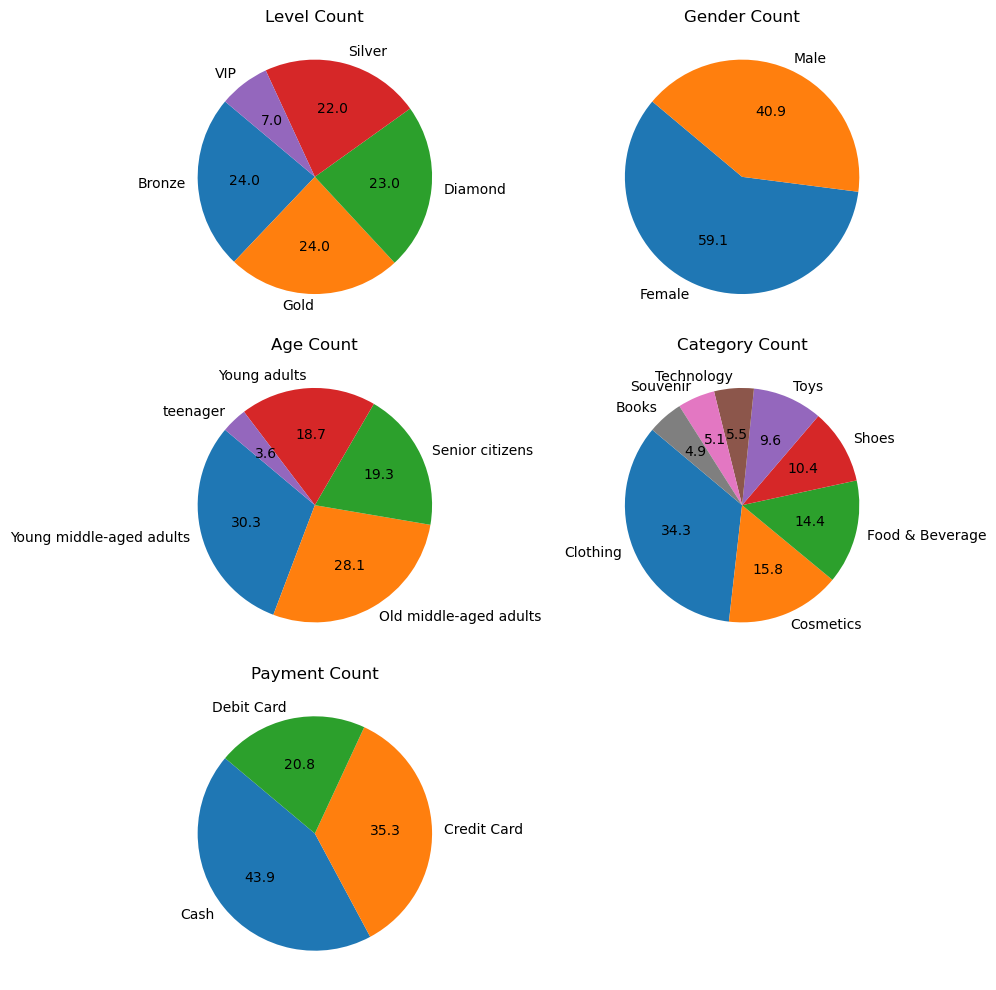

In [78]:

fig, axes = plt.subplots(3,2, figsize=(10,10))

level_counts = cs_rfm_df_ES['Level'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 0].set_title('Level Count')

gender_counts = cs_rfm_df_ES['gender'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values

axes[0, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 1].set_title('Gender Count')

age_counts = cs_rfm_df_ES['age_section'].value_counts()
labels = age_counts.index.tolist()
sizes = age_counts.values

axes[1, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 0].set_title('Age Count')

category_counts = cs_rfm_df_ES['category'].value_counts()
labels = category_counts.index.tolist()
sizes = category_counts.values

axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 1].set_title('Category Count')

payment_counts = cs_rfm_df_ES['payment_method'].value_counts()
labels = payment_counts.index.tolist()
sizes = payment_counts.values

axes[2, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[2, 0].set_title('Payment Count')

axes[2,1].axis('off')

plt.tight_layout()
plt.show()


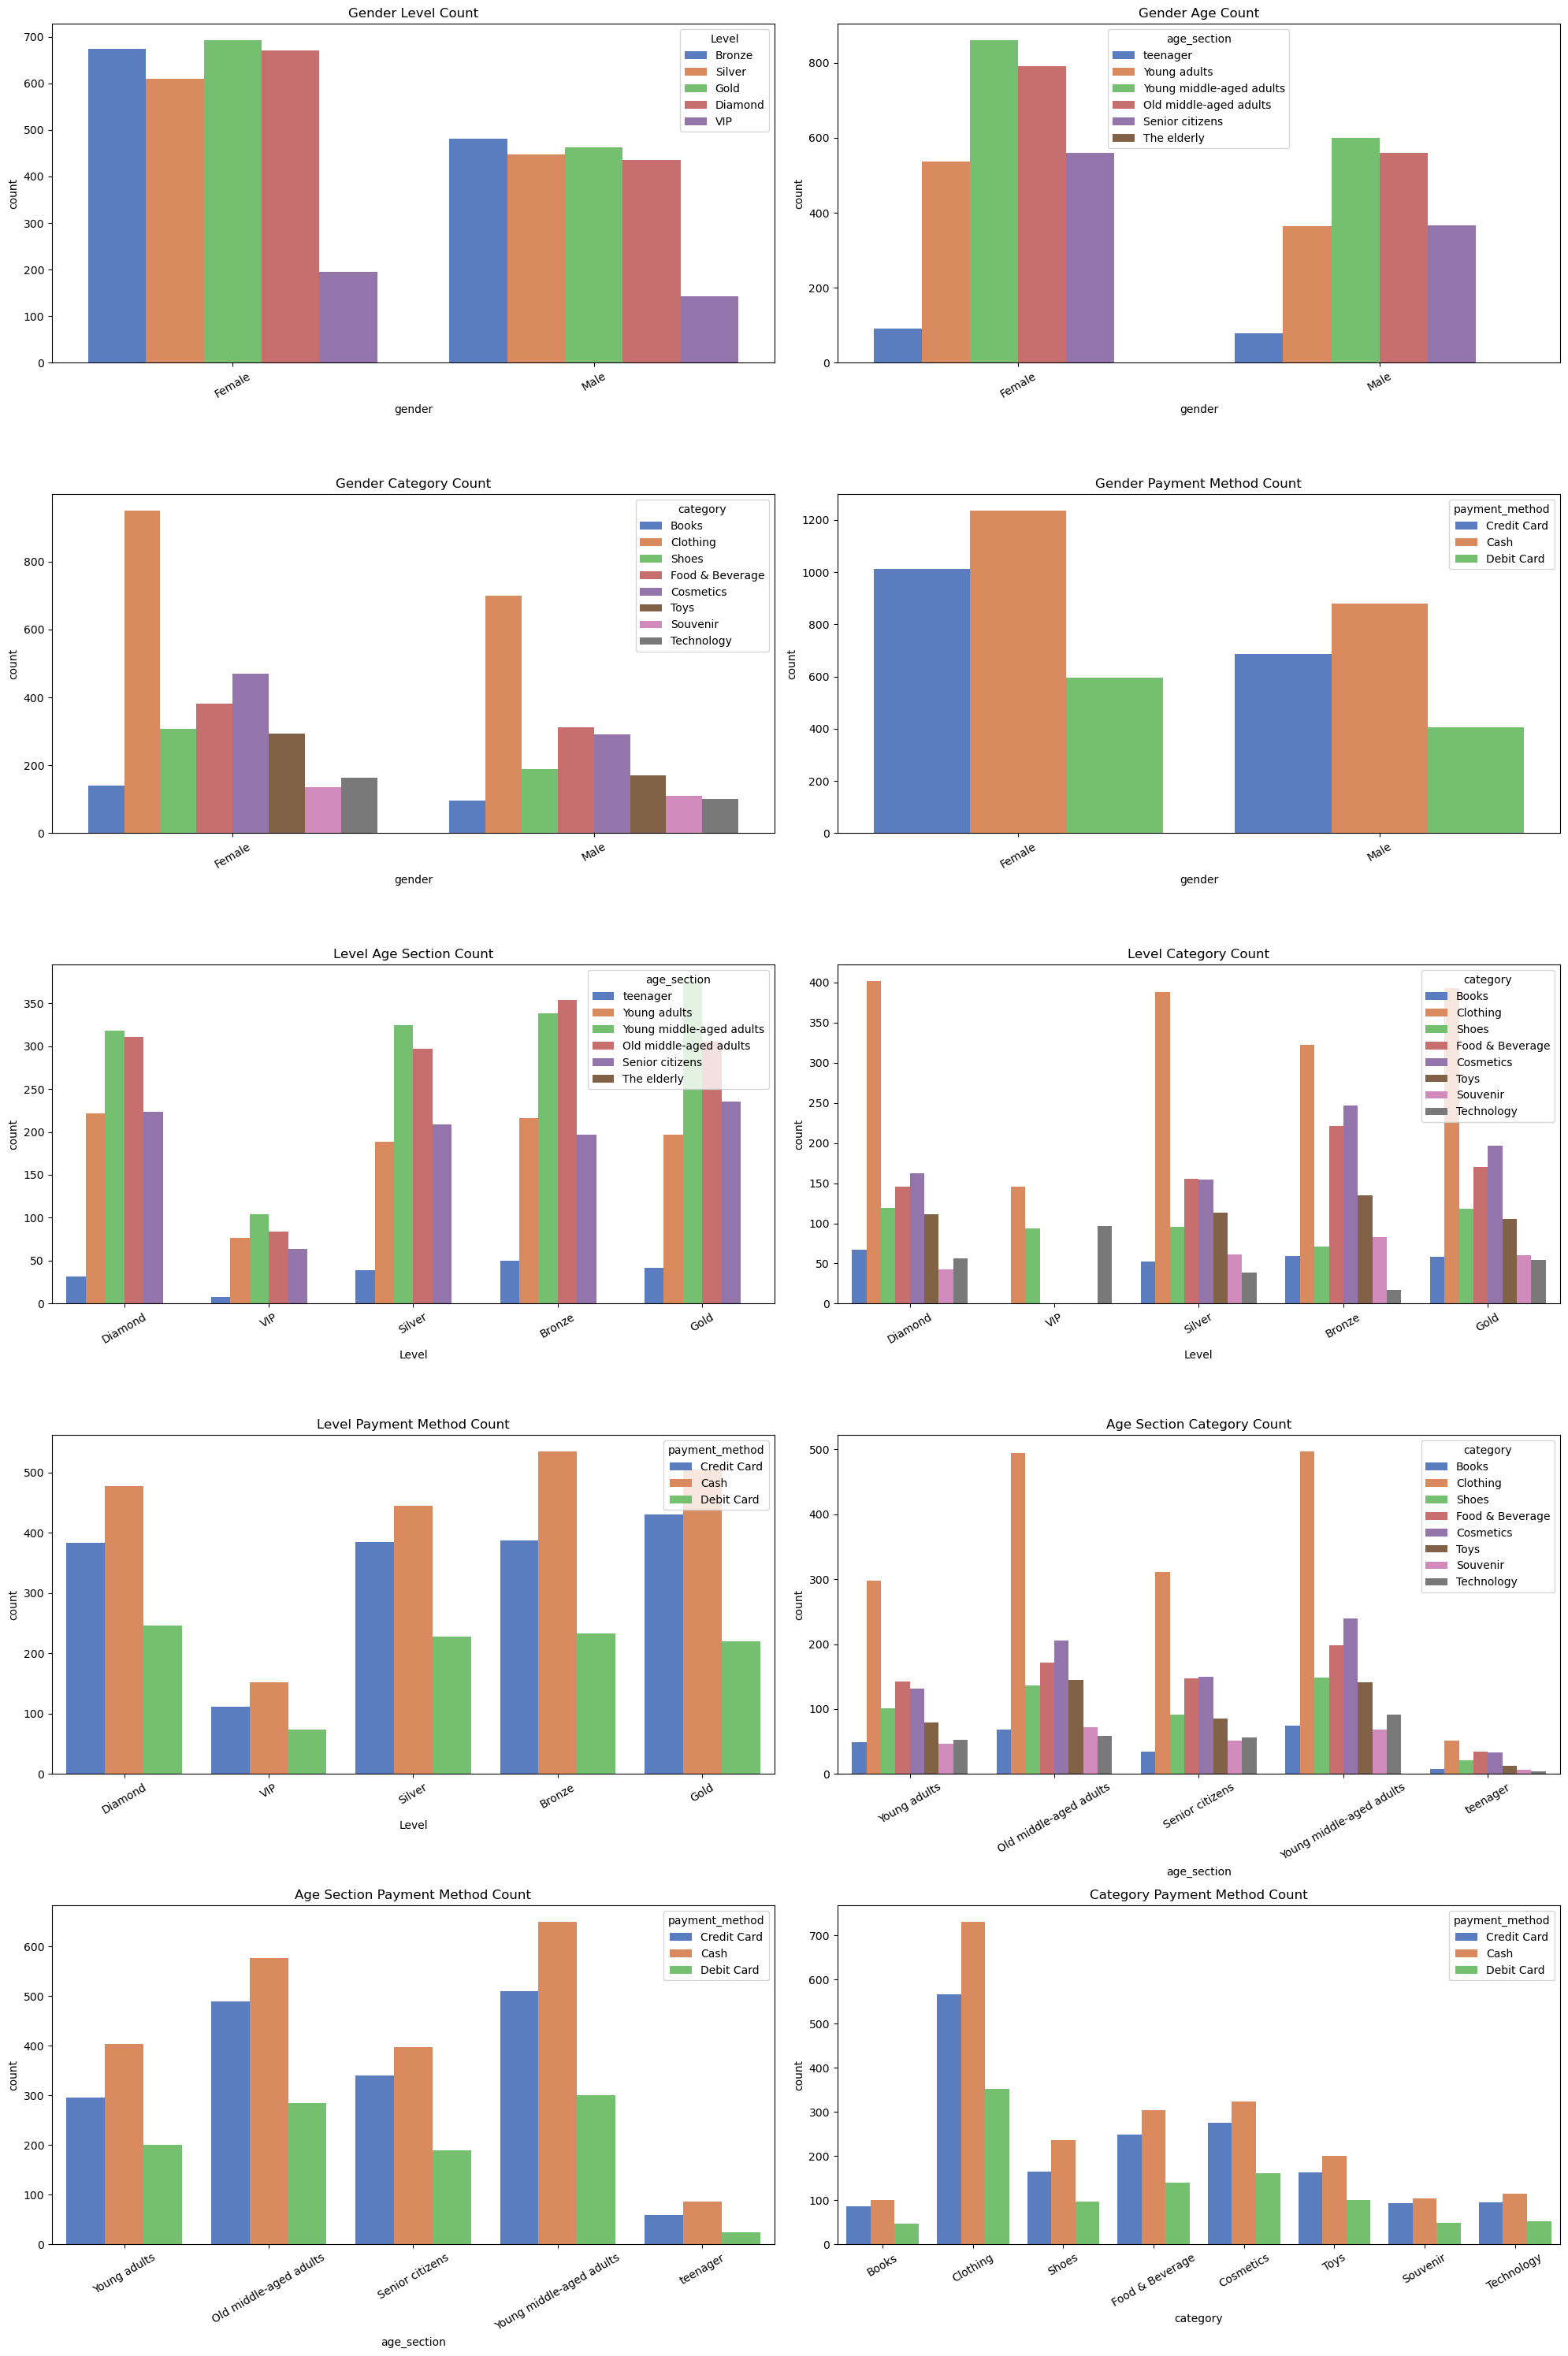

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# subplot 그리드 생성
fig, axes = plt.subplots(5, 2, figsize=(20,30))

# 각 subplot에 countplot 그리기
sns.countplot(x='gender', data=cs_rfm_df_ES, hue='Level', hue_order=order, palette='muted', ax=axes[0, 0])
axes[0, 0].set_title('Gender Level Count')
axes[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_ES, hue='age_section', hue_order=age_order, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title('Gender Age Count')
axes[0, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_ES, hue='category',  palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Gender Category Count')
axes[1, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_ES, hue='payment_method', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Gender Payment Method Count')
axes[1, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_ES, hue='age_section', hue_order=age_order, palette='muted', ax=axes[2, 0])
axes[2, 0].set_title('Level Age Section Count')
axes[2, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_ES, hue='category', palette='muted', ax=axes[2, 1])
axes[2, 1].set_title('Level Category Count')
axes[2, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_ES, hue='payment_method', palette='muted', ax=axes[3, 0])
axes[3, 0].set_title('Level Payment Method Count')
axes[3, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_ES, hue='category', palette='muted', ax=axes[3, 1])
axes[3, 1].set_title('Age Section Category Count')
axes[3, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_ES, hue='payment_method', palette='muted', ax=axes[4, 0])
axes[4, 0].set_title('Age Section Payment Method Count')
axes[4, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='category', data=cs_rfm_df_ES, hue='payment_method', palette='muted', ax=axes[4, 1])
axes[4, 1].set_title('Category Payment Method Count')
axes[4, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


중간 크기의 Metropol AVM 확인

In [80]:
cs_df_MA = cs_df[cs_df['shopping_mall'] == 'Metropol AVM'].reset_index(drop=True)
cs_df_MA

invoice_no customer_id  gender  age         category  quantity    price  \
0        I173702     C988172  Female   66            Shoes         5  3000.85   
1        I993048     C218149  Female   46         Clothing         2   600.16   
2        I473411     C452806    Male   24         Clothing         1   300.08   
3        I138674     C155059    Male   67        Cosmetics         2    81.32   
4        I218590     C224743  Female   29        Cosmetics         4   162.64   
...          ...         ...     ...  ...              ...       ...      ...   
10156    I662891     C180055  Female   50        Cosmetics         3   121.98   
10157    I327966     C107209  Female   32  Food & Beverage         1     5.23   
10158    I281214     C288090  Female   37             Toys         3   107.52   
10159    I332105     C231387  Female   65            Shoes         4  2400.68   
10160    I675411     C513603    Male   50             Toys         5   179.20   

      payment_method invoice_date shopping_mall  
0        Credit Card   2021-05-16  Metropol AVM  
1               Cash   2021-07-26  Metropol AVM  
2               Cash   2022-12-19  Metropol AVM  
3        Credit Card   2022-02-14  Metropol AVM  
4         Debit Card   2022-05-09  Metropol AVM  
...              ...          ...           ...  
10156           Cash   2021-09-03  Metropol AVM  
10157           Cash   2023-02-05  Metropol AVM  
10158           Cash   2021-02-21  Metropol AVM  
10159    Credit Card   2021-08-29  Metropol AVM  
10160           Cash   2021-10-09  Metropol AVM  

[10161 rows x 10 columns]

In [81]:
cs_df_MA = cs_df_MA.drop(['shopping_mall'], axis=1)
cs_df_MA


invoice_no customer_id  gender  age         category  quantity    price  \
0        I173702     C988172  Female   66            Shoes         5  3000.85   
1        I993048     C218149  Female   46         Clothing         2   600.16   
2        I473411     C452806    Male   24         Clothing         1   300.08   
3        I138674     C155059    Male   67        Cosmetics         2    81.32   
4        I218590     C224743  Female   29        Cosmetics         4   162.64   
...          ...         ...     ...  ...              ...       ...      ...   
10156    I662891     C180055  Female   50        Cosmetics         3   121.98   
10157    I327966     C107209  Female   32  Food & Beverage         1     5.23   
10158    I281214     C288090  Female   37             Toys         3   107.52   
10159    I332105     C231387  Female   65            Shoes         4  2400.68   
10160    I675411     C513603    Male   50             Toys         5   179.20   

      payment_method invoice_date  
0        Credit Card   2021-05-16  
1               Cash   2021-07-26  
2               Cash   2022-12-19  
3        Credit Card   2022-02-14  
4         Debit Card   2022-05-09  
...              ...          ...  
10156           Cash   2021-09-03  
10157           Cash   2023-02-05  
10158           Cash   2021-02-21  
10159    Credit Card   2021-08-29  
10160           Cash   2021-10-09  

[10161 rows x 9 columns]

In [82]:
cs_df_MA['invoice_date'].sort_values(ascending=True)

1789   2021-01-01
5654   2021-01-01
8159   2021-01-01
7176   2021-01-01
3010   2021-01-01
          ...    
8913   2023-03-08
3598   2023-03-08
5683   2023-03-08
219    2023-03-08
3825   2023-03-08
Name: invoice_date, Length: 10161, dtype: datetime64[ns]

In [83]:
cs_df_MA.loc[:,'Recency'] = pd.to_datetime(cs_df_MA['invoice_date'])\
.apply(lambda x: (pd.to_datetime('2023-03-08') - x).days)
cs_df_MA

invoice_no customer_id  gender  age         category  quantity    price  \
0        I173702     C988172  Female   66            Shoes         5  3000.85   
1        I993048     C218149  Female   46         Clothing         2   600.16   
2        I473411     C452806    Male   24         Clothing         1   300.08   
3        I138674     C155059    Male   67        Cosmetics         2    81.32   
4        I218590     C224743  Female   29        Cosmetics         4   162.64   
...          ...         ...     ...  ...              ...       ...      ...   
10156    I662891     C180055  Female   50        Cosmetics         3   121.98   
10157    I327966     C107209  Female   32  Food & Beverage         1     5.23   
10158    I281214     C288090  Female   37             Toys         3   107.52   
10159    I332105     C231387  Female   65            Shoes         4  2400.68   
10160    I675411     C513603    Male   50             Toys         5   179.20   

      payment_method invoice_date  Recency  
0        Credit Card   2021-05-16      661  
1               Cash   2021-07-26      590  
2               Cash   2022-12-19       79  
3        Credit Card   2022-02-14      387  
4         Debit Card   2022-05-09      303  
...              ...          ...      ...  
10156           Cash   2021-09-03      551  
10157           Cash   2023-02-05       31  
10158           Cash   2021-02-21      745  
10159    Credit Card   2021-08-29      556  
10160           Cash   2021-10-09      515  

[10161 rows x 10 columns]

In [84]:
cs_df_MA = cs_df_MA.drop(['invoice_date'], axis=1)
cs_df_MA

invoice_no customer_id  gender  age         category  quantity    price  \
0        I173702     C988172  Female   66            Shoes         5  3000.85   
1        I993048     C218149  Female   46         Clothing         2   600.16   
2        I473411     C452806    Male   24         Clothing         1   300.08   
3        I138674     C155059    Male   67        Cosmetics         2    81.32   
4        I218590     C224743  Female   29        Cosmetics         4   162.64   
...          ...         ...     ...  ...              ...       ...      ...   
10156    I662891     C180055  Female   50        Cosmetics         3   121.98   
10157    I327966     C107209  Female   32  Food & Beverage         1     5.23   
10158    I281214     C288090  Female   37             Toys         3   107.52   
10159    I332105     C231387  Female   65            Shoes         4  2400.68   
10160    I675411     C513603    Male   50             Toys         5   179.20   

      payment_method  Recency  
0        Credit Card      661  
1               Cash      590  
2               Cash       79  
3        Credit Card      387  
4         Debit Card      303  
...              ...      ...  
10156           Cash      551  
10157           Cash       31  
10158           Cash      745  
10159    Credit Card      556  
10160           Cash      515  

[10161 rows x 9 columns]

In [85]:
rf_df_MA = cs_df_MA.groupby('customer_id').agg(Recency=('Recency', 'min'), Frequency=('customer_id', 'count'))
rf_df_MA

Recency  Frequency
customer_id                    
C100078           97          1
C100156          702          1
C100232           56          1
C100236           12          1
C100259          789          1
...              ...        ...
C999206          425          1
C999347          724          1
C999631          482          1
C999683          617          1
C999770           93          1

[10161 rows x 2 columns]

In [86]:
m_df_MA = cs_df.copy()
m_df_MA.loc[:,'Monetary'] = m_df_MA['price'] * m_df_MA['quantity']
m_df_MA

invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  Monetary  
0        Credit Card   2022-08-05            Kanyon   7502.00  
1         Debit Card   2021-12-12    Forum Istanbul   5401.53  
2               Cash   2021-11-09         Metrocity    300.08  
3        Credit Card   2021-05-16      Metropol AVM  15004.25  
4               Cash   2021-10-24            Kanyon    242.40  
...              ...          ...               ...       ...  
99452    Credit Card   2022-09-21            Kanyon    293.25  
99453           Cash   2021-09-22    Forum Istanbul     20.92  
99454     Debit Card   2021-03-28         Metrocity     20.92  
99455           Cash   2021-03-16      Istinye Park  16800.00  
99456    Credit Card   2022-10-15  Mall of Istanbul    105.57  

[99457 rows x 11 columns]

In [87]:
m_df_MA = m_df_MA.groupby('customer_id')[['Monetary']].sum()
m_df_MA

Monetary
customer_id          
C100004       7502.00
C100005       2400.68
C100006        322.56
C100012        130.75
C100019         35.84
...               ...
C999886         47.07
C999910        136.35
C999974       7502.00
C999976        322.56
C999995       1200.32

[99457 rows x 1 columns]

In [88]:
rf_df_MA = rf_df_MA.reset_index()
rf_df_MA

customer_id  Recency  Frequency
0         C100078       97          1
1         C100156      702          1
2         C100232       56          1
3         C100236       12          1
4         C100259      789          1
...           ...      ...        ...
10156     C999206      425          1
10157     C999347      724          1
10158     C999631      482          1
10159     C999683      617          1
10160     C999770       93          1

[10161 rows x 3 columns]

In [89]:
m_df_MA = m_df_MA.reset_index()
m_df_MA

customer_id  Monetary
0         C100004   7502.00
1         C100005   2400.68
2         C100006    322.56
3         C100012    130.75
4         C100019     35.84
...           ...       ...
99452     C999886     47.07
99453     C999910    136.35
99454     C999974   7502.00
99455     C999976    322.56
99456     C999995   1200.32

[99457 rows x 2 columns]

In [90]:
rfm_df_MA = rf_df_MA.merge(m_df_MA, on='customer_id')
rfm_df_MA

customer_id  Recency  Frequency  Monetary
0         C100078       97          1     60.60
1         C100156      702          1     83.68
2         C100232       56          1    600.17
3         C100236       12          1   1200.32
4         C100259      789          1    143.36
...           ...      ...        ...       ...
10156     C999206      425          1   7502.00
10157     C999347      724          1     40.66
10158     C999631      482          1   2700.72
10159     C999683      617          1    293.25
10160     C999770       93          1     40.66

[10161 rows x 4 columns]

In [91]:

rfm_df_MA.iloc[rfm_df_MA[rfm_df_MA['Monetary']<0].index] = 0
rfm_df_MA[rfm_df_MA['Monetary']<0]

Empty DataFrame
Columns: [customer_id, Recency, Frequency, Monetary]
Index: []

In [92]:
rfm_df_MA

customer_id  Recency  Frequency  Monetary
0         C100078       97          1     60.60
1         C100156      702          1     83.68
2         C100232       56          1    600.17
3         C100236       12          1   1200.32
4         C100259      789          1    143.36
...           ...      ...        ...       ...
10156     C999206      425          1   7502.00
10157     C999347      724          1     40.66
10158     C999631      482          1   2700.72
10159     C999683      617          1    293.25
10160     C999770       93          1     40.66

[10161 rows x 4 columns]

In [93]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df_MA[['Recency','Frequency','Monetary']])

In [94]:
rfm_df_MA[['Recency','Frequency','Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'])
rfm_df_MA

customer_id   Recency  Frequency  Monetary
0         C100078  0.121859        0.0  0.002110
1         C100156  0.881910        0.0  0.002989
2         C100232  0.070352        0.0  0.022669
3         C100236  0.015075        0.0  0.045536
4         C100259  0.991206        0.0  0.005263
...           ...       ...        ...       ...
10156     C999206  0.533920        0.0  0.285648
10157     C999347  0.909548        0.0  0.001350
10158     C999631  0.605528        0.0  0.102706
10159     C999683  0.775126        0.0  0.010974
10160     C999770  0.116834        0.0  0.001350

[10161 rows x 4 columns]

In [95]:
rfm_df_MA['Recency'] = 1 - rfm_df_MA['Recency']

rfm_df_MA

customer_id   Recency  Frequency  Monetary
0         C100078  0.878141        0.0  0.002110
1         C100156  0.118090        0.0  0.002989
2         C100232  0.929648        0.0  0.022669
3         C100236  0.984925        0.0  0.045536
4         C100259  0.008794        0.0  0.005263
...           ...       ...        ...       ...
10156     C999206  0.466080        0.0  0.285648
10157     C999347  0.090452        0.0  0.001350
10158     C999631  0.394472        0.0  0.102706
10159     C999683  0.224874        0.0  0.010974
10160     C999770  0.883166        0.0  0.001350

[10161 rows x 4 columns]

In [96]:
rfm_df_MA.loc[:,'TotalScore'] = rfm_df_MA['Recency'] + rfm_df_MA['Frequency'] + rfm_df_MA['Monetary']
rfm_df_MA

customer_id   Recency  Frequency  Monetary  TotalScore
0         C100078  0.878141        0.0  0.002110    0.880250
1         C100156  0.118090        0.0  0.002989    0.121080
2         C100232  0.929648        0.0  0.022669    0.952317
3         C100236  0.984925        0.0  0.045536    1.030461
4         C100259  0.008794        0.0  0.005263    0.014057
...           ...       ...        ...       ...         ...
10156     C999206  0.466080        0.0  0.285648    0.751729
10157     C999347  0.090452        0.0  0.001350    0.091802
10158     C999631  0.394472        0.0  0.102706    0.497178
10159     C999683  0.224874        0.0  0.010974    0.235849
10160     C999770  0.883166        0.0  0.001350    0.884516

[10161 rows x 5 columns]

In [97]:
cs_rfm_df_MA = cs_df_MA.merge(rfm_df_MA[['customer_id','TotalScore']], on='customer_id')
cs_rfm_df_MA

invoice_no customer_id  gender  age         category  quantity    price  \
0        I173702     C988172  Female   66            Shoes         5  3000.85   
1        I993048     C218149  Female   46         Clothing         2   600.16   
2        I473411     C452806    Male   24         Clothing         1   300.08   
3        I138674     C155059    Male   67        Cosmetics         2    81.32   
4        I218590     C224743  Female   29        Cosmetics         4   162.64   
...          ...         ...     ...  ...              ...       ...      ...   
10156    I662891     C180055  Female   50        Cosmetics         3   121.98   
10157    I327966     C107209  Female   32  Food & Beverage         1     5.23   
10158    I281214     C288090  Female   37             Toys         3   107.52   
10159    I332105     C231387  Female   65            Shoes         4  2400.68   
10160    I675411     C513603    Male   50             Toys         5   179.20   

      payment_method  Recency  TotalScore  
0        Credit Card      661    0.741103  
1               Cash      590    0.304330  
2               Cash       79    0.911988  
3        Credit Card      387    0.519817  
4         Debit Card      303    0.643936  
...              ...      ...         ...  
10156           Cash      551    0.321533  
10157           Cash       31    0.961055  
10158           Cash      745    0.076162  
10159    Credit Card      556    0.667199  
10160           Cash      515    0.386956  

[10161 rows x 10 columns]

In [98]:
cs_rfm_df_MA.describe().T

count        mean         std        min         25%  \
age         10161.0   43.212873   14.980192  18.000000   30.000000   
quantity    10161.0    3.004626    1.414937   1.000000    2.000000   
price       10161.0  682.806120  923.461864   5.230000   40.660000   
Recency     10161.0  398.891546  228.824270   0.000000  201.000000   
TotalScore  10161.0    0.593853    0.327912   0.000248    0.333328   

                   50%          75%          max  
age          43.000000    56.000000    69.000000  
quantity      3.000000     4.000000     5.000000  
price       203.300000  1200.320000  5250.000000  
Recency     401.000000   598.000000   796.000000  
TotalScore    0.584769     0.835355     1.997487

In [99]:
l1, l2, l3, l4 = np.percentile(cs_rfm_df_MA['TotalScore'], [24, 44, 70, 93])
print(l1,l2,l3,l4)

0.321732112204914 0.5213652877435798 0.7861485201809713 1.050168086037599


In [100]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1


In [101]:
cs_rfm_df_MA['Level'] = cs_rfm_df_MA['TotalScore'].apply(get_level)
cs_rfm_df_MA

cs_rfm_df_MA['Level'] = cs_rfm_df_MA['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
cs_rfm_df_MA


invoice_no customer_id  gender  age         category  quantity    price  \
0        I173702     C988172  Female   66            Shoes         5  3000.85   
1        I993048     C218149  Female   46         Clothing         2   600.16   
2        I473411     C452806    Male   24         Clothing         1   300.08   
3        I138674     C155059    Male   67        Cosmetics         2    81.32   
4        I218590     C224743  Female   29        Cosmetics         4   162.64   
...          ...         ...     ...  ...              ...       ...      ...   
10156    I662891     C180055  Female   50        Cosmetics         3   121.98   
10157    I327966     C107209  Female   32  Food & Beverage         1     5.23   
10158    I281214     C288090  Female   37             Toys         3   107.52   
10159    I332105     C231387  Female   65            Shoes         4  2400.68   
10160    I675411     C513603    Male   50             Toys         5   179.20   

      payment_method  Recency  TotalScore    Level  
0        Credit Card      661    0.741103     Gold  
1               Cash      590    0.304330   Bronze  
2               Cash       79    0.911988  Diamond  
3        Credit Card      387    0.519817   Silver  
4         Debit Card      303    0.643936     Gold  
...              ...      ...         ...      ...  
10156           Cash      551    0.321533   Bronze  
10157           Cash       31    0.961055  Diamond  
10158           Cash      745    0.076162   Bronze  
10159    Credit Card      556    0.667199     Gold  
10160           Cash      515    0.386956   Silver  

[10161 rows x 11 columns]

In [102]:
cs_rfm_df_MA.loc[cs_rfm_df_MA['age'] < 20, 'age_section'] = 'teenager'
cs_rfm_df_MA.loc[ (20<=cs_rfm_df_MA['age']) & (cs_rfm_df_MA['age'] < 30), 'age_section'] = 'Young adults'
cs_rfm_df_MA.loc[ (30<=cs_rfm_df_MA['age']) & (cs_rfm_df_MA['age'] < 45), 'age_section'] = 'Young middle-aged adults'
cs_rfm_df_MA.loc[ (45<=cs_rfm_df_MA['age']) & (cs_rfm_df_MA['age'] < 60), 'age_section'] = 'Old middle-aged adults'
cs_rfm_df_MA.loc[ (60<=cs_rfm_df_MA['age']) & (cs_rfm_df_MA['age'] < 70), 'age_section'] = 'Senior citizens'
cs_rfm_df_MA.loc[ (70<=cs_rfm_df_MA['age']) , 'age_section'] = 'The elderly'

cs_rfm_df_MA


invoice_no customer_id  gender  age         category  quantity    price  \
0        I173702     C988172  Female   66            Shoes         5  3000.85   
1        I993048     C218149  Female   46         Clothing         2   600.16   
2        I473411     C452806    Male   24         Clothing         1   300.08   
3        I138674     C155059    Male   67        Cosmetics         2    81.32   
4        I218590     C224743  Female   29        Cosmetics         4   162.64   
...          ...         ...     ...  ...              ...       ...      ...   
10156    I662891     C180055  Female   50        Cosmetics         3   121.98   
10157    I327966     C107209  Female   32  Food & Beverage         1     5.23   
10158    I281214     C288090  Female   37             Toys         3   107.52   
10159    I332105     C231387  Female   65            Shoes         4  2400.68   
10160    I675411     C513603    Male   50             Toys         5   179.20   

      payment_method  Recency  TotalScore    Level               age_section  
0        Credit Card      661    0.741103     Gold           Senior citizens  
1               Cash      590    0.304330   Bronze    Old middle-aged adults  
2               Cash       79    0.911988  Diamond              Young adults  
3        Credit Card      387    0.519817   Silver           Senior citizens  
4         Debit Card      303    0.643936     Gold              Young adults  
...              ...      ...         ...      ...                       ...  
10156           Cash      551    0.321533   Bronze    Old middle-aged adults  
10157           Cash       31    0.961055  Diamond  Young middle-aged adults  
10158           Cash      745    0.076162   Bronze  Young middle-aged adults  
10159    Credit Card      556    0.667199     Gold           Senior citizens  
10160           Cash      515    0.386956   Silver    Old middle-aged adults  

[10161 rows x 12 columns]

In [103]:
age_order = ['teenager','Young adults','Young middle-aged adults', 'Old middle-aged adults', 'Senior citizens','The elderly' ]


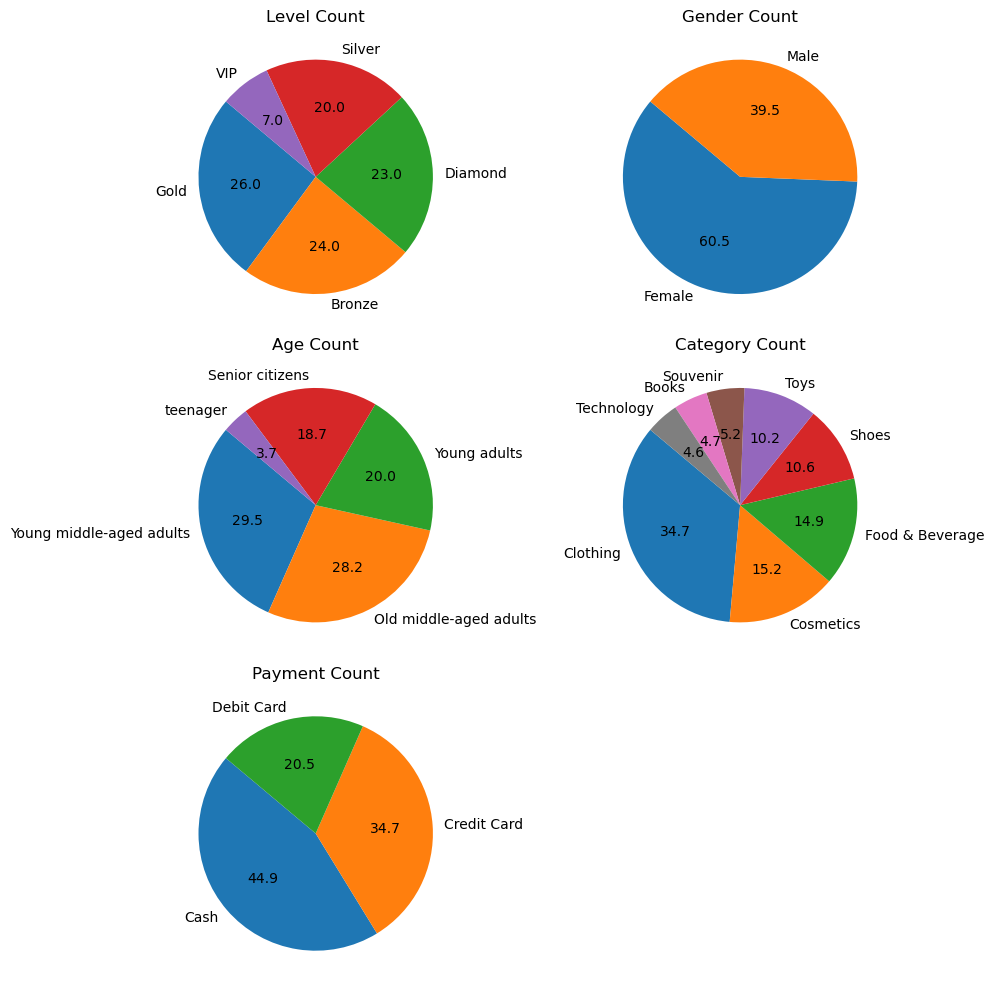

In [104]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

level_counts = cs_rfm_df_MA['Level'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 0].set_title('Level Count')

gender_counts = cs_rfm_df_MA['gender'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values

axes[0, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 1].set_title('Gender Count')

age_counts = cs_rfm_df_MA['age_section'].value_counts()
labels = age_counts.index.tolist()
sizes = age_counts.values

axes[1, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 0].set_title('Age Count')

category_counts = cs_rfm_df_MA['category'].value_counts()
labels = category_counts.index.tolist()
sizes = category_counts.values

axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 1].set_title('Category Count')

payment_counts = cs_rfm_df_MA['payment_method'].value_counts()
labels = payment_counts.index.tolist()
sizes = payment_counts.values

axes[2, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[2, 0].set_title('Payment Count')

axes[2,1].axis('off')

plt.tight_layout()
plt.show()


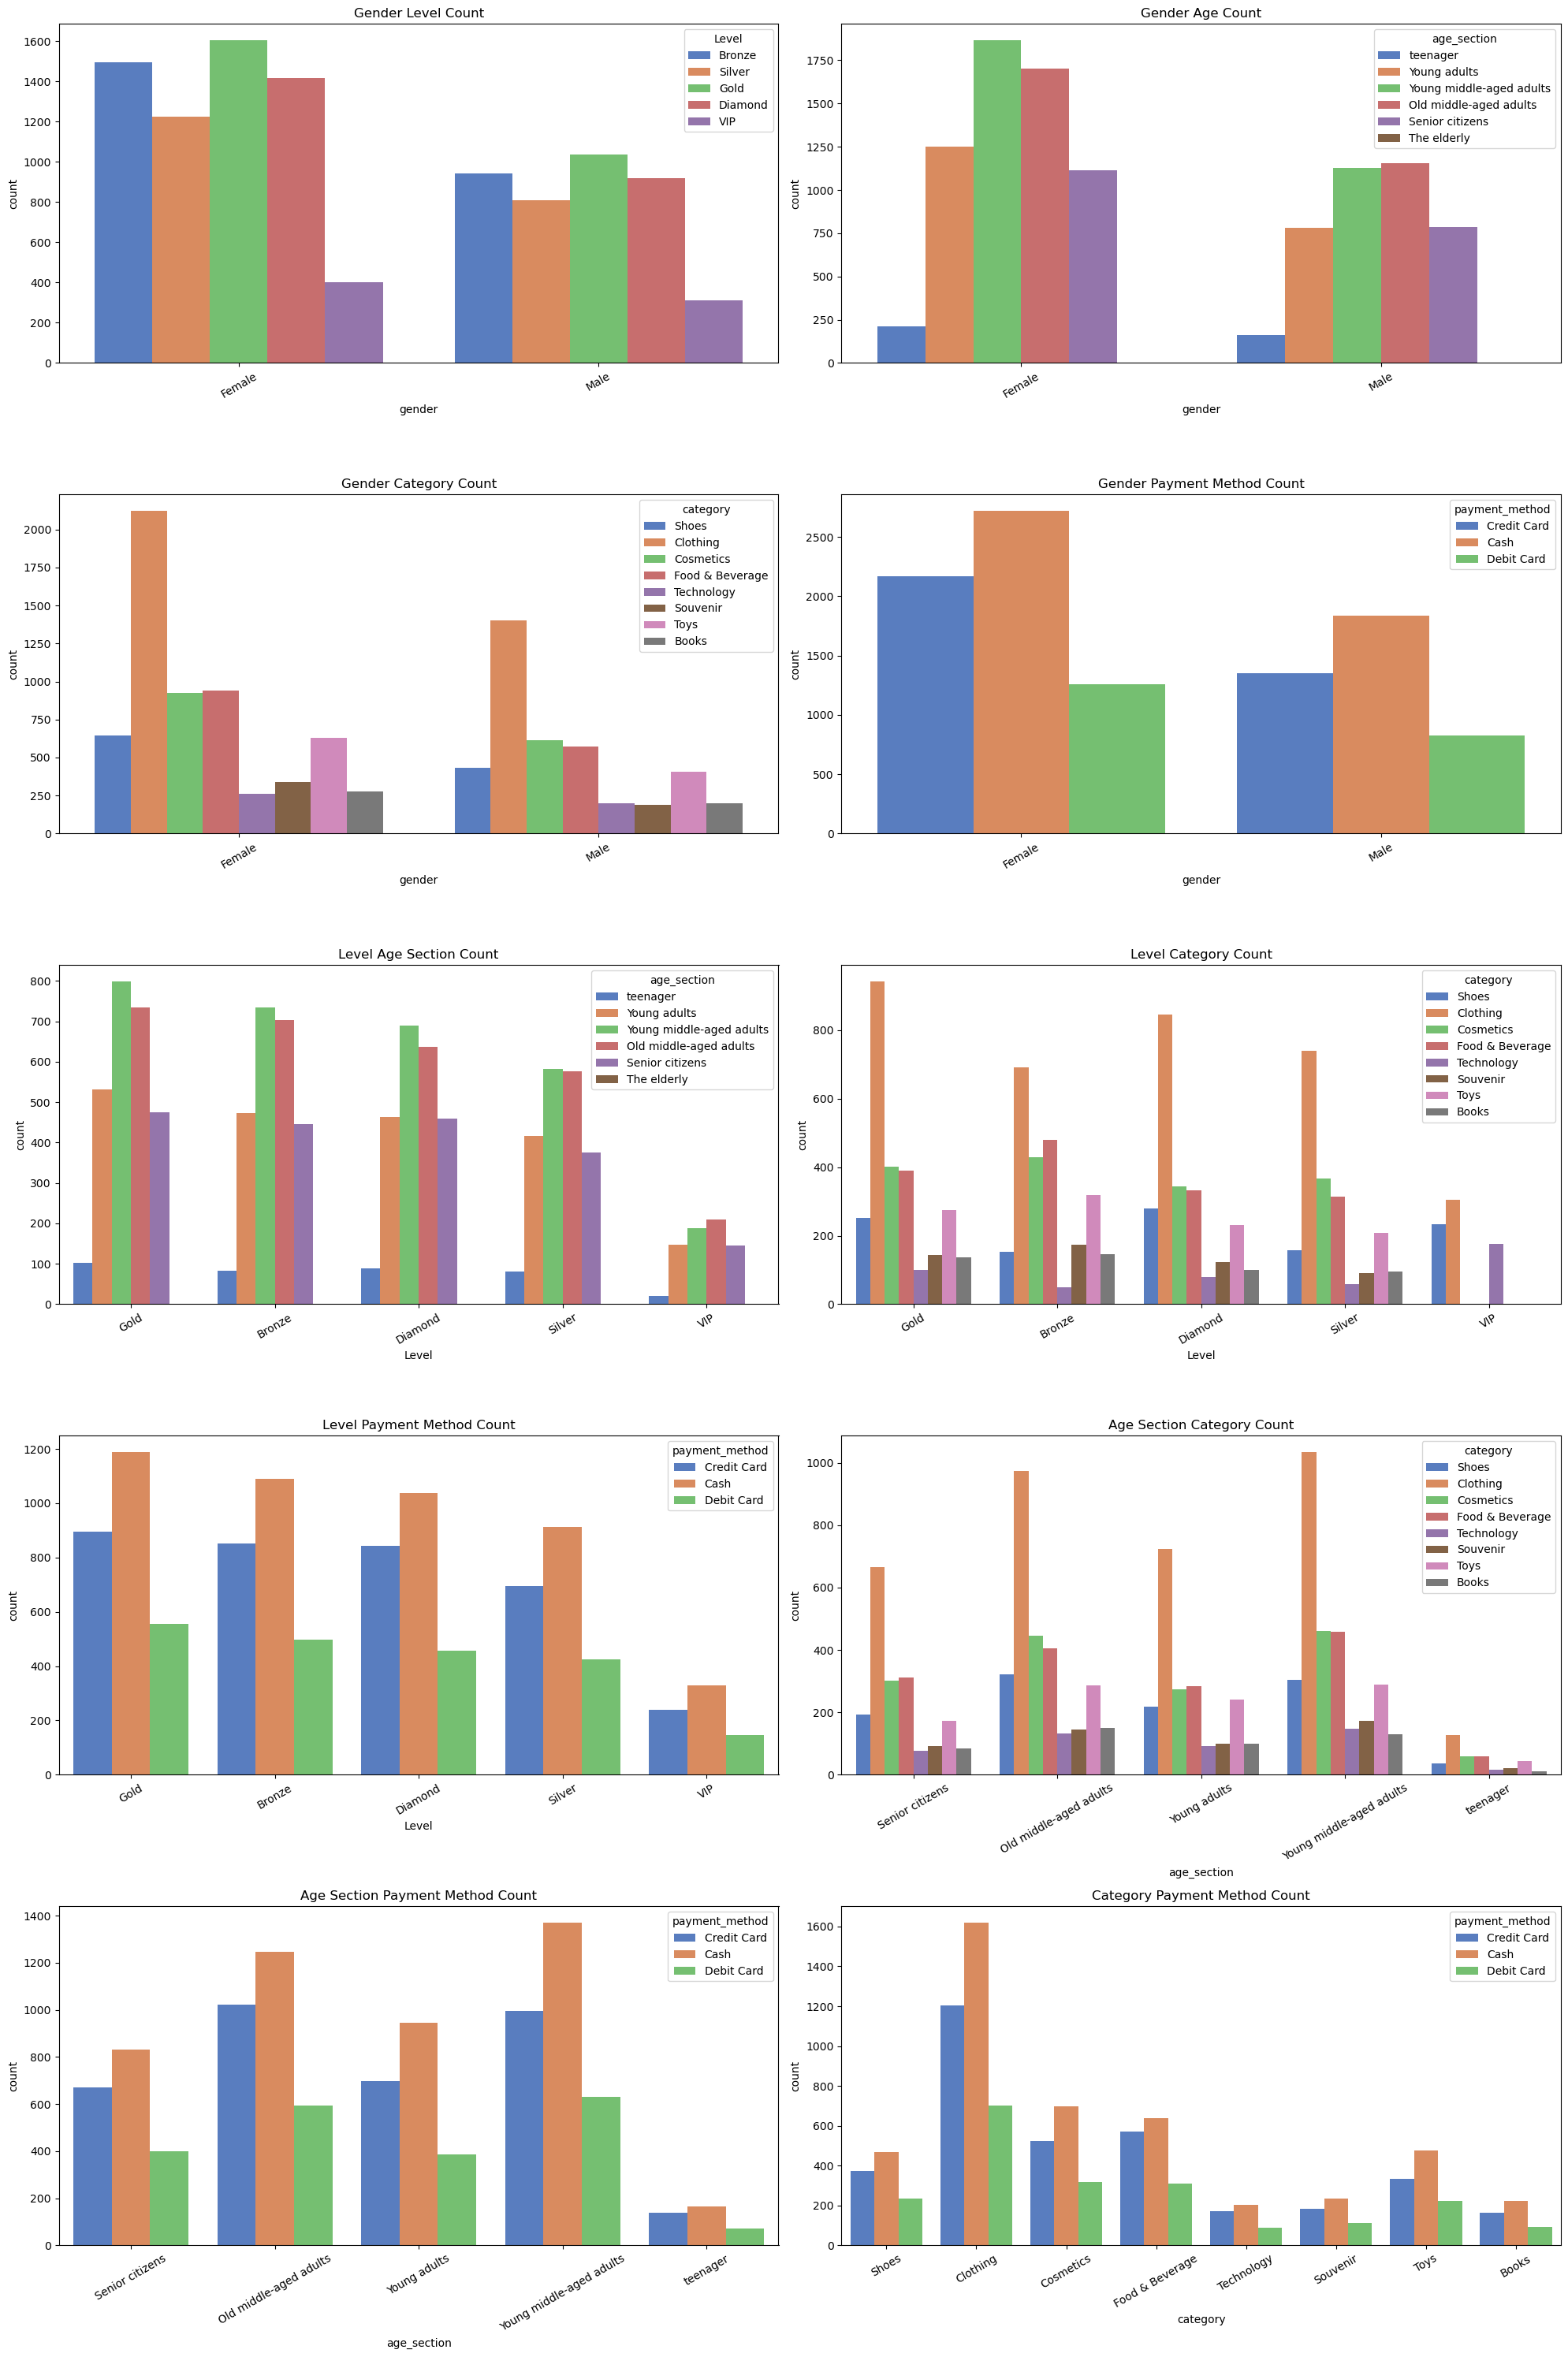

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# subplot 그리드 생성
fig, axes = plt.subplots(5, 2, figsize=(20,30))

# 각 subplot에 countplot 그리기
sns.countplot(x='gender', data=cs_rfm_df_MA, hue='Level', hue_order=order, palette='muted', ax=axes[0, 0])
axes[0, 0].set_title('Gender Level Count')
axes[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_MA, hue='age_section', hue_order=age_order, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title('Gender Age Count')
axes[0, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_MA, hue='category',  palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Gender Category Count')
axes[1, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_MA, hue='payment_method', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Gender Payment Method Count')
axes[1, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_MA, hue='age_section', hue_order=age_order, palette='muted', ax=axes[2, 0])
axes[2, 0].set_title('Level Age Section Count')
axes[2, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_MA, hue='category', palette='muted', ax=axes[2, 1])
axes[2, 1].set_title('Level Category Count')
axes[2, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_MA, hue='payment_method', palette='muted', ax=axes[3, 0])
axes[3, 0].set_title('Level Payment Method Count')
axes[3, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_MA, hue='category', palette='muted', ax=axes[3, 1])
axes[3, 1].set_title('Age Section Category Count')
axes[3, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_MA, hue='payment_method', palette='muted', ax=axes[4, 0])
axes[4, 0].set_title('Age Section Payment Method Count')
axes[4, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='category', data=cs_rfm_df_MA, hue='payment_method', palette='muted', ax=axes[4, 1])
axes[4, 1].set_title('Category Payment Method Count')
axes[4, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


중간 크기의 쇼핑몰도 확인한 결과 그래프 양상이 제일 큰 회원 수의 쇼핑몰과 제일 작은 회원 수의 쇼핑몰과 다르지 않았음을 알 수 있었다.

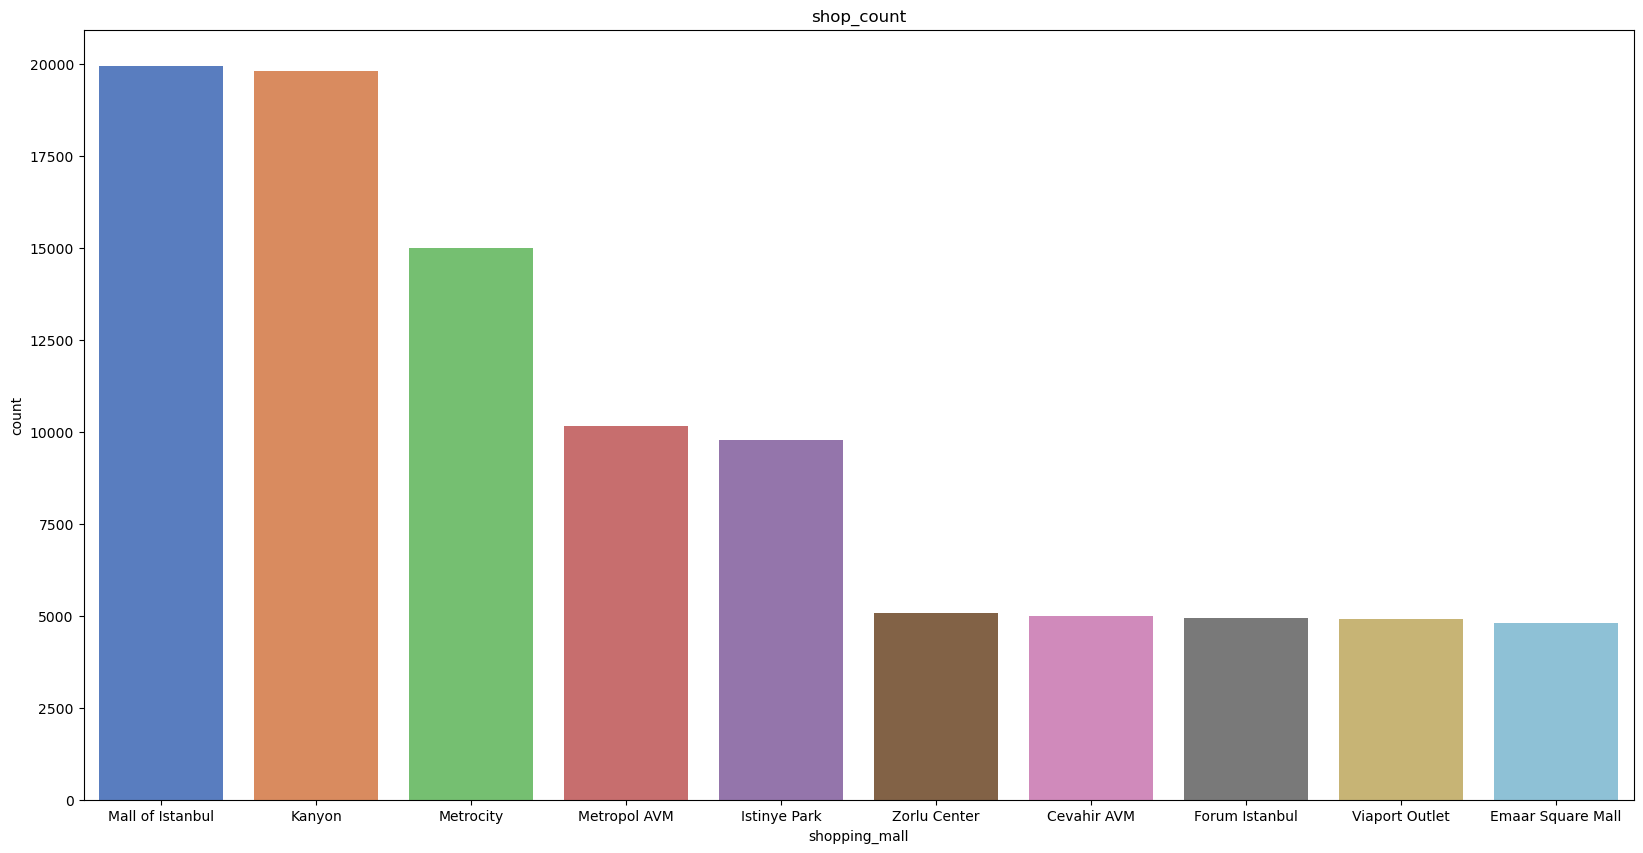

In [106]:
shop_order = ['Mall of Istanbul','Kanyon','Metrocity','Metropol AVM','Istinye Park','Zorlu Center','Cevahir AVM',\
              'Forum Istanbul','Viaport Outlet','Emaar Square Mall']
plt.figure(figsize=(20,10))
sns.countplot(x='shopping_mall' , data=cs_df, palette='muted', order=shop_order)
plt.title('shop_count')
plt.show()

가설
- 의류와 화장품과 식료품을 많이 팔 수록 회원 규모가 크다
> 가설을 증명하기 전에, 먼저 쇼핑몰대상으로 회원 규모에 상관 없이 그래프 양상이 동일하다는 것을 먼저 확인.  
> 가장 회원 규모가 큰 쇼핑몰부터 임의로 뽑은 5개의 쇼핑몰의 그래프양상을 먼저 파악한다.  
> (Mall of Istanbul, Metrocity, Metropol AVM, Cevahir AVM, Emaar Square Mall)

In [107]:
cs_df_ME = cs_df[cs_df['shopping_mall'] == 'Metrocity']
cs_df_ME

invoice_no customer_id  gender  age         category  quantity    price  \
2        I127801     C266599    Male   20         Clothing         1   300.08   
8        I293455     C159642    Male   69         Clothing         3   900.24   
10       I306368     C240286  Female   36  Food & Beverage         2    10.46   
12       I640508     C225330  Female   67             Toys         4   143.36   
16       I294687     C300786    Male   65            Books         2    30.30   
...          ...         ...     ...  ...              ...       ...      ...   
99405    I651573     C425890    Male   56            Shoes         3  1800.51   
99408    I949512     C217355  Female   47         Clothing         2   600.16   
99424    I549710     C541824  Female   34       Technology         3  3150.00   
99433    I403904     C142643    Male   28             Toys         1    35.84   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   

      payment_method invoice_date shopping_mall  
2               Cash   2021-11-09     Metrocity  
8        Credit Card   2021-11-04     Metrocity  
10              Cash   2022-12-25     Metrocity  
12        Debit Card   2022-07-31     Metrocity  
16        Debit Card   2021-01-16     Metrocity  
...              ...          ...           ...  
99405     Debit Card   2022-08-02     Metrocity  
99408    Credit Card   2021-02-21     Metrocity  
99424           Cash   2021-01-13     Metrocity  
99433    Credit Card   2022-11-02     Metrocity  
99454     Debit Card   2021-03-28     Metrocity  

[15011 rows x 10 columns]

In [108]:
cs_df_ME = cs_df_ME.drop(['shopping_mall'], axis=1)


In [109]:
cs_df_ME['invoice_date'].sort_values(ascending=True)

64601   2021-01-01
27812   2021-01-01
36199   2021-01-01
29758   2021-01-01
36006   2021-01-01
           ...    
45962   2023-03-08
79272   2023-03-08
49303   2023-03-08
60333   2023-03-08
8321    2023-03-08
Name: invoice_date, Length: 15011, dtype: datetime64[ns]

In [110]:
cs_df_ME.loc[:,'Recency'] = pd.to_datetime(cs_df_ME['invoice_date'])\
.apply(lambda x: (pd.to_datetime('2023-03-08') - x).days)

In [111]:
cs_df_ME = cs_df_ME.drop(['invoice_date'], axis=1)
cs_df_ME

invoice_no customer_id  gender  age         category  quantity    price  \
2        I127801     C266599    Male   20         Clothing         1   300.08   
8        I293455     C159642    Male   69         Clothing         3   900.24   
10       I306368     C240286  Female   36  Food & Beverage         2    10.46   
12       I640508     C225330  Female   67             Toys         4   143.36   
16       I294687     C300786    Male   65            Books         2    30.30   
...          ...         ...     ...  ...              ...       ...      ...   
99405    I651573     C425890    Male   56            Shoes         3  1800.51   
99408    I949512     C217355  Female   47         Clothing         2   600.16   
99424    I549710     C541824  Female   34       Technology         3  3150.00   
99433    I403904     C142643    Male   28             Toys         1    35.84   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   

      payment_method  Recency  
2               Cash      484  
8        Credit Card      489  
10              Cash       73  
12        Debit Card      220  
16        Debit Card      781  
...              ...      ...  
99405     Debit Card      218  
99408    Credit Card      745  
99424           Cash      784  
99433    Credit Card      126  
99454     Debit Card      710  

[15011 rows x 9 columns]

In [112]:
rf_df_ME = cs_df_ME.groupby('customer_id').agg(Recency=('Recency', 'min'), Frequency=('customer_id', 'count'))
rf_df_ME

Recency  Frequency
customer_id                    
C100004          467          1
C100019          591          1
C100025          643          1
C100042          428          1
C100095          150          1
...              ...        ...
C999261           16          1
C999272          331          1
C999653          576          1
C999853           14          1
C999976          261          1

[15011 rows x 2 columns]

In [113]:
m_df_ME = cs_df.copy()
m_df_ME.loc[:,'Monetary'] = m_df_ME['price'] * m_df_ME['quantity']
m_df_ME

invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  Monetary  
0        Credit Card   2022-08-05            Kanyon   7502.00  
1         Debit Card   2021-12-12    Forum Istanbul   5401.53  
2               Cash   2021-11-09         Metrocity    300.08  
3        Credit Card   2021-05-16      Metropol AVM  15004.25  
4               Cash   2021-10-24            Kanyon    242.40  
...              ...          ...               ...       ...  
99452    Credit Card   2022-09-21            Kanyon    293.25  
99453           Cash   2021-09-22    Forum Istanbul     20.92  
99454     Debit Card   2021-03-28         Metrocity     20.92  
99455           Cash   2021-03-16      Istinye Park  16800.00  
99456    Credit Card   2022-10-15  Mall of Istanbul    105.57  

[99457 rows x 11 columns]

In [114]:
m_df_ME = m_df_ME.groupby('customer_id')[['Monetary']].sum()
m_df_ME

Monetary
customer_id          
C100004       7502.00
C100005       2400.68
C100006        322.56
C100012        130.75
C100019         35.84
...               ...
C999886         47.07
C999910        136.35
C999974       7502.00
C999976        322.56
C999995       1200.32

[99457 rows x 1 columns]

In [115]:
rf_df_ME = rf_df_ME.reset_index()
rf_df_ME

customer_id  Recency  Frequency
0         C100004      467          1
1         C100019      591          1
2         C100025      643          1
3         C100042      428          1
4         C100095      150          1
...           ...      ...        ...
15006     C999261       16          1
15007     C999272      331          1
15008     C999653      576          1
15009     C999853       14          1
15010     C999976      261          1

[15011 rows x 3 columns]

In [116]:
m_df_ME = m_df_ME.reset_index()
m_df_ME

customer_id  Monetary
0         C100004   7502.00
1         C100005   2400.68
2         C100006    322.56
3         C100012    130.75
4         C100019     35.84
...           ...       ...
99452     C999886     47.07
99453     C999910    136.35
99454     C999974   7502.00
99455     C999976    322.56
99456     C999995   1200.32

[99457 rows x 2 columns]

In [117]:
rfm_df_ME = rf_df_ME.merge(m_df_ME, on='customer_id')
rfm_df_ME

customer_id  Recency  Frequency  Monetary
0         C100004      467          1   7502.00
1         C100019      591          1     35.84
2         C100025      643          1    143.36
3         C100042      428          1    650.56
4         C100095      150          1    130.75
...           ...      ...        ...       ...
15006     C999261       16          1   7502.00
15007     C999272      331          1   1050.00
15008     C999653      576          1     40.66
15009     C999853       14          1    300.08
15010     C999976      261          1    322.56

[15011 rows x 4 columns]

In [118]:
rfm_df_ME.iloc[rfm_df_ME[rfm_df_ME['Monetary']<0].index] = 0
rfm_df_ME[rfm_df_ME['Monetary']<0]



Empty DataFrame
Columns: [customer_id, Recency, Frequency, Monetary]
Index: []

In [119]:
rfm_df_ME

customer_id  Recency  Frequency  Monetary
0         C100004      467          1   7502.00
1         C100019      591          1     35.84
2         C100025      643          1    143.36
3         C100042      428          1    650.56
4         C100095      150          1    130.75
...           ...      ...        ...       ...
15006     C999261       16          1   7502.00
15007     C999272      331          1   1050.00
15008     C999653      576          1     40.66
15009     C999853       14          1    300.08
15010     C999976      261          1    322.56

[15011 rows x 4 columns]

In [120]:
rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df_ME[['Recency','Frequency','Monetary']])

rfm_df_ME[['Recency','Frequency','Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'])
rfm_df_ME


customer_id   Recency  Frequency  Monetary
0         C100004  0.586683        0.0  0.285648
1         C100019  0.742462        0.0  0.001166
2         C100025  0.807789        0.0  0.005263
3         C100042  0.537688        0.0  0.024589
4         C100095  0.188442        0.0  0.004783
...           ...       ...        ...       ...
15006     C999261  0.020101        0.0  0.285648
15007     C999272  0.415829        0.0  0.039809
15008     C999653  0.723618        0.0  0.001350
15009     C999853  0.017588        0.0  0.011235
15010     C999976  0.327889        0.0  0.012091

[15011 rows x 4 columns]

In [121]:
rfm_df_ME['Recency'] = 1 - rfm_df_ME['Recency']

rfm_df_ME

customer_id   Recency  Frequency  Monetary
0         C100004  0.413317        0.0  0.285648
1         C100019  0.257538        0.0  0.001166
2         C100025  0.192211        0.0  0.005263
3         C100042  0.462312        0.0  0.024589
4         C100095  0.811558        0.0  0.004783
...           ...       ...        ...       ...
15006     C999261  0.979899        0.0  0.285648
15007     C999272  0.584171        0.0  0.039809
15008     C999653  0.276382        0.0  0.001350
15009     C999853  0.982412        0.0  0.011235
15010     C999976  0.672111        0.0  0.012091

[15011 rows x 4 columns]

In [122]:
rfm_df_ME.loc[:,'TotalScore'] = rfm_df_ME['Recency'] + rfm_df_ME['Frequency'] + rfm_df_ME['Monetary']
rfm_df_ME


customer_id   Recency  Frequency  Monetary  TotalScore
0         C100004  0.413317        0.0  0.285648    0.698965
1         C100019  0.257538        0.0  0.001166    0.258704
2         C100025  0.192211        0.0  0.005263    0.197474
3         C100042  0.462312        0.0  0.024589    0.486900
4         C100095  0.811558        0.0  0.004783    0.816340
...           ...       ...        ...       ...         ...
15006     C999261  0.979899        0.0  0.285648    1.265548
15007     C999272  0.584171        0.0  0.039809    0.623980
15008     C999653  0.276382        0.0  0.001350    0.277732
15009     C999853  0.982412        0.0  0.011235    0.993647
15010     C999976  0.672111        0.0  0.012091    0.684202

[15011 rows x 5 columns]

In [123]:
cs_rfm_df_ME = cs_df_ME.merge(rfm_df_ME[['customer_id','TotalScore']], on='customer_id')
cs_rfm_df_ME


invoice_no customer_id  gender  age         category  quantity    price  \
0        I127801     C266599    Male   20         Clothing         1   300.08   
1        I293455     C159642    Male   69         Clothing         3   900.24   
2        I306368     C240286  Female   36  Food & Beverage         2    10.46   
3        I640508     C225330  Female   67             Toys         4   143.36   
4        I294687     C300786    Male   65            Books         2    30.30   
...          ...         ...     ...  ...              ...       ...      ...   
15006    I651573     C425890    Male   56            Shoes         3  1800.51   
15007    I949512     C217355  Female   47         Clothing         2   600.16   
15008    I549710     C541824  Female   34       Technology         3  3150.00   
15009    I403904     C142643    Male   28             Toys         1    35.84   
15010    I824010     C103292    Male   63  Food & Beverage         2    10.46   

      payment_method  Recency  TotalScore  
0               Cash      484    0.403194  
1        Credit Card      489    0.488384  
2               Cash       73    0.908889  
3         Debit Card      220    0.745268  
4         Debit Card      781    0.020954  
...              ...      ...         ...  
15006     Debit Card      218    0.931745  
15007    Credit Card      745    0.109607  
15008           Cash      784    0.374948  
15009    Credit Card      126    0.842875  
15010     Debit Card      710    0.108638  

[15011 rows x 10 columns]

In [124]:
l1, l2, l3, l4 = np.percentile(cs_rfm_df_MI['TotalScore'], [24, 46, 72, 93])
print(l1,l2,l3,l4)


0.3244437502793929 0.5571796925405321 0.8200424796576316 1.05122363351444


In [125]:
cs_rfm_df_ME['Level'] = cs_rfm_df_ME['TotalScore'].apply(get_level)
cs_rfm_df_ME

cs_rfm_df_ME['Level'] = cs_rfm_df_ME['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
cs_rfm_df_ME

invoice_no customer_id  gender  age         category  quantity    price  \
0        I127801     C266599    Male   20         Clothing         1   300.08   
1        I293455     C159642    Male   69         Clothing         3   900.24   
2        I306368     C240286  Female   36  Food & Beverage         2    10.46   
3        I640508     C225330  Female   67             Toys         4   143.36   
4        I294687     C300786    Male   65            Books         2    30.30   
...          ...         ...     ...  ...              ...       ...      ...   
15006    I651573     C425890    Male   56            Shoes         3  1800.51   
15007    I949512     C217355  Female   47         Clothing         2   600.16   
15008    I549710     C541824  Female   34       Technology         3  3150.00   
15009    I403904     C142643    Male   28             Toys         1    35.84   
15010    I824010     C103292    Male   63  Food & Beverage         2    10.46   

      payment_method  Recency  TotalScore    Level  
0               Cash      484    0.403194   Silver  
1        Credit Card      489    0.488384   Silver  
2               Cash       73    0.908889  Diamond  
3         Debit Card      220    0.745268     Gold  
4         Debit Card      781    0.020954   Bronze  
...              ...      ...         ...      ...  
15006     Debit Card      218    0.931745  Diamond  
15007    Credit Card      745    0.109607   Bronze  
15008           Cash      784    0.374948   Silver  
15009    Credit Card      126    0.842875  Diamond  
15010     Debit Card      710    0.108638   Bronze  

[15011 rows x 11 columns]

In [126]:
cs_rfm_df_ME.loc[cs_rfm_df_ME['age'] < 20, 'age_section'] = 'teenager'
cs_rfm_df_ME.loc[ (20<=cs_rfm_df_ME['age']) & (cs_rfm_df_ME['age'] < 30), 'age_section'] = 'Young adults'
cs_rfm_df_ME.loc[ (30<=cs_rfm_df_ME['age']) & (cs_rfm_df_ME['age'] < 45), 'age_section'] = 'Young middle-aged adults'
cs_rfm_df_ME.loc[ (45<=cs_rfm_df_ME['age']) & (cs_rfm_df_ME['age'] < 60), 'age_section'] = 'Old middle-aged adults'
cs_rfm_df_ME.loc[ (60<=cs_rfm_df_ME['age']) & (cs_rfm_df_ME['age'] < 70), 'age_section'] = 'Senior citizens'
cs_rfm_df_ME.loc[ (70<=cs_rfm_df_ME['age']) , 'age_section'] = 'The elderly'

cs_rfm_df_ME


invoice_no customer_id  gender  age         category  quantity    price  \
0        I127801     C266599    Male   20         Clothing         1   300.08   
1        I293455     C159642    Male   69         Clothing         3   900.24   
2        I306368     C240286  Female   36  Food & Beverage         2    10.46   
3        I640508     C225330  Female   67             Toys         4   143.36   
4        I294687     C300786    Male   65            Books         2    30.30   
...          ...         ...     ...  ...              ...       ...      ...   
15006    I651573     C425890    Male   56            Shoes         3  1800.51   
15007    I949512     C217355  Female   47         Clothing         2   600.16   
15008    I549710     C541824  Female   34       Technology         3  3150.00   
15009    I403904     C142643    Male   28             Toys         1    35.84   
15010    I824010     C103292    Male   63  Food & Beverage         2    10.46   

      payment_method  Recency  TotalScore    Level               age_section  
0               Cash      484    0.403194   Silver              Young adults  
1        Credit Card      489    0.488384   Silver           Senior citizens  
2               Cash       73    0.908889  Diamond  Young middle-aged adults  
3         Debit Card      220    0.745268     Gold           Senior citizens  
4         Debit Card      781    0.020954   Bronze           Senior citizens  
...              ...      ...         ...      ...                       ...  
15006     Debit Card      218    0.931745  Diamond    Old middle-aged adults  
15007    Credit Card      745    0.109607   Bronze    Old middle-aged adults  
15008           Cash      784    0.374948   Silver  Young middle-aged adults  
15009    Credit Card      126    0.842875  Diamond              Young adults  
15010     Debit Card      710    0.108638   Bronze           Senior citizens  

[15011 rows x 12 columns]

In [127]:
age_order = ['teenager','Young adults','Young middle-aged adults', 'Old middle-aged adults', 'Senior citizens','The elderly' ]


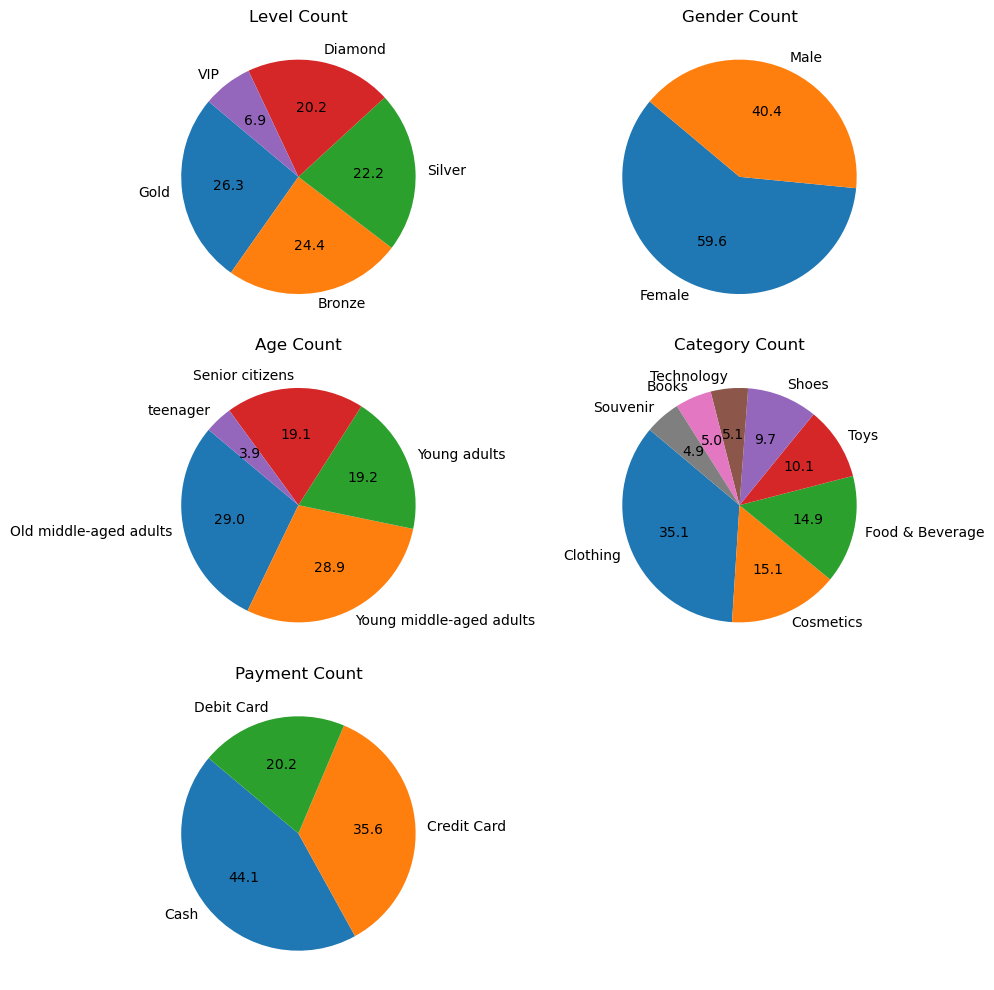

In [128]:

fig, axes = plt.subplots(3,2, figsize=(10,10))

level_counts = cs_rfm_df_ME['Level'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 0].set_title('Level Count')

gender_counts = cs_rfm_df_ME['gender'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values

axes[0, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 1].set_title('Gender Count')

age_counts = cs_rfm_df_ME['age_section'].value_counts()
labels = age_counts.index.tolist()
sizes = age_counts.values

axes[1, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 0].set_title('Age Count')

category_counts = cs_rfm_df_ME['category'].value_counts()
labels = category_counts.index.tolist()
sizes = category_counts.values

axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 1].set_title('Category Count')

payment_counts = cs_rfm_df_ME['payment_method'].value_counts()
labels = payment_counts.index.tolist()
sizes = payment_counts.values

axes[2, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[2, 0].set_title('Payment Count')

axes[2,1].axis('off')

plt.tight_layout()
plt.show()


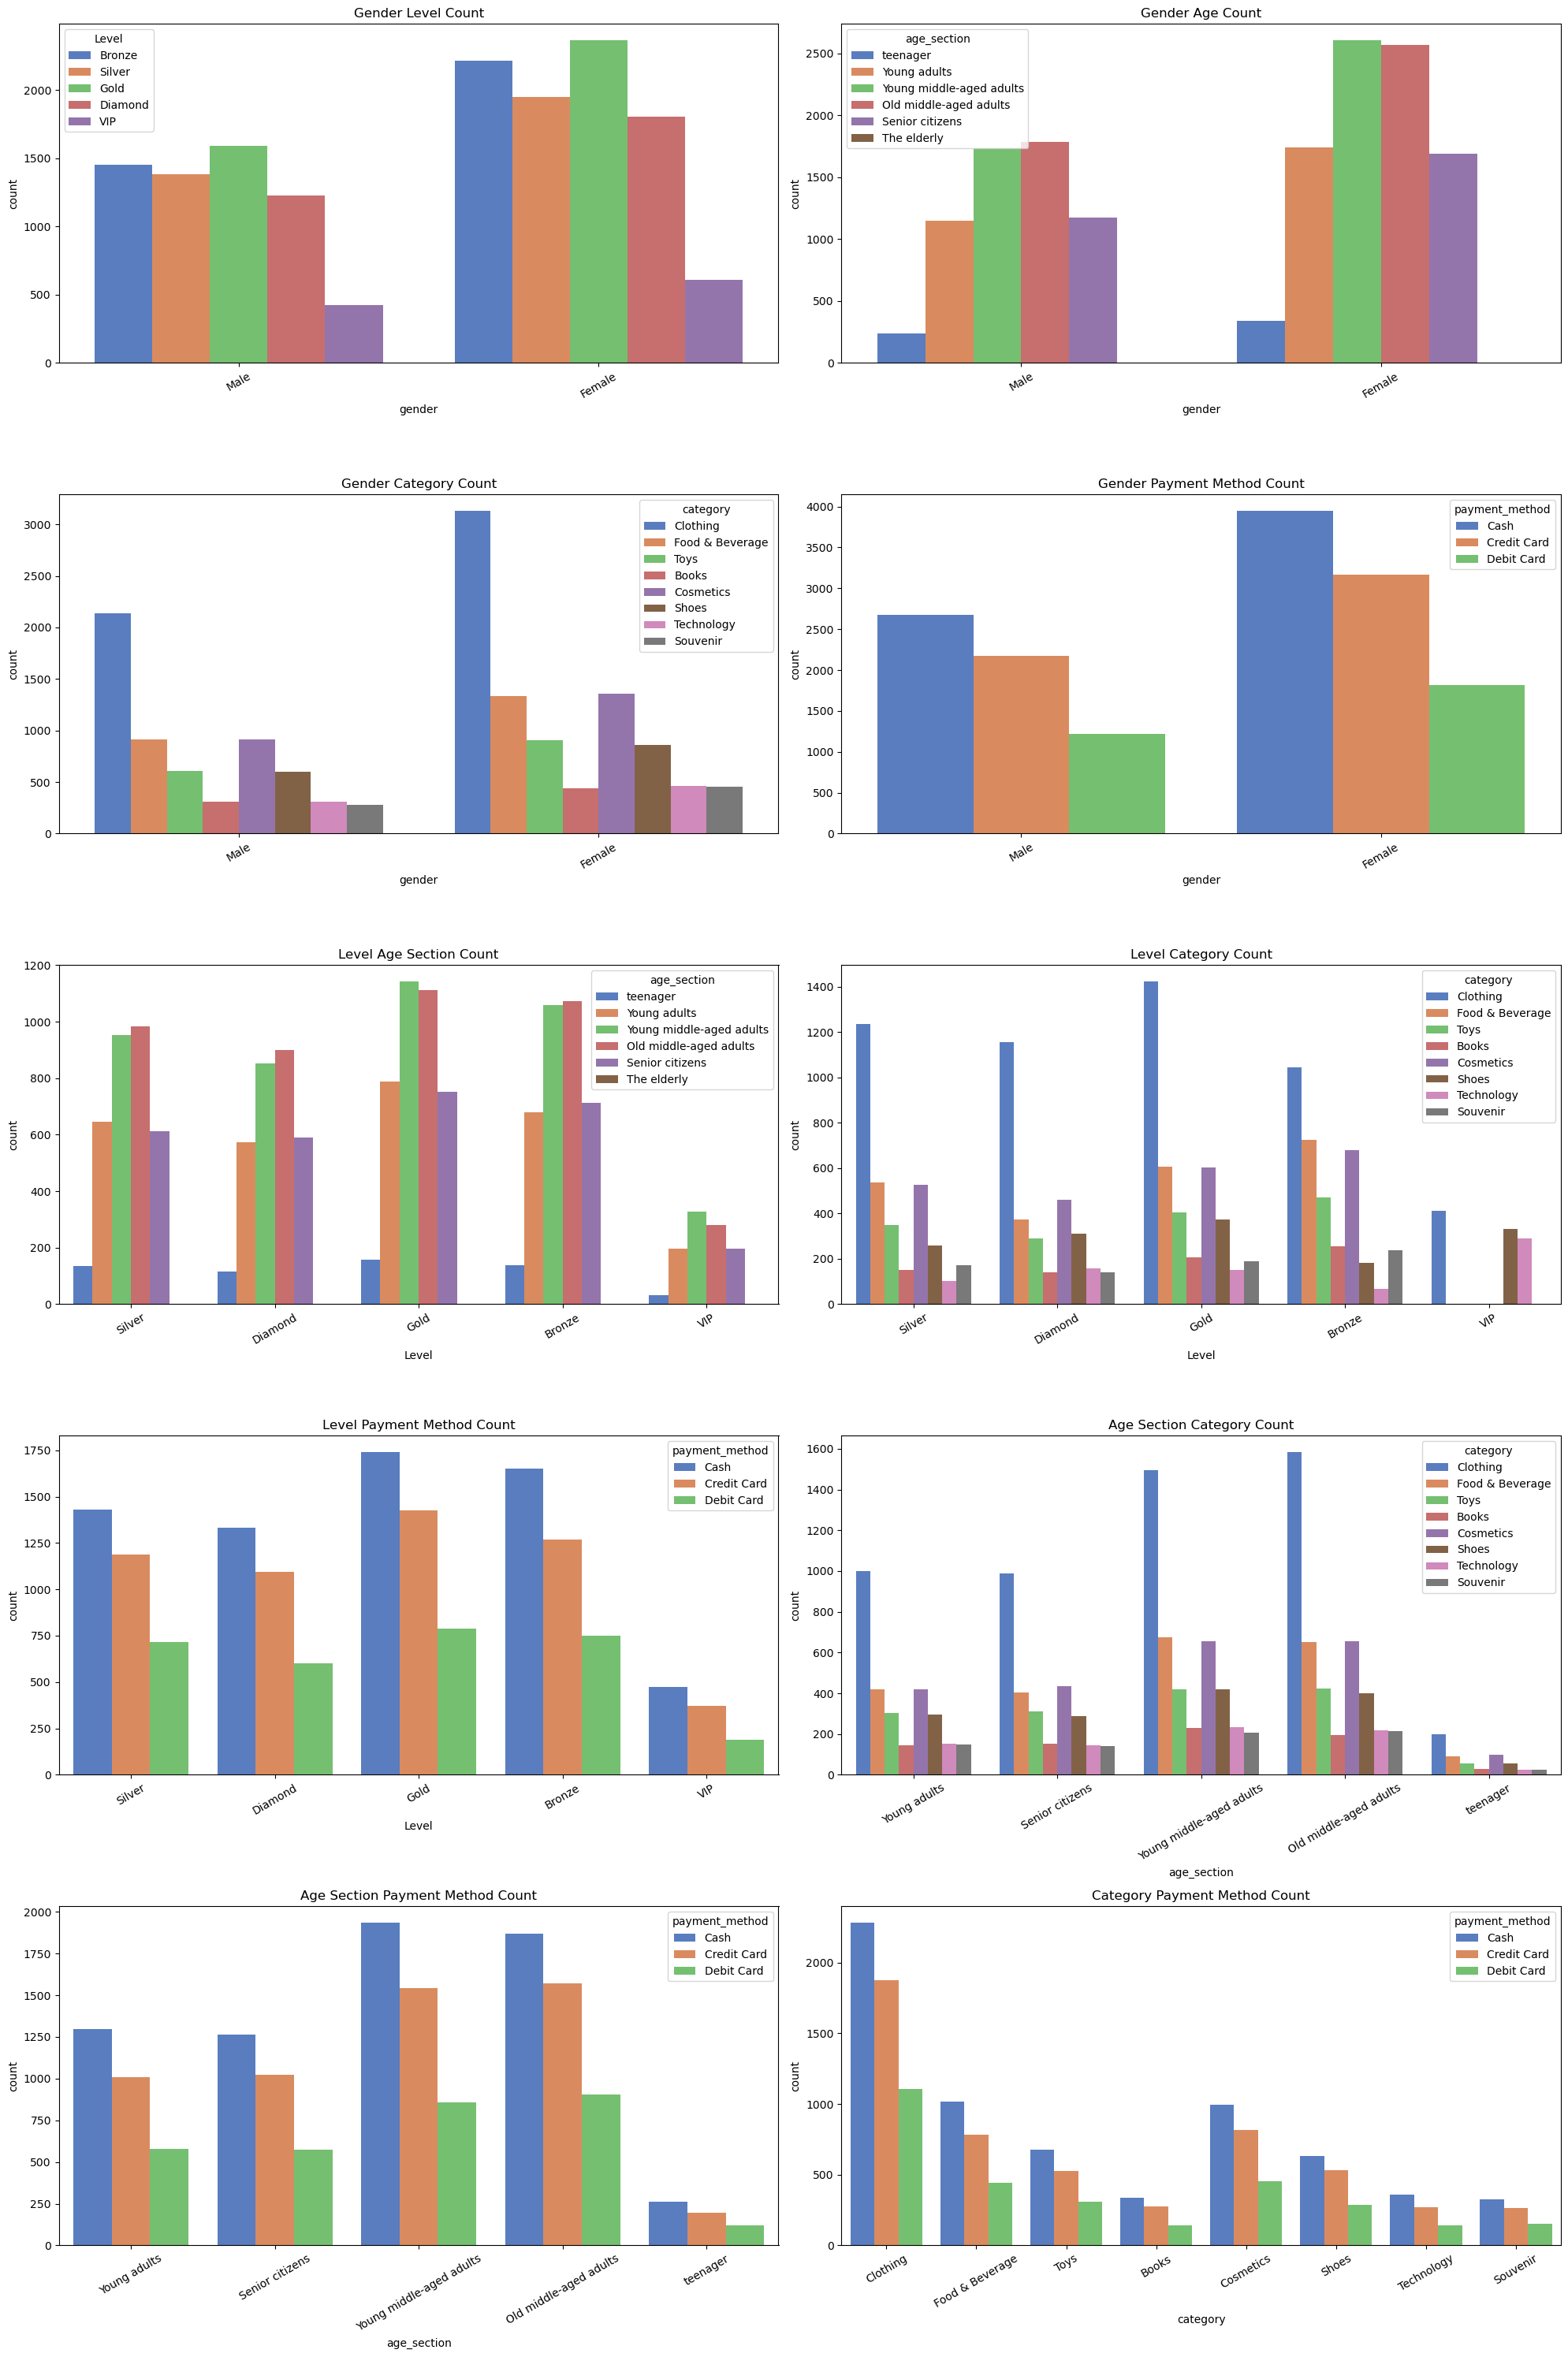

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# subplot 그리드 생성
fig, axes = plt.subplots(5, 2, figsize=(20,30))

# 각 subplot에 countplot 그리기
sns.countplot(x='gender', data=cs_rfm_df_ME, hue='Level', hue_order=order, palette='muted', ax=axes[0, 0])
axes[0, 0].set_title('Gender Level Count')
axes[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_ME, hue='age_section', hue_order=age_order, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title('Gender Age Count')
axes[0, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_ME, hue='category',  palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Gender Category Count')
axes[1, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_ME, hue='payment_method', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Gender Payment Method Count')
axes[1, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_ME, hue='age_section', hue_order=age_order, palette='muted', ax=axes[2, 0])
axes[2, 0].set_title('Level Age Section Count')
axes[2, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_ME, hue='category', palette='muted', ax=axes[2, 1])
axes[2, 1].set_title('Level Category Count')
axes[2, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_ME, hue='payment_method', palette='muted', ax=axes[3, 0])
axes[3, 0].set_title('Level Payment Method Count')
axes[3, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_ME, hue='category', palette='muted', ax=axes[3, 1])
axes[3, 1].set_title('Age Section Category Count')
axes[3, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_ME, hue='payment_method', palette='muted', ax=axes[4, 0])
axes[4, 0].set_title('Age Section Payment Method Count')
axes[4, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='category', data=cs_rfm_df_ME, hue='payment_method', palette='muted', ax=axes[4, 1])
axes[4, 1].set_title('Category Payment Method Count')
axes[4, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


마찬가지로 그래프가 동일한 양상임을 확인할 수 있다.

Cevahir AVM의 경우도 확인

In [130]:
cs_df_CA = cs_df[cs_df['shopping_mall'] == 'Cevahir AVM']
cs_df_CA

invoice_no customer_id  gender  age         category  quantity    price  \
13       I179802     C312861    Male   25         Clothing         2   600.16   
19       I992454     C196845    Male   24             Toys         4   143.36   
21       I412481     C125696  Female   27  Food & Beverage         1     5.23   
22       I823067     C322947    Male   52         Clothing         2   600.16   
28       I655874     C447138  Female   65            Shoes         3  1800.51   
...          ...         ...     ...  ...              ...       ...      ...   
99336    I122946     C427522  Female   30         Clothing         3   900.24   
99344    I652666     C302240    Male   19         Clothing         4  1200.32   
99361    I253408     C450444  Female   62        Cosmetics         1    40.66   
99416    I143010     C922388    Male   55  Food & Beverage         5    26.15   
99436    I579905     C265057  Female   57         Clothing         5  1500.40   

      payment_method invoice_date shopping_mall  
13              Cash   2022-11-17   Cevahir AVM  
19              Cash   2023-03-07   Cevahir AVM  
21              Cash   2021-05-01   Cevahir AVM  
22       Credit Card   2022-06-18   Cevahir AVM  
28              Cash   2022-08-23   Cevahir AVM  
...              ...          ...           ...  
99336    Credit Card   2022-05-05   Cevahir AVM  
99344    Credit Card   2022-12-07   Cevahir AVM  
99361    Credit Card   2022-08-06   Cevahir AVM  
99416           Cash   2021-12-22   Cevahir AVM  
99436           Cash   2022-03-27   Cevahir AVM  

[4991 rows x 10 columns]

In [131]:
cs_df_CA = cs_df_CA.drop(['shopping_mall'], axis=1)

cs_df_CA['invoice_date'].sort_values(ascending=True)
cs_df_CA.loc[:,'Recency'] = pd.to_datetime(cs_df_CA['invoice_date'])\
.apply(lambda x: (pd.to_datetime('2023-03-08') - x).days)
cs_df_CA


invoice_no customer_id  gender  age         category  quantity    price  \
13       I179802     C312861    Male   25         Clothing         2   600.16   
19       I992454     C196845    Male   24             Toys         4   143.36   
21       I412481     C125696  Female   27  Food & Beverage         1     5.23   
22       I823067     C322947    Male   52         Clothing         2   600.16   
28       I655874     C447138  Female   65            Shoes         3  1800.51   
...          ...         ...     ...  ...              ...       ...      ...   
99336    I122946     C427522  Female   30         Clothing         3   900.24   
99344    I652666     C302240    Male   19         Clothing         4  1200.32   
99361    I253408     C450444  Female   62        Cosmetics         1    40.66   
99416    I143010     C922388    Male   55  Food & Beverage         5    26.15   
99436    I579905     C265057  Female   57         Clothing         5  1500.40   

      payment_method invoice_date  Recency  
13              Cash   2022-11-17      111  
19              Cash   2023-03-07        1  
21              Cash   2021-05-01      676  
22       Credit Card   2022-06-18      263  
28              Cash   2022-08-23      197  
...              ...          ...      ...  
99336    Credit Card   2022-05-05      307  
99344    Credit Card   2022-12-07       91  
99361    Credit Card   2022-08-06      214  
99416           Cash   2021-12-22      441  
99436           Cash   2022-03-27      346  

[4991 rows x 10 columns]

In [132]:
cs_df_CA = cs_df_CA.drop(['invoice_date'], axis=1)
rf_df_CA = cs_df_CA.groupby('customer_id').agg(Recency=('Recency', 'min'), Frequency=('customer_id', 'count'))
m_df_CA = cs_df.copy()
m_df_CA.loc[:,'Monetary'] = m_df_CA['price'] * m_df_CA['quantity']
m_df_CA = m_df_CA.groupby('customer_id')[['Monetary']].sum()
rf_df_CA = rf_df_CA.reset_index()
m_df_CA = m_df_CA.reset_index()
rfm_df_CA = rf_df_CA.merge(m_df_CA, on='customer_id')
rfm_df_CA.iloc[rfm_df_CA[rfm_df_CA['Monetary']<0].index] = 0
rfm_df_CA[rfm_df_CA['Monetary']<0]
rfm_df_CA


customer_id  Recency  Frequency  Monetary
0        C100006       97          1    322.56
1        C100045      422          1      5.23
2        C100067      791          1    600.17
3        C100175      514          1   9602.72
4        C100329      167          1     20.92
...          ...      ...        ...       ...
4986     C996863      753          1   1200.32
4987     C998149      411          1    896.00
4988     C998496      369          1   2700.72
4989     C998732      110          1    300.08
4990     C998754      184          1     60.60

[4991 rows x 4 columns]

In [133]:
rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df_MA[['Recency','Frequency','Monetary']])
rfm_df_CA[['Recency','Frequency','Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'])
rfm_df_CA['Recency'] = 1 - rfm_df_CA['Recency']
rfm_df_CA.loc[:,'TotalScore'] = rfm_df_CA['Recency'] + rfm_df_CA['Frequency'] + rfm_df_CA['Monetary']
rfm_df_CA


customer_id   Recency  Frequency  Monetary  TotalScore
0        C100006  0.121859        0.0  0.002110    0.123969
1        C100045  0.881910        0.0  0.002989    0.884899
2        C100067  0.070352        0.0  0.022669    0.093021
3        C100175  0.015075        0.0  0.045536    0.060612
4        C100329  0.991206        0.0  0.005263    0.996469
...          ...       ...        ...       ...         ...
4986     C996863  0.277638        0.0  0.021650    0.299289
4987     C998149  0.398241        0.0  0.013744    0.411985
4988     C998496  0.741206        0.0  0.004783    0.745989
4989     C998732  0.120603        0.0  0.102706    0.223309
4990     C998754  0.717337        0.0  0.001594    0.718931

[4991 rows x 5 columns]

In [134]:
cs_rfm_df_CA = cs_df_CA.merge(rfm_df_CA[['customer_id','TotalScore']], on='customer_id')
cs_rfm_df_CA

invoice_no customer_id  gender  age         category  quantity    price  \
0       I179802     C312861    Male   25         Clothing         2   600.16   
1       I992454     C196845    Male   24             Toys         4   143.36   
2       I412481     C125696  Female   27  Food & Beverage         1     5.23   
3       I823067     C322947    Male   52         Clothing         2   600.16   
4       I655874     C447138  Female   65            Shoes         3  1800.51   
...         ...         ...     ...  ...              ...       ...      ...   
4986    I122946     C427522  Female   30         Clothing         3   900.24   
4987    I652666     C302240    Male   19         Clothing         4  1200.32   
4988    I253408     C450444  Female   62        Cosmetics         1    40.66   
4989    I143010     C922388    Male   55  Food & Beverage         5    26.15   
4990    I579905     C265057  Female   57         Clothing         5  1500.40   

     payment_method  Recency  TotalScore  
0              Cash      111    0.514673  
1              Cash        1    1.001184  
2              Cash      676    0.657982  
3       Credit Card      263    0.994301  
4              Cash      197    0.242372  
...             ...      ...         ...  
4986    Credit Card      307    0.543024  
4987    Credit Card       91    0.749029  
4988    Credit Card      214    0.048663  
4989           Cash      441    0.816583  
4990           Cash      346    0.141180  

[4991 rows x 10 columns]

In [135]:
cs_rfm_df_CA.describe().T


count        mean         std        min        25%         50%  \
age         4991.0   43.172511   14.911633  18.000000   30.00000   43.000000   
quantity    4991.0    2.995191    1.418168   1.000000    2.00000    3.000000   
price       4991.0  687.972719  952.002169   5.230000   40.66000  203.300000   
Recency     4991.0  405.023843  228.836838   0.000000  210.00000  409.000000   
TotalScore  4991.0    0.596257    0.326715   0.000378    0.33506    0.591466   

                    75%          max  
age           56.000000    69.000000  
quantity       4.000000     5.000000  
price       1200.320000  5250.000000  
Recency      604.000000   796.000000  
TotalScore     0.839906     1.984925

In [136]:
l1, l2, l3, l4 = np.percentile(cs_rfm_df_MI['TotalScore'], [24, 47, 70, 93])
print(l1,l2,l3,l4)


0.3244437502793929 0.5677492421878519 0.797471525712336 1.05122363351444


In [137]:
cs_rfm_df_CA['Level'] = cs_rfm_df_CA['TotalScore'].apply(get_level)
cs_rfm_df_CA['Level'] = cs_rfm_df_CA['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
cs_rfm_df_CA

invoice_no customer_id  gender  age         category  quantity    price  \
0       I179802     C312861    Male   25         Clothing         2   600.16   
1       I992454     C196845    Male   24             Toys         4   143.36   
2       I412481     C125696  Female   27  Food & Beverage         1     5.23   
3       I823067     C322947    Male   52         Clothing         2   600.16   
4       I655874     C447138  Female   65            Shoes         3  1800.51   
...         ...         ...     ...  ...              ...       ...      ...   
4986    I122946     C427522  Female   30         Clothing         3   900.24   
4987    I652666     C302240    Male   19         Clothing         4  1200.32   
4988    I253408     C450444  Female   62        Cosmetics         1    40.66   
4989    I143010     C922388    Male   55  Food & Beverage         5    26.15   
4990    I579905     C265057  Female   57         Clothing         5  1500.40   

     payment_method  Recency  TotalScore    Level  
0              Cash      111    0.514673   Silver  
1              Cash        1    1.001184  Diamond  
2              Cash      676    0.657982     Gold  
3       Credit Card      263    0.994301  Diamond  
4              Cash      197    0.242372   Bronze  
...             ...      ...         ...      ...  
4986    Credit Card      307    0.543024   Silver  
4987    Credit Card       91    0.749029     Gold  
4988    Credit Card      214    0.048663   Bronze  
4989           Cash      441    0.816583  Diamond  
4990           Cash      346    0.141180   Bronze  

[4991 rows x 11 columns]

In [138]:
cs_rfm_df_CA.loc[cs_rfm_df_CA['age'] < 20, 'age_section'] = 'teenager'
cs_rfm_df_CA.loc[ (20<=cs_rfm_df_CA['age']) & (cs_rfm_df_CA['age'] < 30), 'age_section'] = 'Young adults'
cs_rfm_df_CA.loc[ (30<=cs_rfm_df_CA['age']) & (cs_rfm_df_CA['age'] < 45), 'age_section'] = 'Young middle-aged adults'
cs_rfm_df_CA.loc[ (45<=cs_rfm_df_CA['age']) & (cs_rfm_df_CA['age'] < 60), 'age_section'] = 'Old middle-aged adults'
cs_rfm_df_CA.loc[ (60<=cs_rfm_df_CA['age']) & (cs_rfm_df_CA['age'] < 70), 'age_section'] = 'Senior citizens'
cs_rfm_df_CA.loc[ (70<=cs_rfm_df_CA['age']) , 'age_section'] = 'The elderly'

cs_rfm_df_CA


invoice_no customer_id  gender  age         category  quantity    price  \
0       I179802     C312861    Male   25         Clothing         2   600.16   
1       I992454     C196845    Male   24             Toys         4   143.36   
2       I412481     C125696  Female   27  Food & Beverage         1     5.23   
3       I823067     C322947    Male   52         Clothing         2   600.16   
4       I655874     C447138  Female   65            Shoes         3  1800.51   
...         ...         ...     ...  ...              ...       ...      ...   
4986    I122946     C427522  Female   30         Clothing         3   900.24   
4987    I652666     C302240    Male   19         Clothing         4  1200.32   
4988    I253408     C450444  Female   62        Cosmetics         1    40.66   
4989    I143010     C922388    Male   55  Food & Beverage         5    26.15   
4990    I579905     C265057  Female   57         Clothing         5  1500.40   

     payment_method  Recency  TotalScore    Level               age_section  
0              Cash      111    0.514673   Silver              Young adults  
1              Cash        1    1.001184  Diamond              Young adults  
2              Cash      676    0.657982     Gold              Young adults  
3       Credit Card      263    0.994301  Diamond    Old middle-aged adults  
4              Cash      197    0.242372   Bronze           Senior citizens  
...             ...      ...         ...      ...                       ...  
4986    Credit Card      307    0.543024   Silver  Young middle-aged adults  
4987    Credit Card       91    0.749029     Gold                  teenager  
4988    Credit Card      214    0.048663   Bronze           Senior citizens  
4989           Cash      441    0.816583  Diamond    Old middle-aged adults  
4990           Cash      346    0.141180   Bronze    Old middle-aged adults  

[4991 rows x 12 columns]

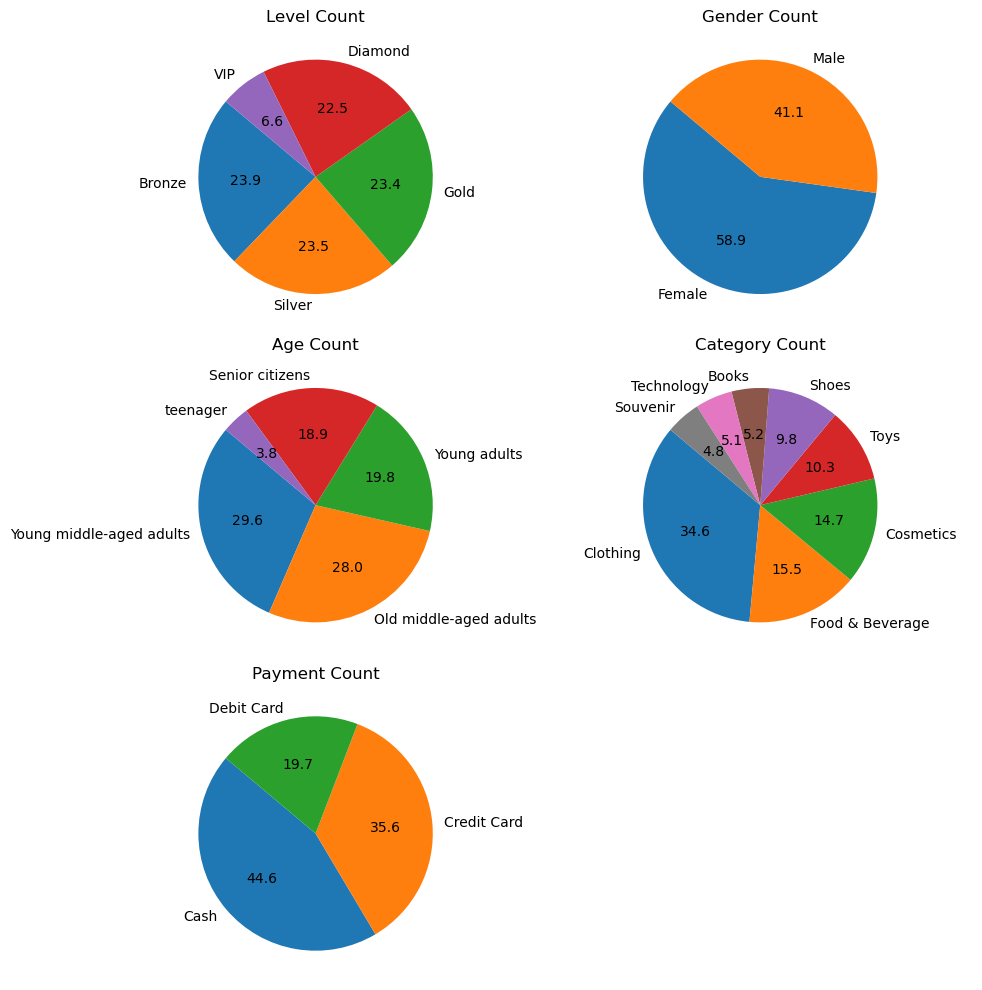

In [139]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

level_counts = cs_rfm_df_CA['Level'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 0].set_title('Level Count')

gender_counts = cs_rfm_df_CA['gender'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values

axes[0, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[0, 1].set_title('Gender Count')

age_counts = cs_rfm_df_CA['age_section'].value_counts()
labels = age_counts.index.tolist()
sizes = age_counts.values

axes[1, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 0].set_title('Age Count')

category_counts = cs_rfm_df_CA['category'].value_counts()
labels = category_counts.index.tolist()
sizes = category_counts.values

axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[1, 1].set_title('Category Count')

payment_counts = cs_rfm_df_CA['payment_method'].value_counts()
labels = payment_counts.index.tolist()
sizes = payment_counts.values

axes[2, 0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)],)
axes[2, 0].set_title('Payment Count')

axes[2,1].axis('off')

plt.tight_layout()
plt.show()


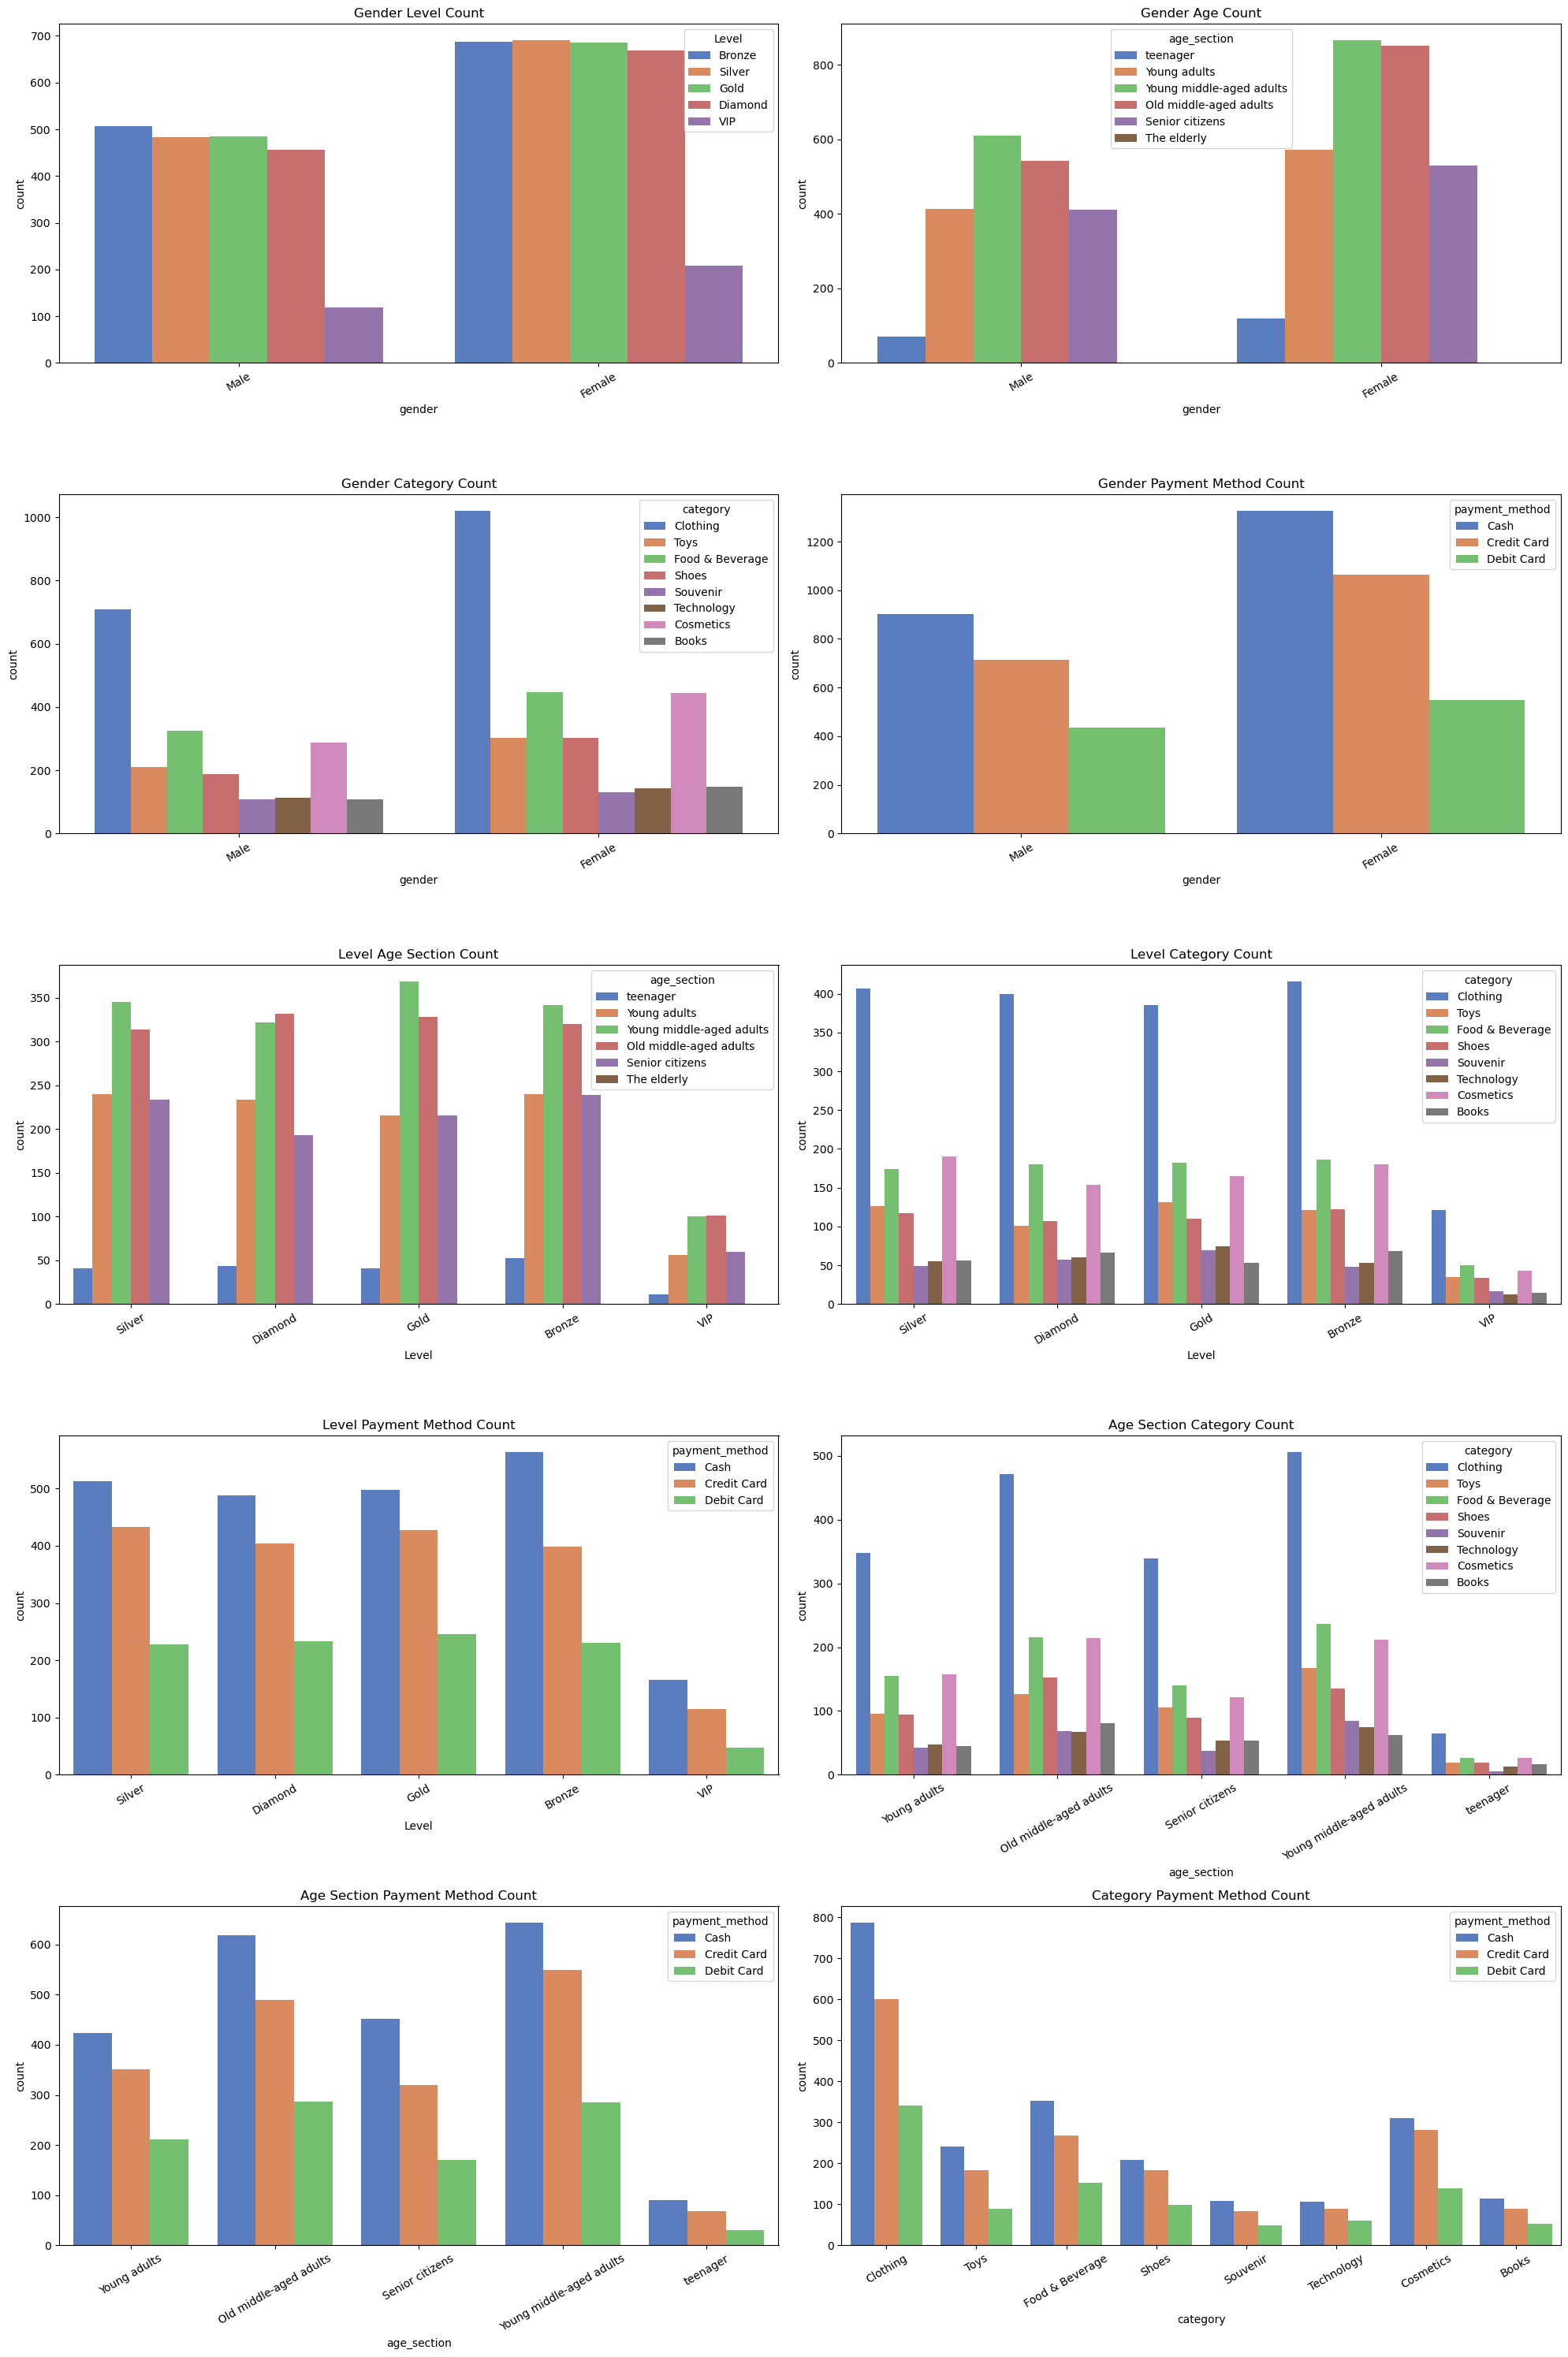

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# subplot 그리드 생성
fig, axes = plt.subplots(5, 2, figsize=(20,30))

# 각 subplot에 countplot 그리기
sns.countplot(x='gender', data=cs_rfm_df_CA, hue='Level', hue_order=order, palette='muted', ax=axes[0, 0])
axes[0, 0].set_title('Gender Level Count')
axes[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_CA, hue='age_section', hue_order=age_order, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title('Gender Age Count')
axes[0, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_CA, hue='category',  palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Gender Category Count')
axes[1, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='gender', data=cs_rfm_df_CA, hue='payment_method', palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Gender Payment Method Count')
axes[1, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_CA, hue='age_section', hue_order=age_order, palette='muted', ax=axes[2, 0])
axes[2, 0].set_title('Level Age Section Count')
axes[2, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_CA, hue='category', palette='muted', ax=axes[2, 1])
axes[2, 1].set_title('Level Category Count')
axes[2, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='Level', data=cs_rfm_df_CA, hue='payment_method', palette='muted', ax=axes[3, 0])
axes[3, 0].set_title('Level Payment Method Count')
axes[3, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_CA, hue='category', palette='muted', ax=axes[3, 1])
axes[3, 1].set_title('Age Section Category Count')
axes[3, 1].tick_params(axis='x', rotation=30)

sns.countplot(x='age_section', data=cs_rfm_df_CA, hue='payment_method', palette='muted', ax=axes[4, 0])
axes[4, 0].set_title('Age Section Payment Method Count')
axes[4, 0].tick_params(axis='x', rotation=30)

sns.countplot(x='category', data=cs_rfm_df_CA, hue='payment_method', palette='muted', ax=axes[4, 1])
axes[4, 1].set_title('Category Payment Method Count')
axes[4, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


10 개의 도시 중, 5개의 도시를 확인 했을 때 같은 양상의 그래프가 동일하게 나온 것을 확인했다.

5개의 도시의 그래프 

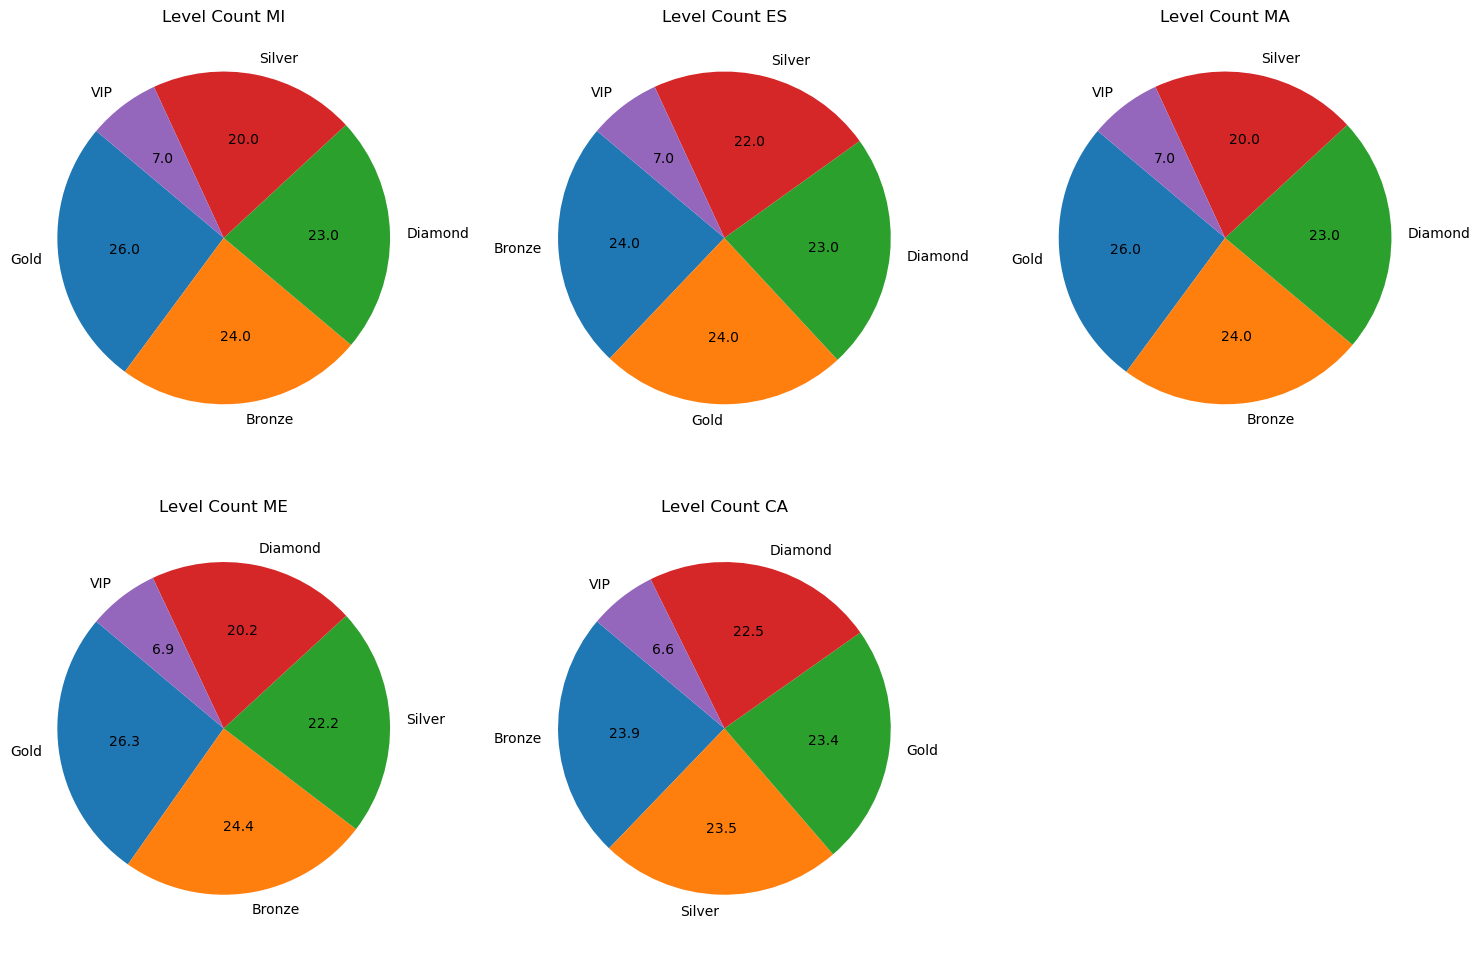

In [142]:
import matplotlib.pyplot as plt

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, df in enumerate(data_frames):
    level_counts = df['Level'].value_counts()
    labels = level_counts.index.tolist()
    sizes = level_counts.values

    row = i // 3
    col = i % 3

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)])
    axes[row, col].set_title(f'Level Count {titles[i]}')

# 마지막 subplot은 비워둠
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


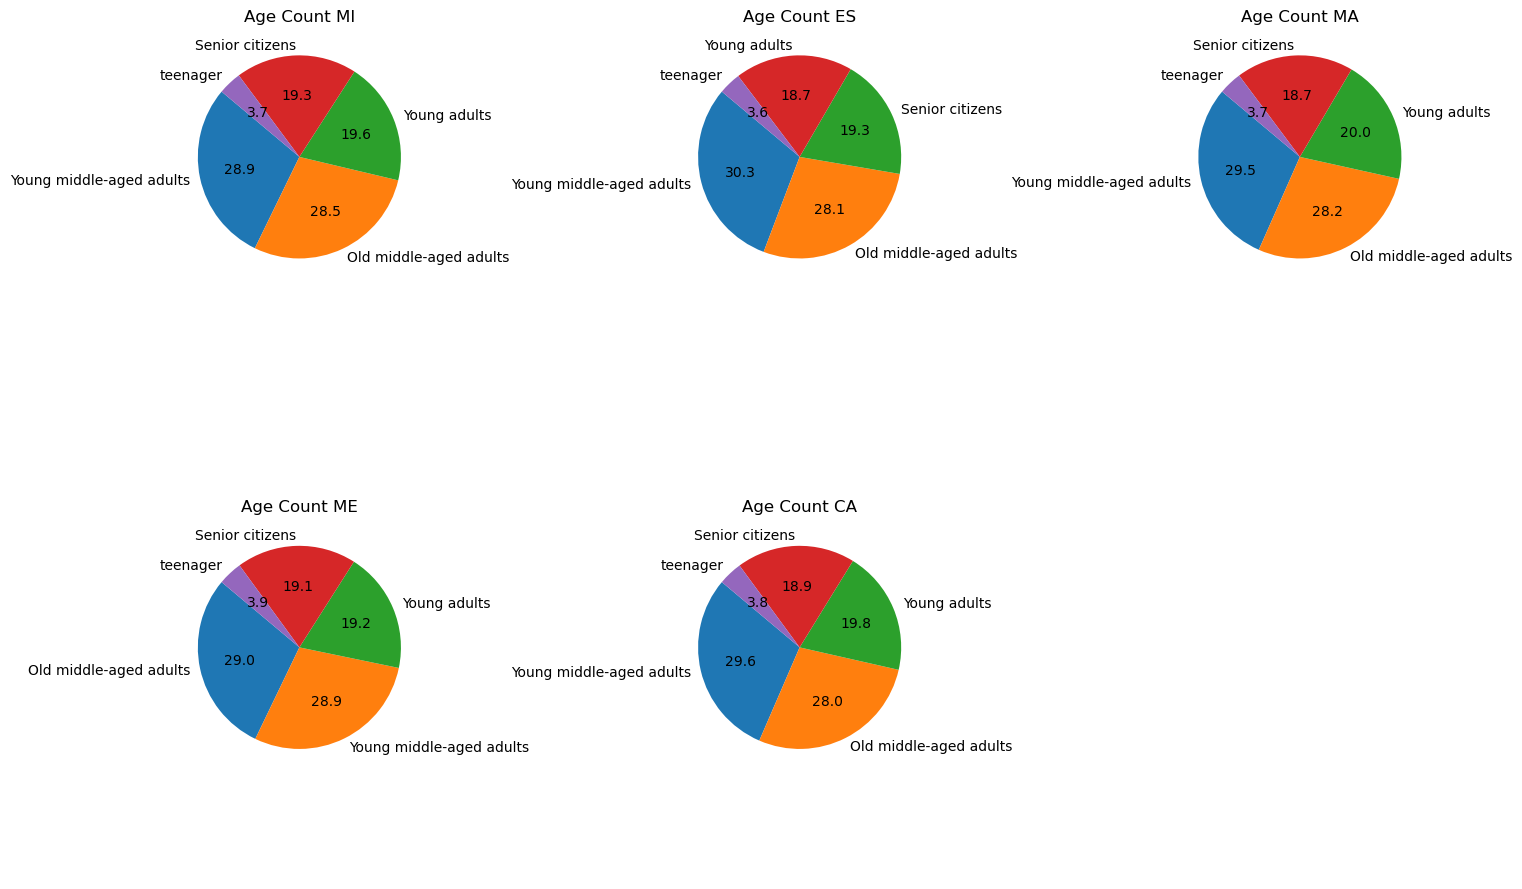

In [143]:
import matplotlib.pyplot as plt

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, df in enumerate(data_frames):
    level_counts = df['age_section'].value_counts()
    labels = level_counts.index.tolist()
    sizes = level_counts.values

    row = i // 3
    col = i % 3

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)])
    axes[row, col].set_title(f'Age Count {titles[i]}')

# 마지막 subplot은 비워둠
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


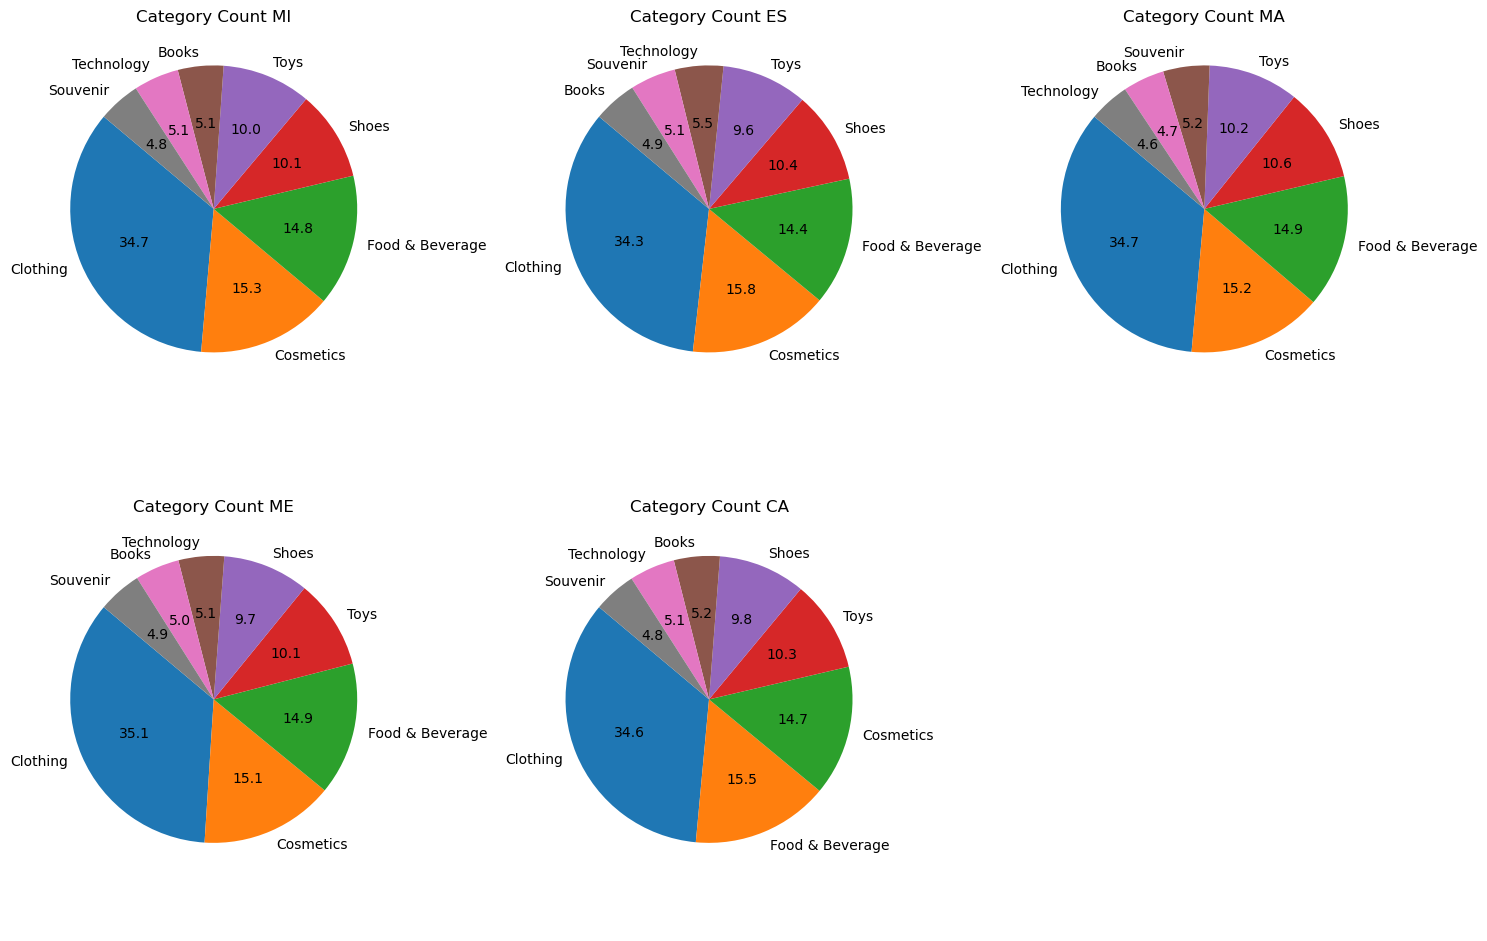

In [145]:
import matplotlib.pyplot as plt

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, df in enumerate(data_frames):
    level_counts = df['category'].value_counts()
    labels = level_counts.index.tolist()
    sizes = level_counts.values

    row = i // 3
    col = i % 3

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)])
    axes[row, col].set_title(f'Category Count {titles[i]}')

# 마지막 subplot은 비워둠
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


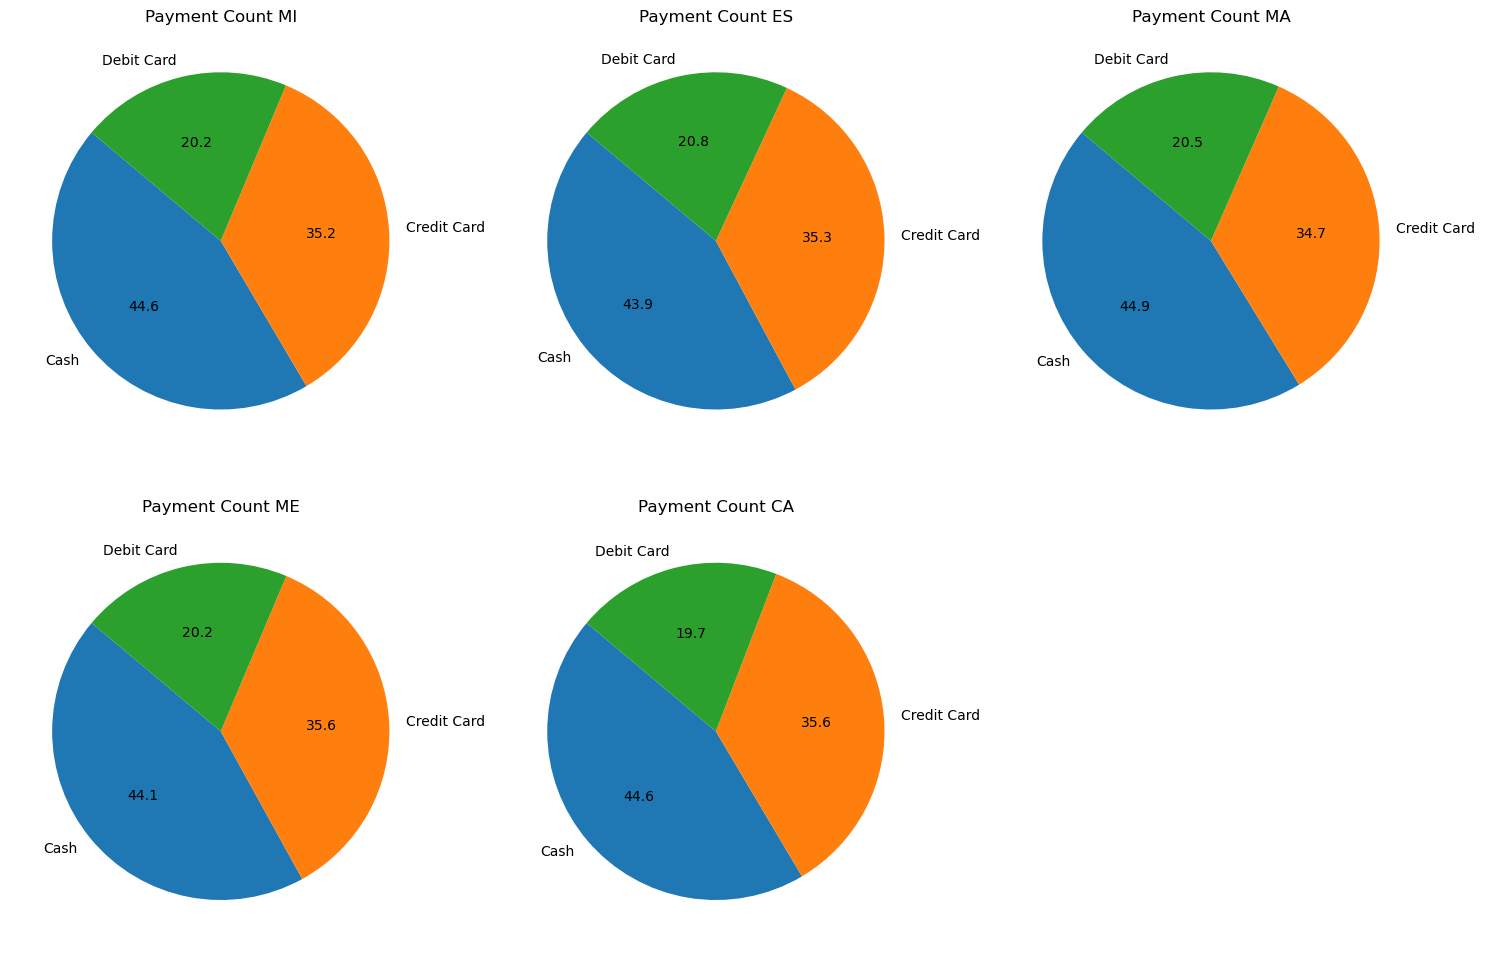

In [146]:
import matplotlib.pyplot as plt

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, df in enumerate(data_frames):
    level_counts = df['payment_method'].value_counts()
    labels = level_counts.index.tolist()
    sizes = level_counts.values

    row = i // 3
    col = i % 3

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)])
    axes[row, col].set_title(f'Payment Count {titles[i]}')

# 마지막 subplot은 비워둠
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


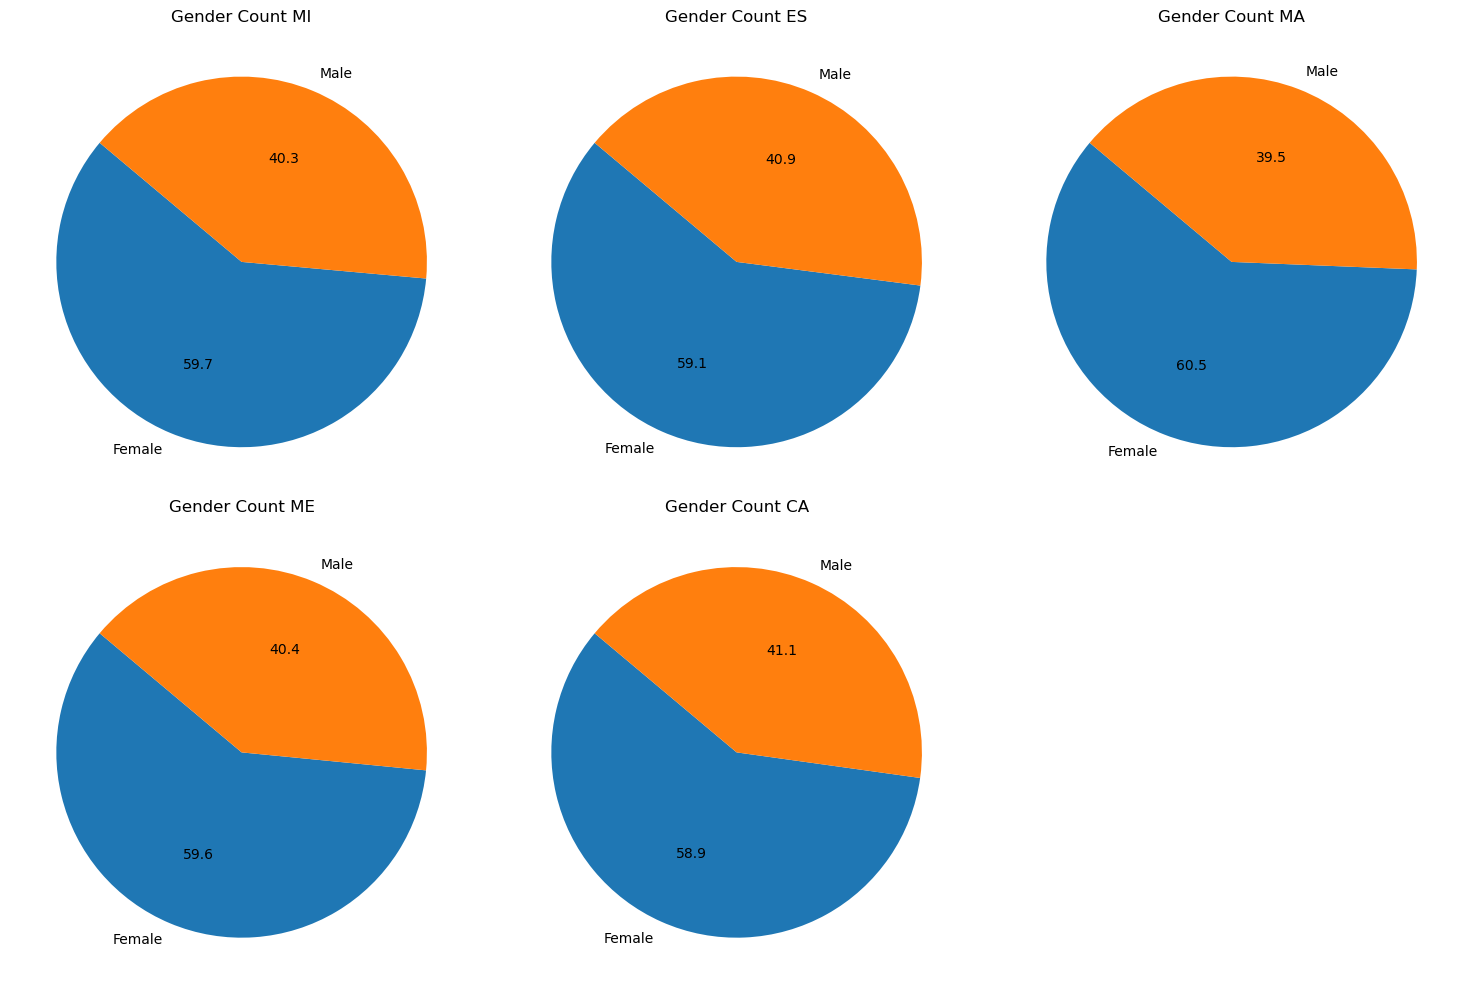

In [147]:
import matplotlib.pyplot as plt

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, df in enumerate(data_frames):
    level_counts = df['gender'].value_counts()
    labels = level_counts.index.tolist()
    sizes = level_counts.values

    row = i // 3
    col = i % 3

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)])
    axes[row, col].set_title(f'Gender Count {titles[i]}')

# 마지막 subplot은 비워둠
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


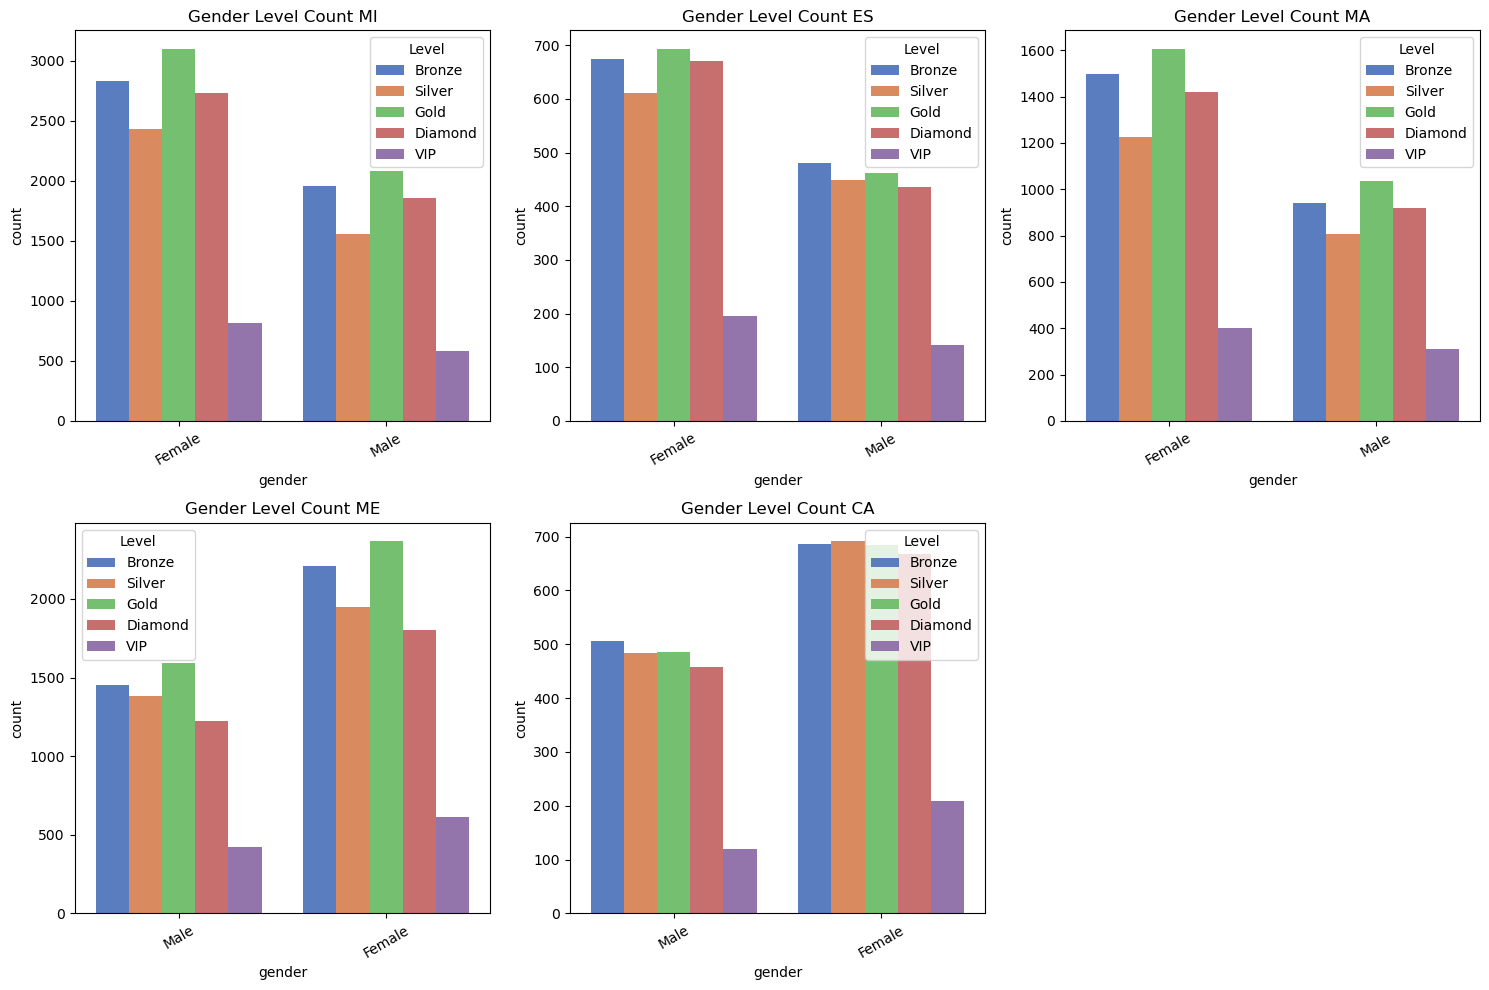

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='gender', data=df, hue='Level', hue_order=order, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Gender Level Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

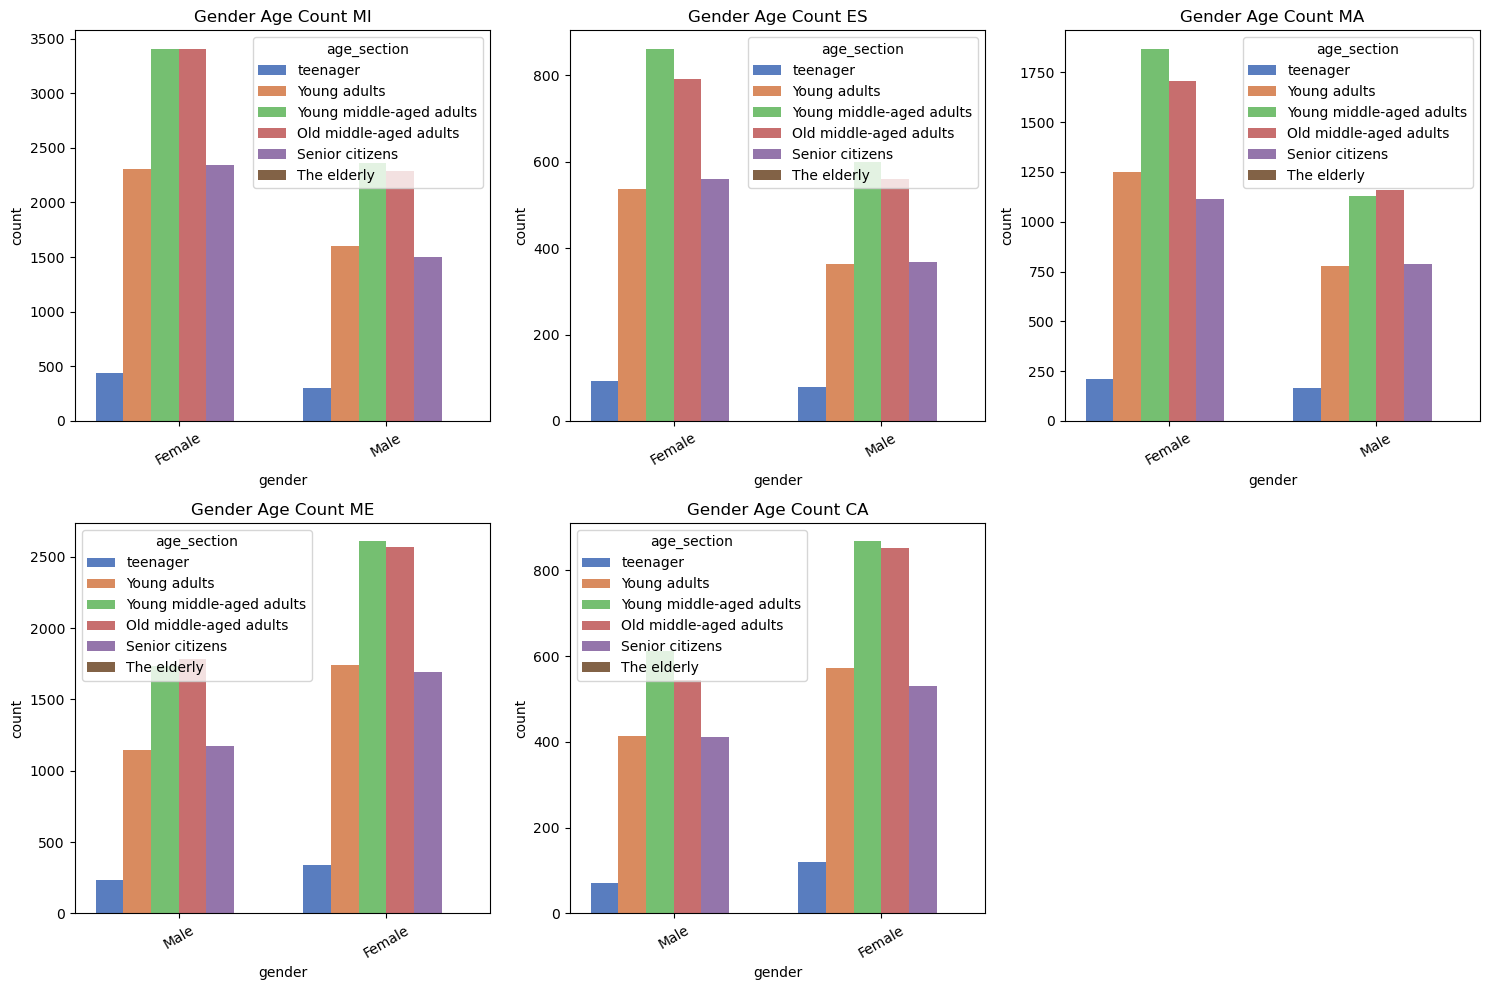

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='gender', data=df, hue='age_section', hue_order=age_order, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Gender Age Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

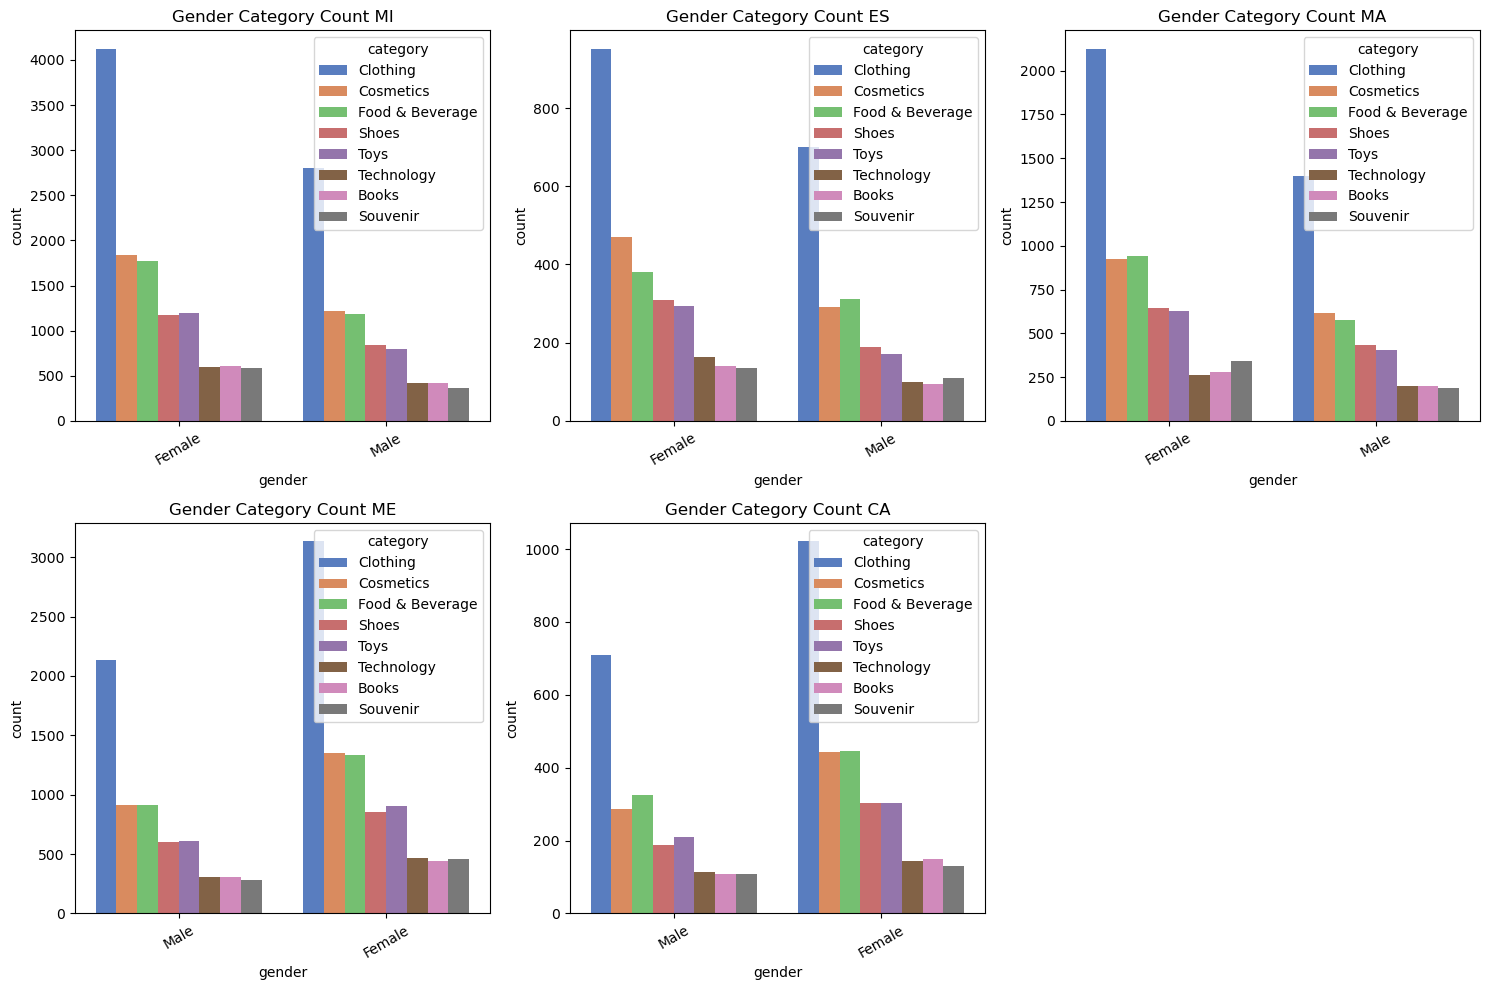

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
category_order = ['Clothing','Cosmetics','Food & Beverage','Shoes','Toys','Technology','Books','Souvenir']

for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='gender', data=df, hue='category', palette='muted', hue_order=category_order, ax=axes[row, col])
    axes[row, col].set_title(f'Gender Category Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

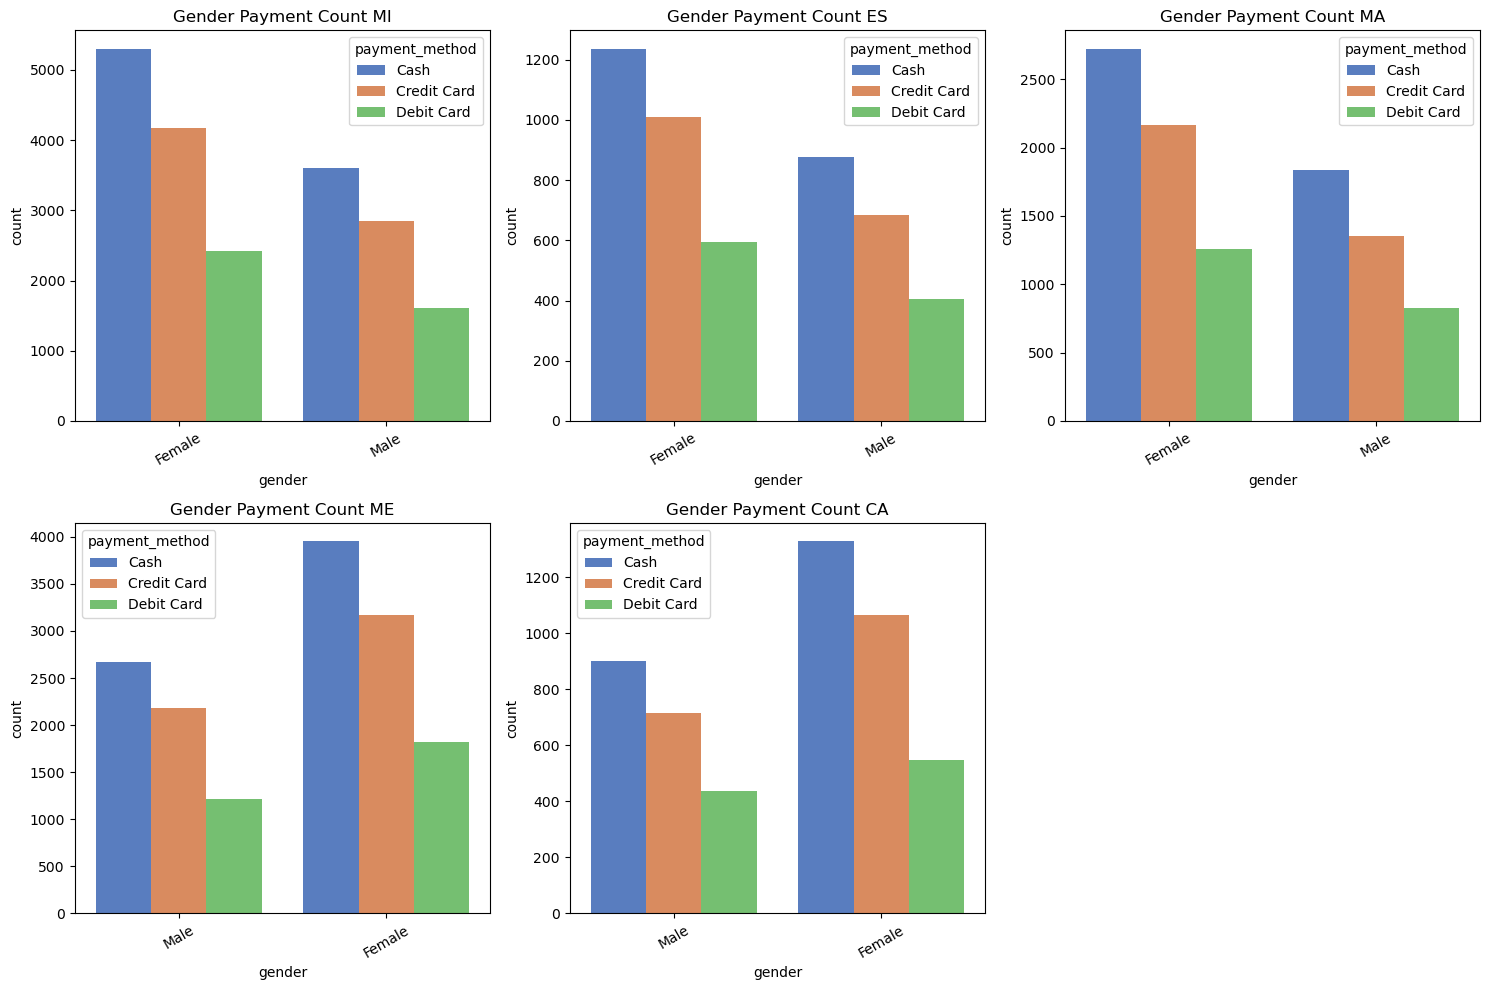

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cash_order = ['Cash','Credit Card','Debit Card']

for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='gender', data=df, hue='payment_method',hue_order=cash_order, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Gender Payment Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

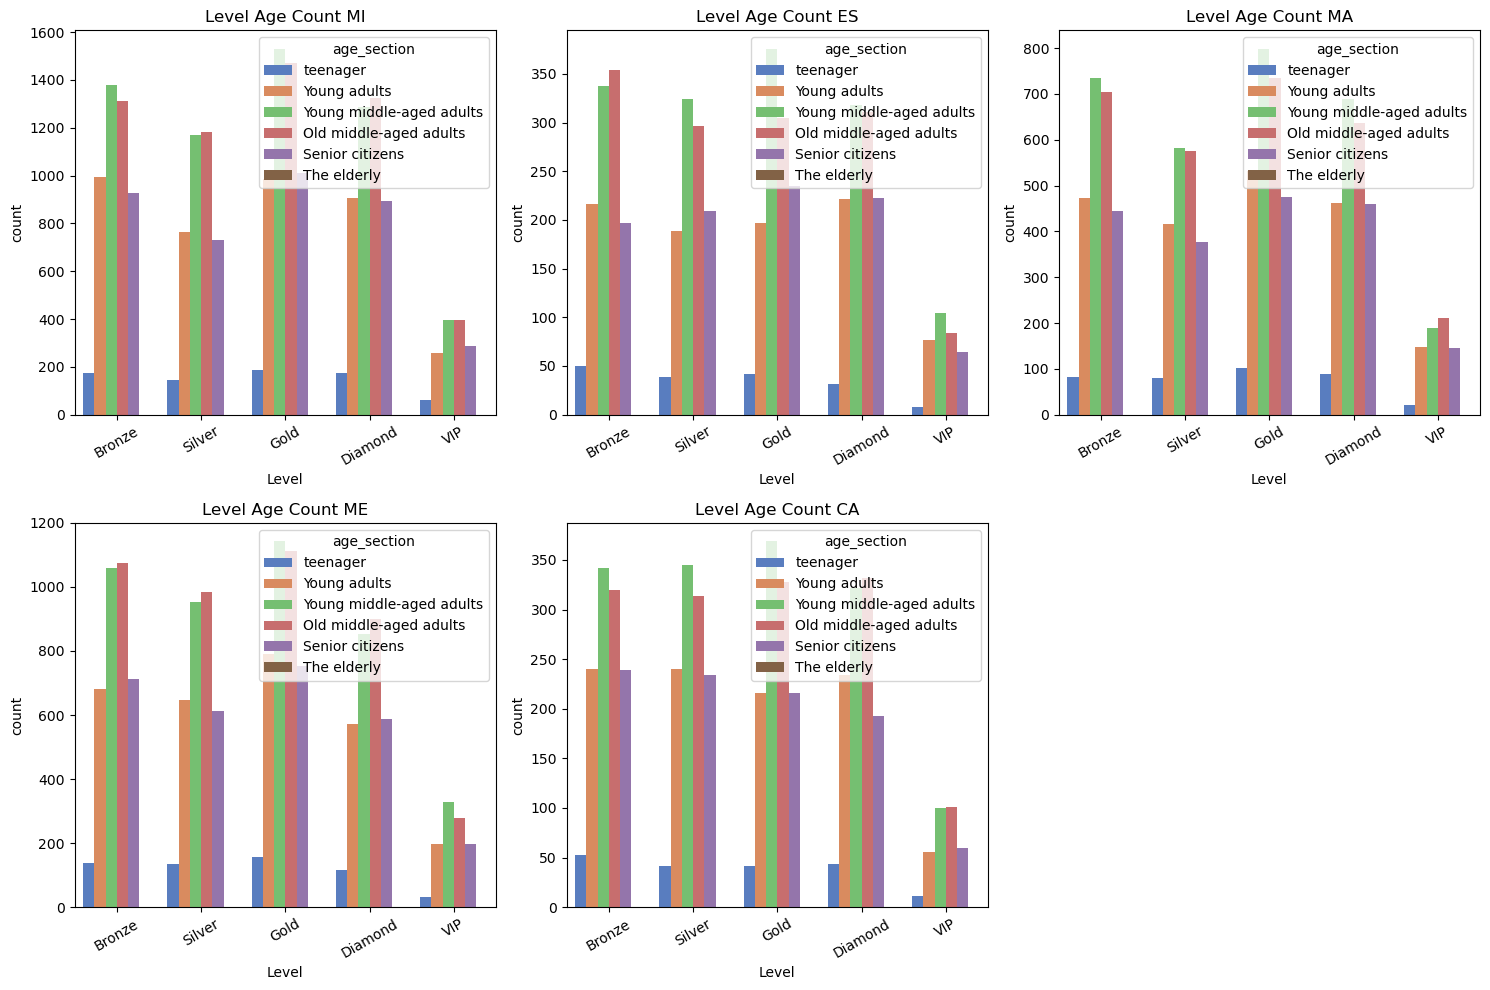

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cash_order = ['Cash','Credit Card','Debit Card']
level_order = ['Bronze','Silver','Gold','Diamond','VIP']
for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='Level', data=df, hue='age_section', order=level_order,palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Level Age Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

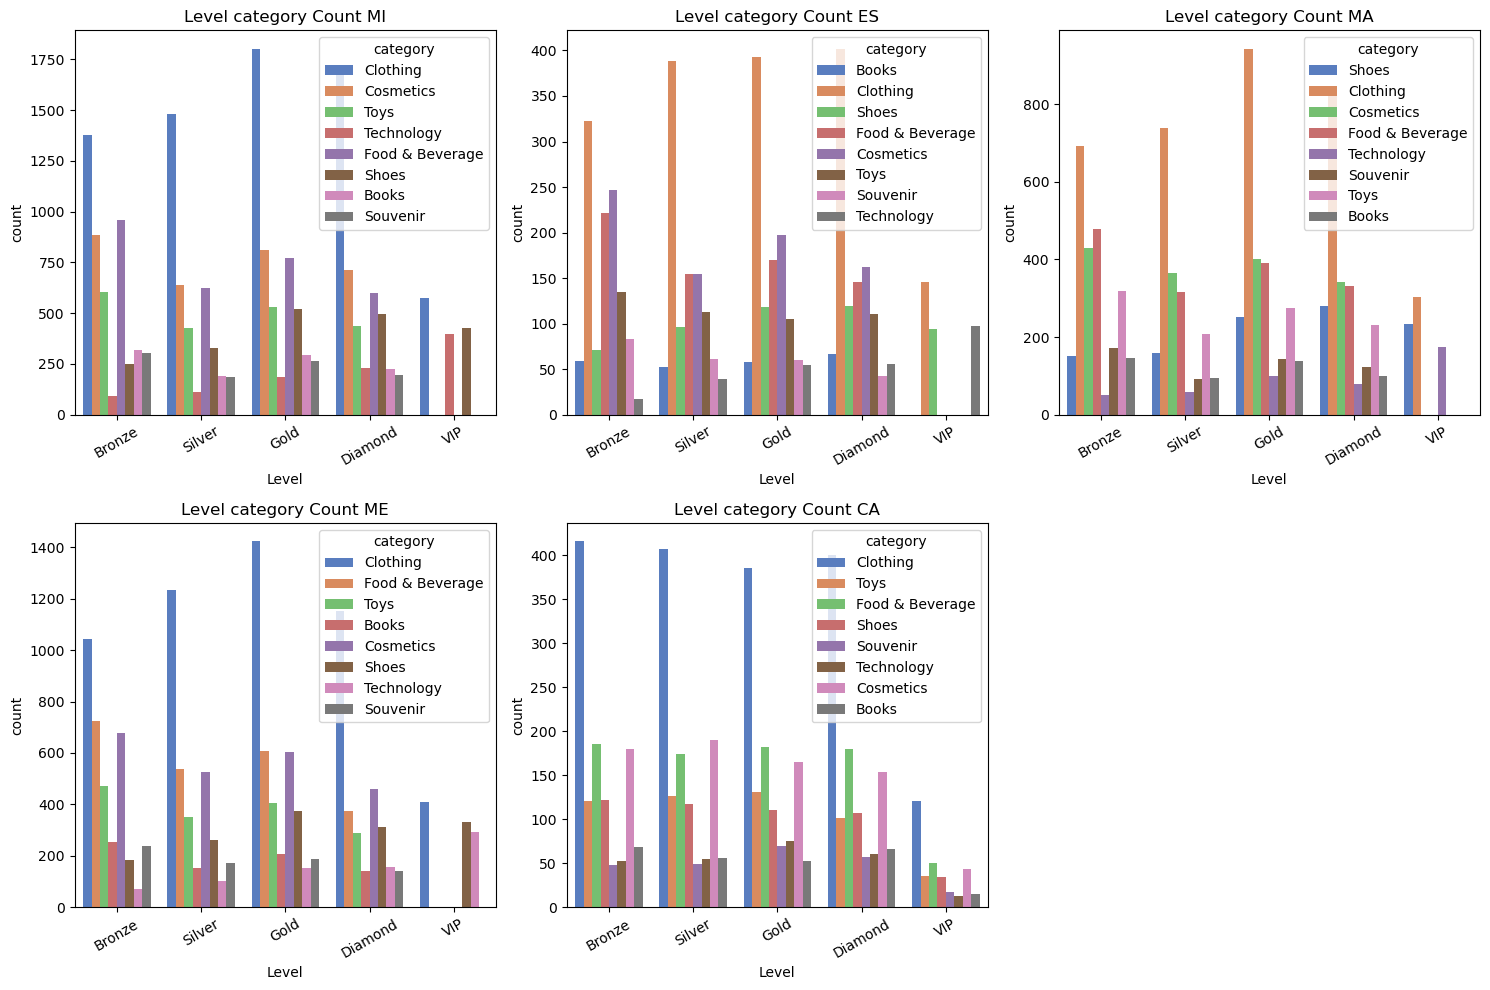

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cash_order = ['Cash','Credit Card','Debit Card']
level_order = ['Bronze','Silver','Gold','Diamond','VIP']
for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='Level', data=df, hue='category', order=level_order,palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Level category Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

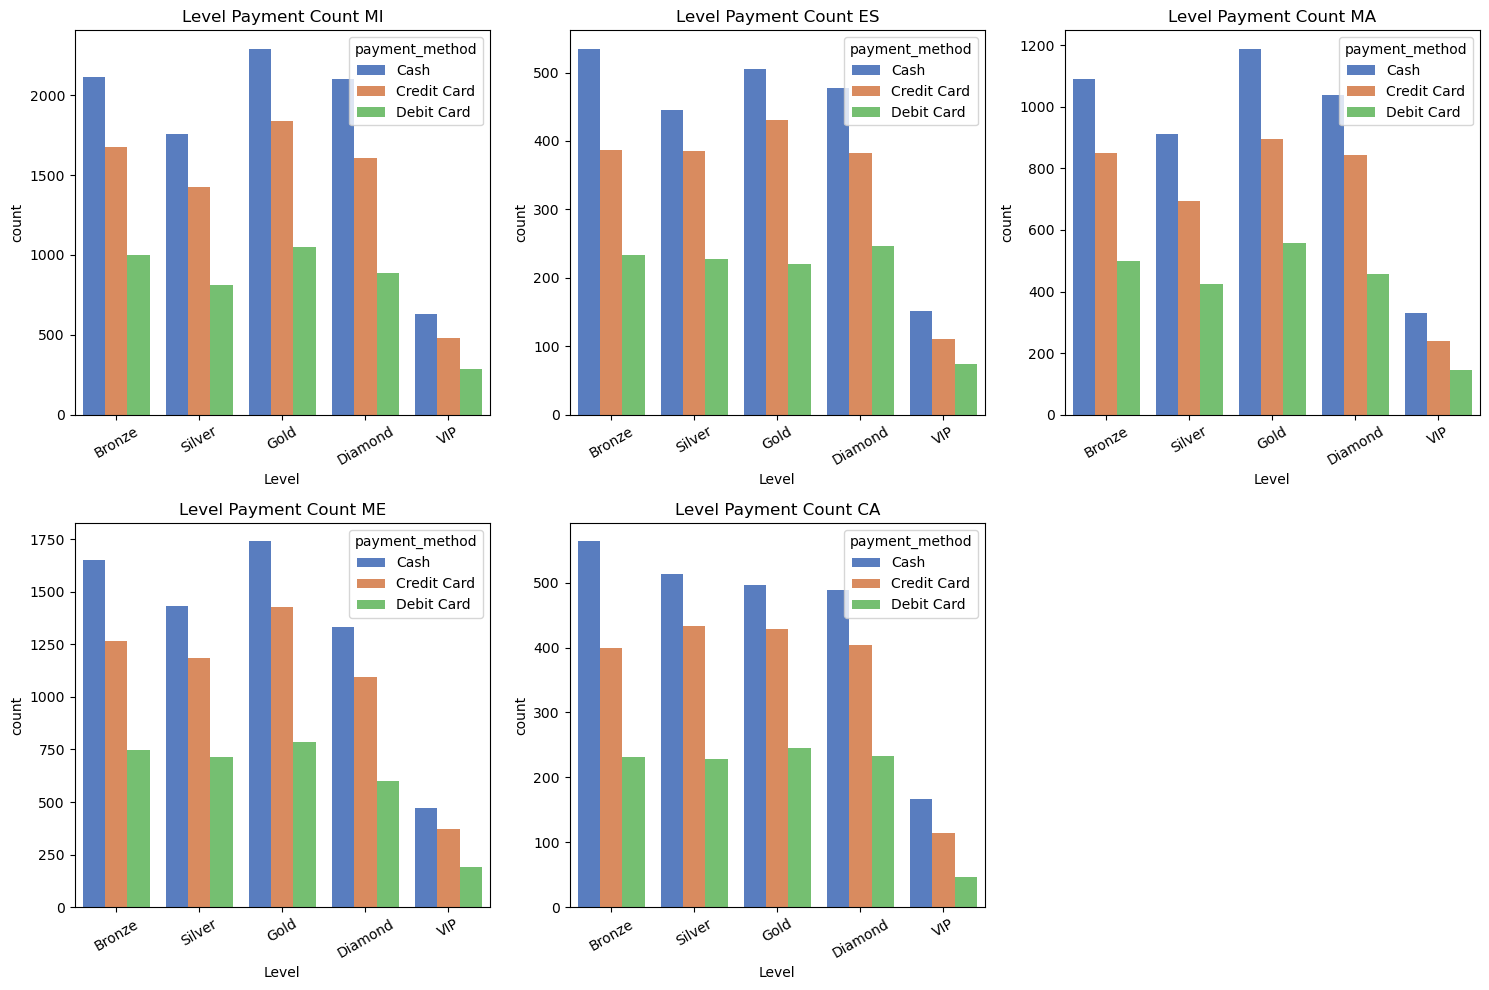

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cash_order = ['Cash','Credit Card','Debit Card']
level_order = ['Bronze','Silver','Gold','Diamond','VIP']
for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='Level', data=df, hue='payment_method', order=level_order, hue_order=cash_order, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Level Payment Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

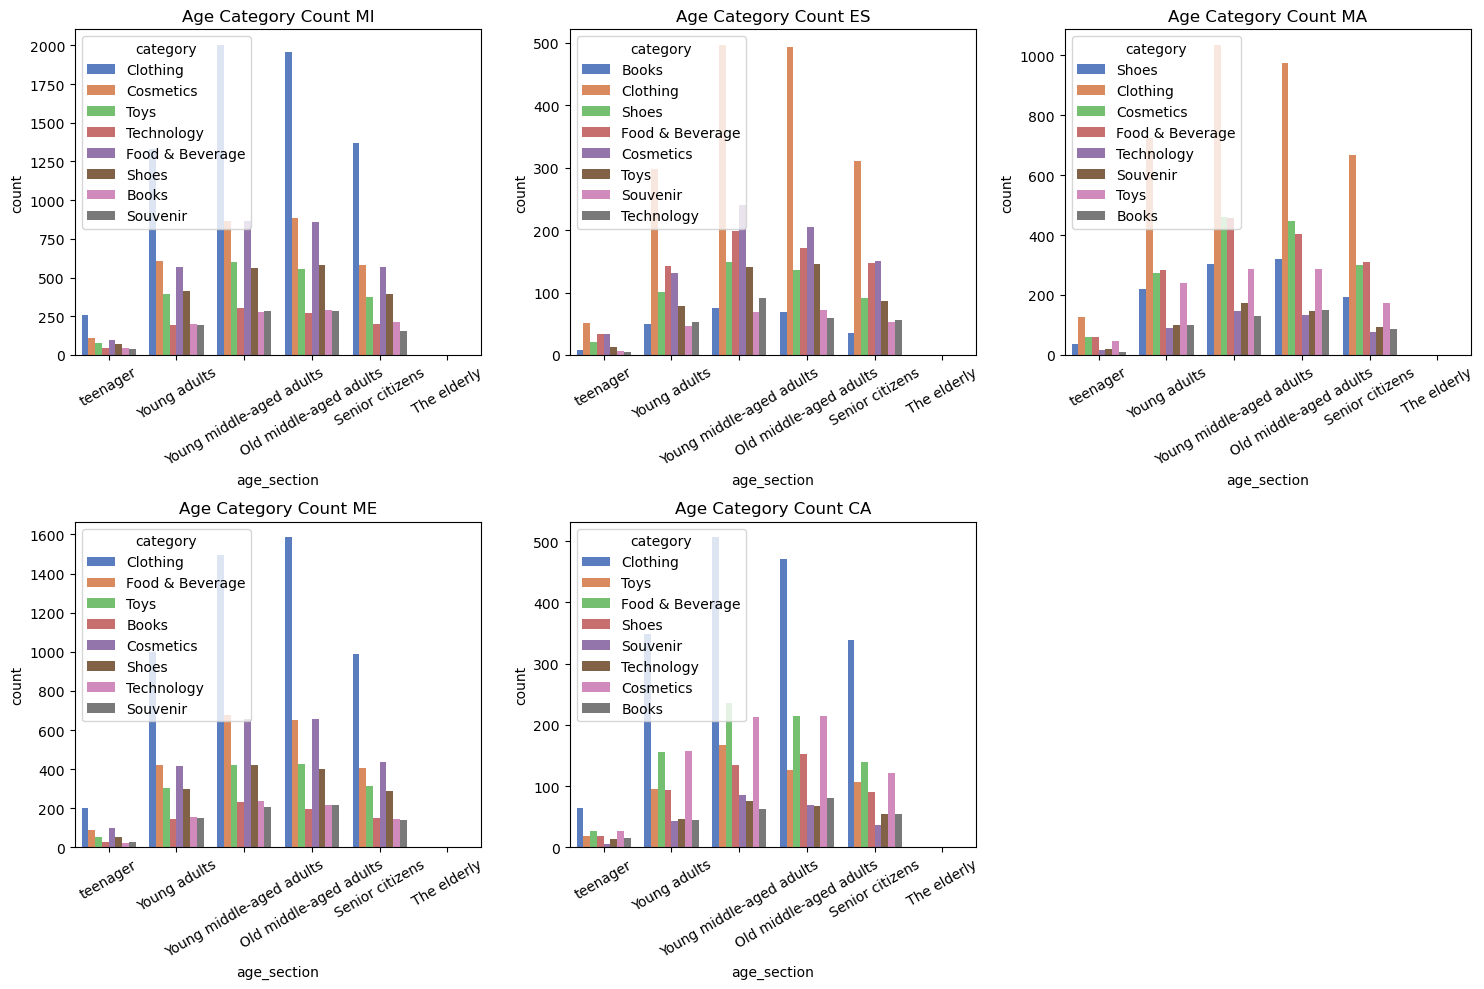

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cash_order = ['Cash','Credit Card','Debit Card']
level_order = ['Bronze','Silver','Gold','Diamond','VIP']
for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='age_section', data=df, hue='category', order=age_order, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Age Category Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

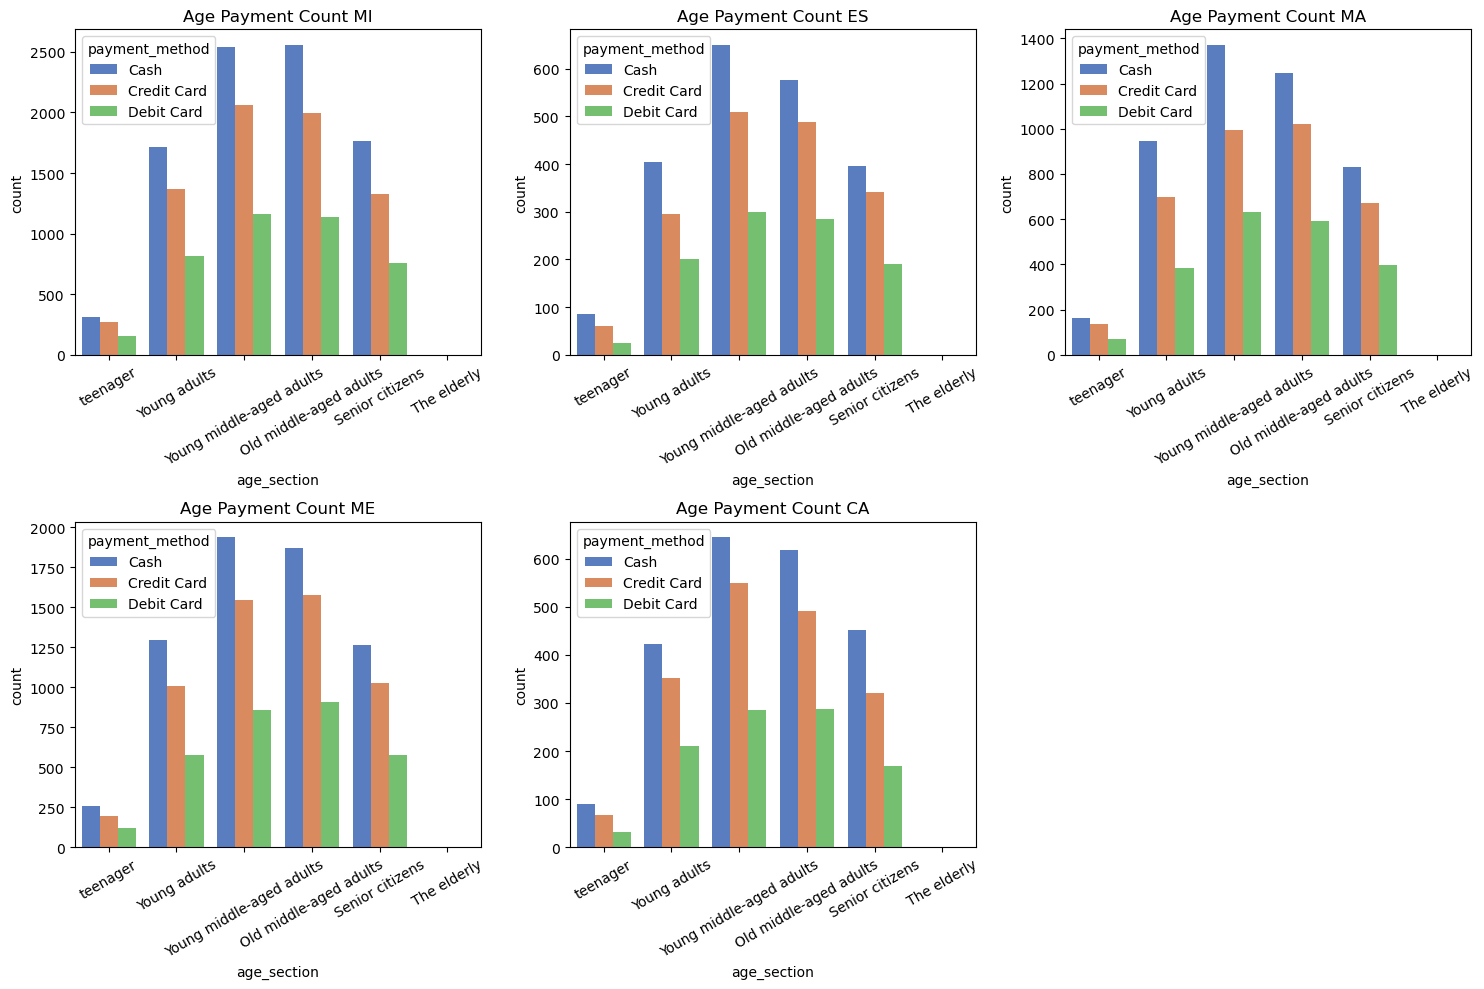

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cash_order = ['Cash','Credit Card','Debit Card']
level_order = ['Bronze','Silver','Gold','Diamond','VIP']
for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='age_section', data=df, hue='payment_method', order=age_order,hue_order=cash_order, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Age Payment Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

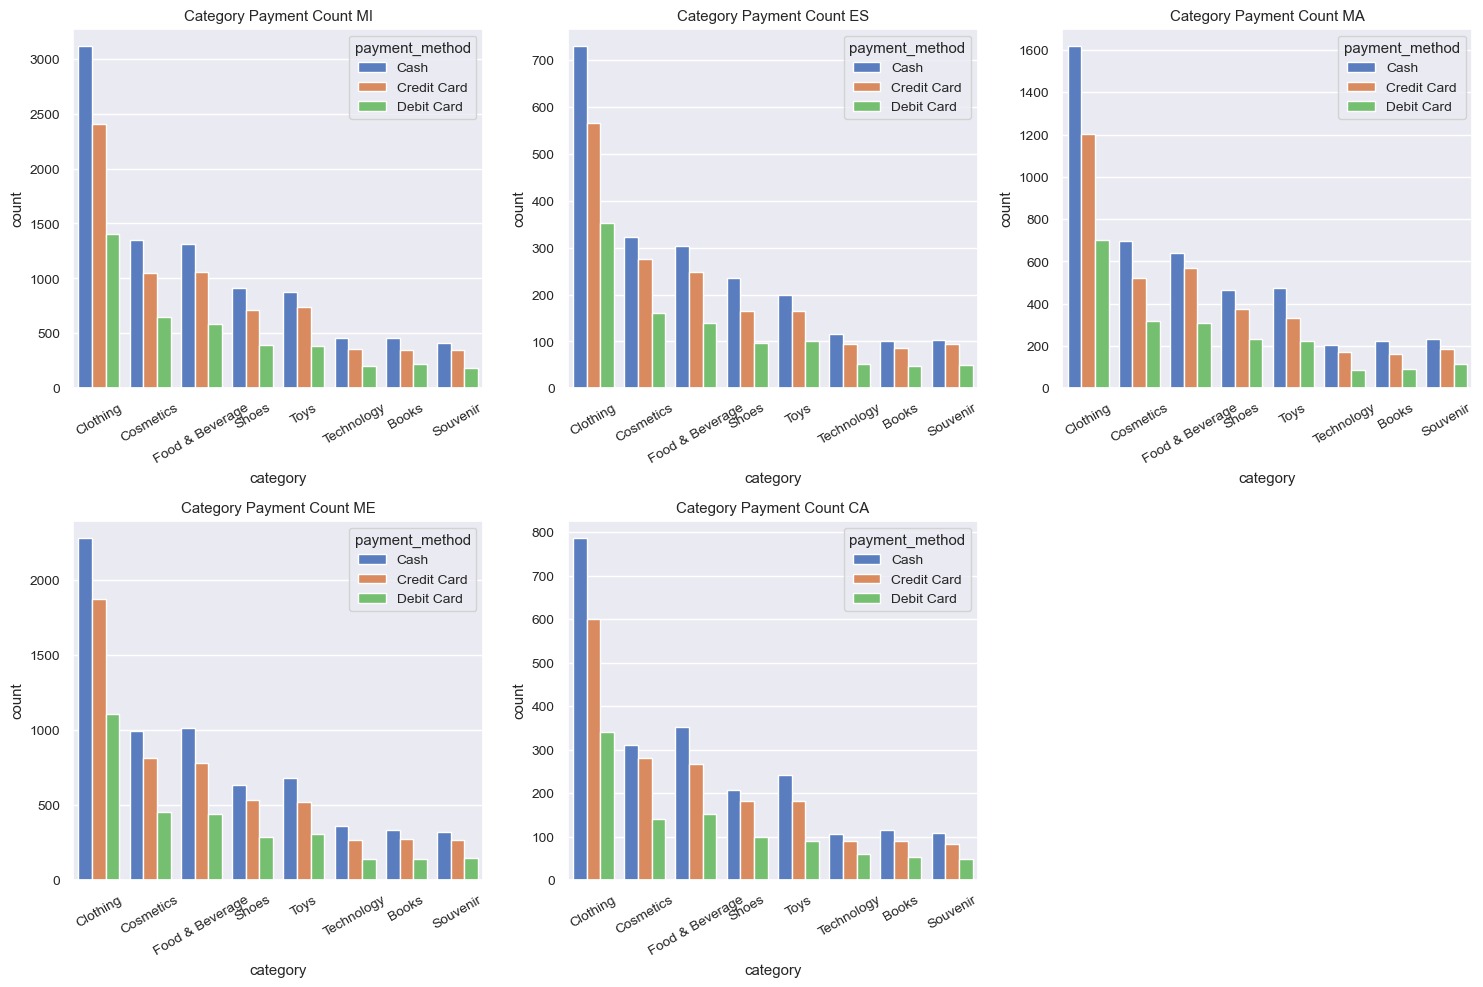

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=0.9)
# 데이터 및 축을 리스트로 저장
data_frames = [cs_rfm_df_MI, cs_rfm_df_ES, cs_rfm_df_MA, cs_rfm_df_ME, cs_rfm_df_CA]
titles = ['MI', 'ES', 'MA', 'ME', 'CA']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cash_order = ['Cash','Credit Card','Debit Card']
level_order = ['Bronze','Silver','Gold','Diamond','VIP']
for i, df in enumerate(data_frames):
    row = i // 3
    col = i % 3

    sns.countplot(x='category', data=df, hue='payment_method', order=category_order, hue_order=cash_order, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Category Payment Count {titles[i]}')
    axes[row, col].tick_params(axis='x', rotation=30)

# 비어있는 subplot 삭제
axes[1, 2].remove()

plt.tight_layout()
plt.show()

### 분석 보고서
🚩무작위 5개의 쇼핑몰 별 분석을 하던 중, 각 그래프의 양상이 동일하게 나타남을 확인했다.
분석한 쇼핑몰은 각각 다음과 같다.

- Mall of Istanbul (MI)
- Emaar Square Mall (ES)
- Metropol AVM (MA)
- Metrocity (ME)
- Cevahir AVM (CA)


🚩Gender, Level, Category, Payment Method, Age Section 별 파이차트 그래프
<img src='./images/26.png' >

- 성별 :
 > 각 쇼핑몰 별, 남자회원의 평균 40.5%, 여성회원의 평균 59.5%로 여성회원이 약 19% 대체적으로 더 많다는 것을 확인할 수 있었다.


<img src='./images/22.png'>

- 회원 등급 :
> 각 쇼핑몰 별, 회원 등급의 분포도 비슷한 양상을 볼 수 있다.  
> Bronze등급 평균 약 24%, Silver등급 평균 약 21.5%, Gold등급 평균 약 25.1%, Diamond 등급 평균 약 22.5%, VIP 등급 약 6.9% 로 알 수 있었다.  
> VIP등급을 제외하고 비슷한 분포에 있음을 확인할 수 있었다.

<img src='./images/23.png'>

- 나이 :
> 나이의 양상 또한, 각 쇼핑몰 별 비슷했다.
>>teenager : 약 3.7%  
>>Young adults : 약 19.4%  
>>Young middle-aged adults : 약 29.5%  
>>Old middle-aged adults : 약 28.3%  
>>Senior citizens : 약 18.9%    
> 청소년 층을 제외하고, 20대에서 60대 사이의 회원이 가장 많았다는 것을 알 수 있었다.

<img src='./images/24.png'>

- Category :
> 각 범주별 양상 마찬가지로 의류가 가장 많았고, 화장품과 식료품이 그다음으로 많음을 알 수 있었다.  
>> Clothing : 약 34.7%  
>> Cosmethic : 약 15.4%  
>> Food & Beverage : 약 14.7%  
>> Shoes : 약 10.3%  
>> Toys : 약 10.3%  
>> Souvenir : 약 5%  
>> Technology : 약 5.1%  
>> Books : 약 5%  
>> 기념품과 전자제품, 책은 가장 덜 팔리는 제품들이었다.

<img src='./images/25.png'>

- 결제 수단:
> 쇼핑몰 별 결제 수단 또한, 현금이 약 44.4%로 가장 많은 비율을 차지했고 신용카드 약 35.3%, 체크카드 약 20.3% 순서였다.

🚩Gender & Level & Category & Age & Payment  
각 쇼핑몰별 성별과 회원등급, 범주, 나이 그리고 결제수단을 비교한 그래프를 나열하면 다음과 같다.

<img src='./images/27.png'>

- 성별과 회원 등급 :
> 각 쇼핑몰 별 성별에 따른 회원 등급을 확인한 결과, 여성과 남성의 그룹에서 그래프 모양이 거의 유사했다.  
> 브론즈, 실버, 골드, 다이아 등급까지는 균등한 편으로 확인이 되었고, VIP등급의 회원이 제일 작게 나타났다.

<img src='./images/28.png'>

- 성별과 나이 :
> 성별에 따른 나이를 확인한 결과, 여성과 남성의 그래프가 동일한 양상으로 나타남을 확인할 수 있었다.
> 청소년층의 회원이 남녀에서 모두 가장 작게 나타났고 청년층과 노년층이 그다음으로 많았고, 중년층이 제일 많음을 알 수 있었다.

<img src='./images/29.png'>

- 성별과 카테고리 :
> 성별에 따른 구매한 항목을 확인한 결과, 여성과 남성 모두 의류를 가장많이 구매했고,  
> 그 다음으로 많이 구매한 항목은 화장품과, 음식이었다.  
> 책과 전자제품 그리고 기념품은 가장 판매량이 저조했다.

<img src='./images/30.png'>

- 성별과 구매수단 :
> 성별과 구매수단을 확인한 결과, 남녀 모두 현금구매가 가장 많은 것을 확인했고, 그 다음이 신용카드, 체크카드 순서임을 확인했다.

<img src='./images/31.png'>

- 회원 등급과 나이 :
> 회원 등급별 나이를 확인한 결과, VIP를 제외한 모든 구간이 다 비슷한 크기의 그래프를 나타냈다.  
> 청소년이 모든 등급에서 가장 적었고, 중년층이 제일 모든 등급에서 가장 많은 모습을 볼 수 있다.

<img src='./images/32.png'>

- 회원 등급과 카테고리 :
> 회원 등급과 카테고리를 확인한 결과, VIP를 제외한 모든 구간에서 의류가 가장 많았고 그다음으로 화장품과 식료품이 많은 것을 확인할 수 있었다.
> 모든 쇼핑몰의 VIP 등급에서는 의류와 신발 그리고 전자제품이 가장 많은 구매율을 보인것을 확인할 수 있었다.

<img src='./images/33.png'>

- 회원 등급과 지불 수단 :
> 회원 등급과 지불 수단을 확인한 결과, 모든 등급에서 현금이 제일 높았고 신용카드 체크카드 순서임을 확인할 수 있었다.
> VIP 등급에서도 현금의 비율이 가장 많았다.

<img src='./images/34.png'>

- 나이와 카테고리 :
> 쇼핑몰 별, 나이별 카테고리를 확인한 결과, 마찬가지로 모든 구간에서 동일한 양상을 확인할 수 있었다.  
> 의류가 가장 많고 화장품과 식료품이 그 다음으로 많은 구매율을 보임을 확인할 수 있었다.  

<img src='./images/35.png'>

- 나이와 지불 수단:
> 나이 지불 수단을 확인한 결과, 모든 구간에서 동일하게 현금이 가장 많았고, 신용카드, 체크카드 순서를 확인할 수 있었다.

<img src='./images/36.png'>

- 범주별 지불 수단:
> 범주별 지불 수단을 확인한 결과, 모든 구간에서 동일하게 현금이 가장 많았고, 신용카드, 체크카드 순서를 확인할 수 있었다.



### 이렇게 동일한 양상을 보이는데 왜 회원의 수에서 차이가 나는가?

<img src="./images/37.png">

위 그림은 데이터베이스에 위치한 쇼핑몰 위치 10개를 표기한 것이다.  
분석한 5개의 쇼핑몰에 대해서는 아래와 같다.  

- Mall of Istanbul (1위): 전 세계 체인점과 레스토랑, 영화관, 실내 놀이공원이 있는 초대형 몰  

<img src="./images/mall-1.png" width="500">

> 이스탄불의 주요 도로를 다 통과하며, 이스탄불의 대중교통에 중심지에 위치해 있고,  
> Mall of Istanbul 근방에 거주하는 시민들 뿐만 아니라, 이스탄불에 관광하러간 여행객들도 많이 방문하는 장소라고 알려져 있다.  
> 쇼핑몰이 종합적인 성격을 보아, 근방의 규모가 상대적으로 작은 쇼핑몰은 위치해 있지 않게되었다고 판단했다.  
> 따라서 제일 큰 규모인 만큼 회원의 수가 그만큼 크다고 볼 수 있었다.  

<img src="./images/38.png" width="500">

- Metrocity (3위): 터키 이스탄불의 금융 및 비즈니스 센터 + 현대적인 쇼핑몰로 지하철역과 바로 연결되어 있음

<img src="./images/metrocity.jpg" width="500">

> 이스탄불의 금융 경제 회사들이 위치한 곳에 있는 쇼핑몰로, Kanyon과 나란히 위치해있어 거대한 상권을 형성하고 있는 것으로 파악된다.  
> 대중교통 및 자가수단으로 방문하기 편한 위치에 있다.

- Cevahir AVM (7위): 이스탄불 Cevahir에 위치한 쇼핑 및 엔터테인먼트 센터로 현대적인 쇼핑몰이다.

<img src="./images/cevahir.jpg" width="500">
  
> 상대적으로 규모가 큰 Metrocity와 Kanyon에 비해 대중교통과의 접점이 좋지 않은 위치에 있다.    
> 또한, 두 거대한 쇼핑몰이 근방에 있기에, 상대적으로 회원의 수가 적을 것으로 예상할 수 있다.  


<img src="./images/39.png" widht="500">

- Metropol AVM (4위): 주거지와 실내 및 야외 쇼핑몰이 자리 잡은 현대적인 다목적 대형 쇼핑몰이다.

<img src="./images/metropol.jpg" width="500">

> 이스탄불의 중심에서 다소 떨어져 있지만, 건물의 외관으로 관광객의 유입이 많은 편이다.  
> 이를 보아 쇼핑몰 회원의 일부는 관광객으로 유추할 수 있다.  
> 따라서, 회원의 수가 중간규모에 위치하고 있는 것의 이유로 볼 수 있다.  


- Emaar Square Mall (10위) : 유명 브랜드 매장, 다양한 식당, 영화관, 수족관이 있는 세련되고 널찍한 쇼핑 단지.

<img src="./images/emaar.jpg" width="500">

> 비교적 근래에 생긴 쇼핑단지로, 규모도 큰 편이지만, 교통의 위치가 상대적으로 좋지 않고 또한 규모가 큰 Metropol AVM과 거리도 근방에 위치하고 있어, 회원의 수가 적은 편이라고 예상한다.


### 마케팅 전략

🚩성별 및 회원 등급에 따른 마케팅 전략:

- 여성 회원 타겟팅 :
> 여성 회원이 많은 것으로 나타났으므로 여성을 대상으로 한 마케팅 캠페인을 강화할 필요가 있습니다.  
> 여성을 대상으로 한 특별한 할인 혜택이나 이벤트를 제공하여 고객 충성도를 높일 수 있습니다.

- 전체 회원 타겟팅 :
> 회원 등급에 관계없이 비슷한 분포를 보여, 등급별 혜택이나 프로그램을 다양화하여 모든 회원들이 혜택을 누릴 수 있도록 할 수 있습니다.

🚩나이별 특화 마케팅 전략:

- 다양한 상품 및 서비스 제공 :
> 20대부터 60대까지의 고객이 가장 많으므로, 다양한 연령대를 고려한 상품 및 서비스를 제공하는 것이 중요합니다.  
> 각 연령층에 맞는 상품 추천, 할인 혜택 등을 제공하여 고객들의 만족도를 높일 수 있습니다.
> 특히, 중년층 고객들을 대상으로 한 프로모션 및 행사를 강화하여 고객들의 구매 의욕을 높일 수 있습니다.


🚩카테고리별 마케팅 전략:

- 인기 카테고리에 집중한 마케팅 :
> 의류, 화장품 및 식료품이 가장 많이 판매되는 것으로 나타났으므로, 이러한 인기 카테고리에 집중한 마케팅 캠페인을 계획할 수 있습니다.   
> 예를 들어, 시즌별 의류 세일, 새로운 화장품 라인 출시 등을 통해 고객들의 관심을 끌 수 있습니다.

- VIP 고객을 위한 타겟팅 :
> VIP 고객이 가장 많이 구매하는 전자제품, 의류, 신발에 대해서는 해당 카테고리의 상품을 홍보하는 이벤트를 개최하여 관심을 유도할 수 있습니다.  
> 상대적으로 VIP 고객이 적게 구매하는 제품인 도서 카테고리의 제품의 경우, 가격 인상에 한계가 있는 카테고리 특성상  
 가격 조정보다는 판매량(Frequency)을 늘리기 위한 마케팅 전략이 더 효과적일 수 있습니다.  
 예를 들어, 유명 작가를 초청한 행사 또는 소비자들의 독서 욕구를 자극할 수 있는 캠페인 등을 개최함으로써  
도서 제품에 대한 접근성과 수요를 증가시킬 수 있습니다.


🚩지불 수단에 따른 마케팅 전략:

- 현금 결제 고객 대상 :
> 현금 결제가 가장 많은 것으로 나타났으므로, 현금 결제 고객들을 대상으로 한 추가 혜택이나 할인 쿠폰 등을 제공하여 현금 결제를 유도할 수 있습니다.

🚩쇼핑몰별 특화 마케팅 전략:

- 각 쇼핑몰의 특성을 고려
> 각 쇼핑몰의 특성을 고려하여 특화된 마케팅 전략을 수립할 수 있습니다.  
>> 상대적으로 회원이 적은 Emaar Square Mall의 경우,  
>> 쇼핑몰내 구매 고객에게 수족관이나 영화관 할인 마케팅을 펼쳐 쇼핑몰몰 유입을 늘릴 수 있습니다.
>> 
>> Metropol AVM의 경우 국내외 회원들을 대상으로 VIP 및 Diamond, 즉 높은 등급의 회원에게 호텔의 숙박권을 제공하는 이벤트 마케팅을 펼쳐 신규 고객의 유입을 늘릴 수 있습니다.

🚩결론 :   
결론적으로, 각 쇼핑몰에 특성에 맞게 다양한 마케팅 전략을 활용하여 고객들의 만족도를 높이고 경쟁력을 향상시킬 수 있습니다.  
성별, 회원 등급, 나이, 카테고리, 지불 수단 등을 고려하여 타겟팅된 마케팅 전략을 수립하고 실행함으로써 고객들의 니즈를 충족시키고 쇼핑몰의 매출을 증대시킬 수 있을 것으로 보입니다.  
하지만 Frequency가 0인것으로 보아 고객들은 한번만 방문한 고객이며, 관광객 유치가 활발한 도시에 위치한 쇼핑몰들인 것으로 보아 위 회원들은 대부분 관광객인 것으로 생각할 수 있습니다.  
따라서, 위 쇼핑몰들은 적극적으로 관광객을 대상으로 한 마케팅 전략 및 홍보를 펼침으로써 매출을 더욱 증대시킬 수 있을 것입니다.
